Import a few Python modules

In [1]:
from astropy.io import fits
import numpy as np
import os, shutil


from pyraf import iraf
from drizzlepac import astrodrizzle

iraf.stsdas()
iraf.analysis()
iraf.slitless()
iraf.axe()



The following task in the fitsblender package can be run with TEAL:
                                  blendheaders                                  
The following task in the stsci.skypac package can be run with TEAL:
                                    skymatch                                    
The following tasks in the drizzlepac package can be run with TEAL:
    astrodrizzle       imagefindpars           mapreg              photeq       
     pixreplace           pixtopix            pixtosky        refimagefindpars  
     resetbits          runastrodriz          skytopix           tweakback      
      tweakreg           updatenpol


      +------------------------------------------------------------+
      |       Space Telescope Science Data Analysis System         |
      |                   STSDAS Version 3.18.2                    |
      |                                                            |
      |   Space Telescope Science Institute, Baltimore, Maryland   |
      |

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

We save the current working directory

In [3]:
cwd = os.getcwd()
print("We are in %s" % (cwd))

We are in /Users/npirzkal/WFC3/aXe/tmp


<H2>Prepraring the G141 data

We will create a G141 subdirectory to copy all of the G141 files into. This where we will prepare the G141 data

Creating the directory, removing any existing one

In [4]:
os.chdir(cwd)
if os.path.isdir("G141"):
    shutil.rmtree("G141")
os.mkdir("G141")

Copying the G141 data (which we grab from our cookbook_data directory)

In [5]:
os.system("cp cookbook_data/G141/*flt.fits G141/")
os.system("cp cookbook_data/G141/G141.lis G141/")

0

We move into the G141 directory and check the content of the G141.lis file

In [6]:
os.chdir(cwd)
os.chdir("G141")
!cat G141.lis

ib6o23rsq_flt.fits
ib6o23ruq_flt.fits
ib6o23ryq_flt.fits
ib6o23s0q_flt.fits

We now create a G141 mosaic using the G141 data

This mosaic will be used to set up the proper astrometry for each individual FLT files. We can only extract G141 spectra from FLT files which have been used to make this mosaic

In [7]:
astrodrizzle.AstroDrizzle("@G141.lis",output="G141",build=True)

INPUT_DICT: {'output': 'G141', 'build': True, 'input': '@G141.lis'}
Setting up logfile :  astrodrizzle.log

AstroDrizzle Version 2.1.21(12-January-2018) started at: 10:58:52.574 (20/04/2018)

==== Processing Step  Initialization  started at  10:58:52.582 (20/04/2018)

Preserving original of:  ib6o23rsq_flt.fits as  OrIg_files/ib6o23rsq_flt.fits

Preserving original of:  ib6o23ruq_flt.fits as  OrIg_files/ib6o23ruq_flt.fits

Preserving original of:  ib6o23ryq_flt.fits as  OrIg_files/ib6o23ryq_flt.fits

Preserving original of:  ib6o23s0q_flt.fits as  OrIg_files/ib6o23s0q_flt.fits

********************************************************************************

*

*  Estimated memory usage:  up to 90 Mb.

*  Output image size:       1240 X 1038 pixels. 

*  Output image file:       ~ 14 Mb. 

*  Cores available:         4

*

********************************************************************************

==== Processing Step  Initialization  finished at  10:58:54.677 (20/04/2018)

==== 

We now prepare the F140W Imaging data

We already created a mosaic of all the G141 data for astrometric purposes, and we now create an F140W mosaic using the G141 mosaic as the astrometric reference frame. This will ensure that the G141 and F140W mosaics have pixels with the same RA and DEC. 
The process is similar to what we did with the G141 data and we do this in a F140W sub-directory. The F140W mosaic is generated with the same WCS as the G141 mosaic we already generated.

Creating the directory, removing any existing one

In [8]:
os.chdir(cwd)

if os.path.isdir("F140W"):
    shutil.rmtree("F140W")

os.mkdir("F140W")


Copy the F140W data (which we grab from our cookbook_data directory)

In [9]:
os.system("cp cookbook_data/F140W/*flt.fits F140W/")
os.system("cp cookbook_data/F140W/F140W.lis F140W/")

0

We move into the F140W directory and check the content of the F140W.lis file

In [10]:
os.chdir(cwd)
os.chdir("F140W")
!cat F140W.lis

ib6o23rtq_flt.fits
ib6o23rwq_flt.fits
ib6o23rzq_flt.fits
ib6o23s2q_flt.fits


We create a F140W mosaic using the F140W data and the G141 mosaic as a reference

In [11]:
ref = "../G141/G141_drz.fits[1]"
astrodrizzle.AstroDrizzle("@F140W.lis",output="F140W",in_memory=False,skysub="yes",build=True,driz_cr_corr=True,driz_cr=True,final_wcs=True,driz_separate=True,driz_sep_wcs=True,driz_sep_refimage=ref,final_refimage=ref)

INPUT_DICT: {'driz_separate': True, 'final_refimage': '../G141/G141_drz.fits[1]', 'final_wcs': True, 'skysub': 'yes', 'driz_cr_corr': True, 'driz_sep_refimage': '../G141/G141_drz.fits[1]', 'build': True, 'driz_cr': True, 'input': '@F140W.lis', 'in_memory': False, 'output': 'F140W', 'driz_sep_wcs': True}
Setting up logfile :  astrodrizzle.log

AstroDrizzle Version 2.1.21(12-January-2018) started at: 10:59:38.741 (20/04/2018)

==== Processing Step  Initialization  started at  10:59:38.746 (20/04/2018)

Preserving original of:  ib6o23rtq_flt.fits as  OrIg_files/ib6o23rtq_flt.fits

Preserving original of:  ib6o23rwq_flt.fits as  OrIg_files/ib6o23rwq_flt.fits

Preserving original of:  ib6o23rzq_flt.fits as  OrIg_files/ib6o23rzq_flt.fits

Preserving original of:  ib6o23s2q_flt.fits as  OrIg_files/ib6o23s2q_flt.fits

Creating OUTPUT WCS from ../G141/G141_drz.fits[1]

********************************************************************************

*

*  Estimated memory usage:  up to 90 Mb.



The F140W and G141 should be aligned and bright objects should generate bright spectra in the expected position. We should see very liittle offset in the y-direction for WFC3 IR grism data

/Users/npirzkal/anaconda3/envs/axe-gemini/lib/python2.7/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


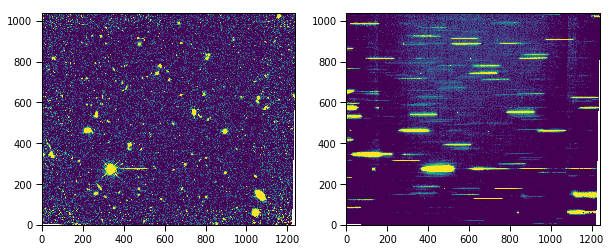

In [12]:
plt.rcParams["figure.figsize"] = (10,7)
plt.subplot(1,2,1)
d = fits.open("F140W_drz.fits")[1].data
im1 = plt.imshow(d,origin="corner")
im1.set_clim(0,.2)

plt.subplot(1,2,2)
d = fits.open("../G141/G141_drz.fits")[1].data
im1 = plt.imshow(d,origin="corner")
im1.set_clim(0,.2)

We create an object catalog using sextractor

This is one step that needs to be done carefully as several things can go wrong.
- Make sure you set the magnitude zeropoint properly for the image you are using
- One can generate a simple catalog using:

    sex -c aXe.sex F140W_drz.fits[1] -DETECT_THRESH 5 -MAG_ZEROPOINT 26.4525
    
    
- See aXe.param for the required parameters that aXe will be looking for
- Check the resulting catalog to make sure that all objects have good magnitudes (i.e. no mag of 99.)
- Edit cookbook.cat and rename column MAG_ISO with MAG_F1392, or you will get an "aXeError: Catalogue: test.cat does not contain any magnitude column!" error when running iolprep

This catalog, when doing a simple extraction, will be used to compute the SED of each sources. These SEDs will be used to compute our contamination models. In this example, we used a single band, F140W, but we could have added information in other bands such as F125W for example. This requires running Sextractor in matched photometry mode, and the creation of a catalog where magnitudes in multiple bands are properly listed

For simplicity, here, we copy an already generated catalog:

In [14]:
os.system("cp ../cookbook_data/cookbook.cat .")
!cat cookbook.cat

#   1 X_IMAGE                Object position along x                                    [pixel]
#   2 Y_IMAGE                Object position along y                                    [pixel]
#   3 NUMBER                 Running object number                                     
#   4 X_WORLD                Barycenter position along world x axis                     [deg]
#   5 Y_WORLD                Barycenter position along world y axis                     [deg]
#   6 A_IMAGE                Profile RMS along major axis                               [pixel]
#   7 B_IMAGE                Profile RMS along minor axis                               [pixel]
#   8 THETA_IMAGE            Position angle (CCW/x)                                     [deg]
#   9 A_WORLD                Profile RMS along major axis (world units)                 [deg]
#  10 B_WORLD                Profile RMS along minor axis (world units)                 [deg]
#  11 THETA_WORLD            Position angle (CCW/world-x) 

We can now run aXe

We start by setting up some necessary environment variables that point to the various aXe directories.
Make sure that you keep the path length to be less than 80 characters when the code points to individual data files, or about 60 characters without the file names to be safe

Create a directory called CONF and copy the WFC3 G141 IR Calibration files in there.

In [16]:
os.chdir(cwd)

if os.path.isdir("CONF"):
    shutil.rmtree("CONF")
os.mkdir("CONF")

os.system("cp cookbook_data/CONF/* CONF/")

0

Set up some work directories and environment variables required by aXe:

In [17]:
import os
from pyraf import iraf


os.chdir(cwd)

iraf.stsdas()
iraf.analysis()
iraf.slitless()
iraf.axe()

if os.path.isdir("DATA"):
    shutil.rmtree("DATA")
os.mkdir("DATA")
os.environ['AXE_IMAGE_PATH'] = './DATA/' 
print '--> variable AXE_IMAGE_PATH   set to "./DATA/"'

os.environ['AXE_CONFIG_PATH'] = './CONF/'
print '--> variable AXE_CONFIG_PATH  set to "./CONF/"'

if os.path.isdir("OUTPUT"):
    shutil.rmtree("OUTPUT")
os.mkdir("OUTPUT")
os.environ['AXE_OUTPUT_PATH'] = './OUTPUT/'
print '--> variable AXE_OUTPUT_PATH  set to "./OUTPUT/"'

print "Length of AXE_IMAGE_PATH is",len(os.environ['AXE_IMAGE_PATH']),"characters"


--> variable AXE_IMAGE_PATH   set to "./DATA/"
--> variable AXE_CONFIG_PATH  set to "./CONF/"
--> variable AXE_OUTPUT_PATH  set to "./OUTPUT/"
Length of AXE_IMAGE_PATH is 7 characters


We define the FOV boundaries for the WFC3 IR observations

In [18]:
dimension_info = "183,85,50,50"

We copy the G141 FLT files and the F140W FLT files in the DATA directory

You can either use the original data or optionally the FLT files used to create the G141 mosaic earlier, which will have some extra bad pixels flagging

In [19]:
os.system("cp G141/*flt.fits DATA/")
os.system("cp F140W/*flt.fits DATA/")

0

We use the iolprep aXe task to generate individual F140W catalogs

This task will create the individual F140W extraction catalogs, one for each of the files listed in the F140W.lis file. 
We pass the F140W mosaic to it, as it contains all the information about all the individual F140W FLT file.

In [20]:
os.chdir(cwd)
os.chdir("F140W")
iraf.iolprep.mdrizzle_image = "F140W_drz.fits"
iraf.iolprep.input_cat = "cookbook.cat"
iraf.iolprep.dimension_info = dimension_info


iraf.iolprep.run(mode="h")


IOLPREP: 4 Input Object Lists will be created!


 >>>> Working on Input Object List:  ib6o23rtq_flt_1.cat >>>>


 >>>> Catalog:  ib6o23rtq_flt_1.cat written with  365 entries.>>>>


 >>>> Working on Input Object List:  ib6o23rwq_flt_1.cat >>>>


 >>>> Catalog:  ib6o23rwq_flt_1.cat written with  333 entries.>>>>


 >>>> Working on Input Object List:  ib6o23rzq_flt_1.cat >>>>


 >>>> Catalog:  ib6o23rzq_flt_1.cat written with  352 entries.>>>>


 >>>> Working on Input Object List:  ib6o23s2q_flt_1.cat >>>>


 >>>> Catalog:  ib6o23s2q_flt_1.cat written with  392 entries.>>>>



We copy the newly create catalog files into the DATA directory

In [21]:
os.system("cp ib6o23*_1.cat ../DATA/")

0

We are almost ready to extract the spectra.
We need to create an file aXe.lis containing the G141 images, expected catalog names and associated F140W direct images

The G141 mosaic we created earlier is not used directly during the aXe extraction process. However, the F140W mosaic was used to create an object master catalog. This catalog will be processed to generate individual object catalogs for the files used to create the F140W mosaic. The aXe.lis file lists which F140W images are logically associated with a particular G141 image. Ideally, these are images taken in the same HST visit so that we can be sure that the WCS of both files are consistent.

The aXe.lis file is a simple text file, with a slightly different format than the one above. In this file, each line contains 3 items:
- The name of a G141 FLT file (e.g. [grism_rootname]_flt.fits
- A catalog name with a name of [direct_rootname]_flt_1.cat
- The name of the direct imaging file [direct_rootname]_flt.fits associated with the G141 data and the catalog. 
    
At this stage, we only have items 1 and 2.

In [24]:
os.chdir(cwd)
os.system("cp cookbook_data/aXe.lis .")
!cat aXe.lis

ib6o23rsq_flt.fits ib6o23rtq_flt_1.cat ib6o23rtq_flt.fits
ib6o23ruq_flt.fits ib6o23rwq_flt_1.cat ib6o23rwq_flt.fits
ib6o23ryq_flt.fits ib6o23rzq_flt_1.cat ib6o23rzq_flt.fits
ib6o23s0q_flt.fits ib6o23s2q_flt_1.cat ib6o23s2q_flt.fits



We run aXeprep. This task will amongst other things take care of background subtracting the G141 data using a single master sky.

In [25]:
os.chdir(cwd)

iraf.axeprep.inlist = "aXe.lis"
iraf.axeprep.configs = "G141.F140W.V4.31.conf"
iraf.axeprep.backgr = "yes"
iraf.axeprep.backims = "WFC3.IR.G141.sky.V1.0.fits"
iraf.axeprep.norm = "no"
iraf.axeprep.mfwhm = 3.0
iraf.axeprep.run(mode='h')



Dispensable Keywords: 
GFILTER G141 ; GRISM name (not checked by aXe)
 DFILTER F140W ; FILTER used for Direct Imaging (not checked by aXe)
 XRANGE -183. 1099. ; Left and Right coordinates of FOV (not used by aXe)
 YRANGE -1. 1015. ; Lower and Upper coordinates of FOV (not used by aXe)
 DPDL_A_0 -198.97909709239238  0.00022085642768667504  0.015657459895358234  -4.20679688923729e-6  1.2280573229146504e-6  -5.155391423878844e-6
 DPDL_A_1 0.022228565039576174  -2.2310680636779698e-7  -1.7250484537749406e-6  4.1766971161196834e-10  -1.0112004248938472e-10  4.956649137022331e-10
 DPDL_B_0 -198.54772435079127  0.0018167722687743144  0.012732046102747235  -3.1545156431674204e-6  -7.78838498521172e-8  -1.5746821630565375e-6
 DPDL_B_1 0.00033333333333336466  -7.051596740287148e-20  -4.8635321687450096e-20  4.7199609155642836e-23  5.44539123505613e-23  3.3757517911810997e-23
 DPDL_C_0 -195.74285816233404  -0.00877367229464306  0.00968143056562458  6.067600997884182e-6  -2.116469461490746e-6  1.

     Done
['/Users/npirzkal/anaconda3/envs/axe-gemini/iraf_extern/stsdas/bin.macosx/aXe_GOL2AF', 'ib6o23ruq_flt.fits', 'G141.F140W.V4.31.conf', '-mfwhm=3.0', '-dmag=0.0', '-lambda_mark=800.0', '-slitless_geom=1', '-orient=1']
['/Users/npirzkal/anaconda3/envs/axe-gemini/iraf_extern/stsdas/bin.macosx/aXe_BE', 'ib6o23ruq_flt.fits', 'G141.F140W.V4.31.conf', '-np=0', '-interp=-1', '-msk']
['/Users/npirzkal/anaconda3/envs/axe-gemini/iraf_extern/stsdas/bin.macosx/aXe_SCALEBCK', 'ib6o23ruq_flt.fits', 'ib6o23ruq_flt_2.MSK.fits', 'G141.F140W.V4.31.conf', 'WFC3.IR.G141.sky.V1.0.fits']
AXEPREP: Image        ib6o23ruq_flt.fits[SCI,1] sky-subtracted.

Dispensable Keywords: 
GFILTER G141 ; GRISM name (not checked by aXe)
 DFILTER F140W ; FILTER used for Direct Imaging (not checked by aXe)
 XRANGE -183. 1099. ; Left and Right coordinates of FOV (not used by aXe)
 YRANGE -1. 1015. ; Lower and Upper coordinates of FOV (not used by aXe)
 DPDL_A_0 -198.97909709239238  0.00022085642768667504  0.01565745989

     Done
['/Users/npirzkal/anaconda3/envs/axe-gemini/iraf_extern/stsdas/bin.macosx/aXe_GOL2AF', 'ib6o23s0q_flt.fits', 'G141.F140W.V4.31.conf', '-mfwhm=3.0', '-dmag=0.0', '-lambda_mark=800.0', '-slitless_geom=1', '-orient=1']
['/Users/npirzkal/anaconda3/envs/axe-gemini/iraf_extern/stsdas/bin.macosx/aXe_BE', 'ib6o23s0q_flt.fits', 'G141.F140W.V4.31.conf', '-np=0', '-interp=-1', '-msk']
['/Users/npirzkal/anaconda3/envs/axe-gemini/iraf_extern/stsdas/bin.macosx/aXe_SCALEBCK', 'ib6o23s0q_flt.fits', 'ib6o23s0q_flt_2.MSK.fits', 'G141.F140W.V4.31.conf', 'WFC3.IR.G141.sky.V1.0.fits']
AXEPREP: Image        ib6o23s0q_flt.fits[SCI,1] sky-subtracted.


We can now proceed with a simple box extraction of our G141 spectra. This will not combine individual 1D spectra and we create one extracted spectrum per object and get G141 FLT file we are processing. 
The contamination is estimated using the Gaussian model of each object that is included in the  SExtractor object catalog test.cat.

For each of the G141 input FLT file, this will create the following in the OUTPUT/ directory:
- [rootname]_flt_2.cat : Object catalog for the FLT file [rootname]_flt.fits
- [rootname]_flt_2.OAF : Aperture file
- [rootname]_flt_2.PET.fits : The Pixel Extraction Table, containing all the unbinned information about each spectrum
- [rootname]_flt_2.SPC.fits : 1D extracted spectra
- [rootname]_flt_2.CONT.fits : Contamination estimate for eact of the spectra
- [rootname]_flt_2_opt.SPC.fits : Optimally extracted version of the 1D spectra

While running the next notebook cell, please check the main terminal window as the aXe routines will output things in there. It will take a few minutes to run


In [26]:
iraf.axecore.inlist = "aXe.lis" 
iraf.axecore.configs = "G141.F140W.V4.31.conf"
iraf.axecore.extrfwhm = 4.0
iraf.axecore.drzfwhm = 3.0
iraf.axecore.back = 'no'
iraf.axecore.backfwhm = 0.0
iraf.axecore.orient = 'no'
iraf.axecore.weights = 'yes'
iraf.axecore.slitless_geom = 'no'
iraf.axecore.cont_model = 'gauss'
iraf.axecore.sampling = 'drizzle'
iraf.axecore.run(mode='h')



Dispensable Keywords: 
GFILTER G141 ; GRISM name (not checked by aXe)
 DFILTER F140W ; FILTER used for Direct Imaging (not checked by aXe)
 XRANGE -183. 1099. ; Left and Right coordinates of FOV (not used by aXe)
 YRANGE -1. 1015. ; Lower and Upper coordinates of FOV (not used by aXe)
 DPDL_A_0 -198.97909709239238  0.00022085642768667504  0.015657459895358234  -4.20679688923729e-6  1.2280573229146504e-6  -5.155391423878844e-6
 DPDL_A_1 0.022228565039576174  -2.2310680636779698e-7  -1.7250484537749406e-6  4.1766971161196834e-10  -1.0112004248938472e-10  4.956649137022331e-10
 DPDL_B_0 -198.54772435079127  0.0018167722687743144  0.012732046102747235  -3.1545156431674204e-6  -7.78838498521172e-8  -1.5746821630565375e-6
 DPDL_B_1 0.00033333333333336466  -7.051596740287148e-20  -4.8635321687450096e-20  4.7199609155642836e-23  5.44539123505613e-23  3.3757517911810997e-23
 DPDL_C_0 -195.74285816233404  -0.00877367229464306  0.00968143056562458  6.067600997884182e-6  -2.116469461490746e-6  1.

/Users/npirzkal/anaconda3/envs/axe-gemini/lib/python2.7/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


Setting up output name:  ib6o23rsq_drz.fits
Starting PyDrizzle Version  6.4.3  at  11:02:00 (20/04/2018)
- IDCTAB: Distortion model from row 17 for chip 1 : G141 and CLEAR
Drizzle parameters have been calculated. Ready to .run()...
Finished calculating parameters at  11:02:01 (20/04/2018)

Dispensable Keywords: 
GFILTER G141 ; GRISM name (not checked by aXe)
 DFILTER F140W ; FILTER used for Direct Imaging (not checked by aXe)
 XRANGE -183. 1099. ; Left and Right coordinates of FOV (not used by aXe)
 YRANGE -1. 1015. ; Lower and Upper coordinates of FOV (not used by aXe)
 DPDL_A_0 -198.97909709239238  0.00022085642768667504  0.015657459895358234  -4.20679688923729e-6  1.2280573229146504e-6  -5.155391423878844e-6
 DPDL_A_1 0.022228565039576174  -2.2310680636779698e-7  -1.7250484537749406e-6  4.1766971161196834e-10  -1.0112004248938472e-10  4.956649137022331e-10
 DPDL_B_0 -198.54772435079127  0.0018167722687743144  0.012732046102747235  -3.1545156431674204e-6  -7.78838498521172e-8  -1.574

/Users/npirzkal/Dropbox/Python0/pydrizzle/obsgeometry.py:474: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.model.cx == None:
/Users/npirzkal/Dropbox/Python0/pydrizzle/distortion/models.py:203: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.cx == None:
/Users/npirzkal/Dropbox/Python0/pydrizzle/obsgeometry.py:265: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.model.cx == None:


     Done
['/Users/npirzkal/anaconda3/envs/axe-gemini/iraf_extern/stsdas/bin.macosx/aXe_GOL2AF', 'ib6o23rsq_flt.fits', 'G141.F140W.V4.31.conf', '-mfwhm=4.0', '-dmag=0.0', '-lambda_mark=800.0', '-slitless_geom=0', '-orient=0']
['/Users/npirzkal/anaconda3/envs/axe-gemini/iraf_extern/stsdas/bin.macosx/aXe_AF2PET', 'ib6o23rsq_flt.fits', 'G141.F140W.V4.31.conf']
['/Users/npirzkal/anaconda3/envs/axe-gemini/iraf_extern/stsdas/bin.macosx/aXe_PETCONT', 'ib6o23rsq_flt.fits', 'G141.F140W.V4.31.conf', '-cont_model=1', '-inter_type=1', '-model_scale=3.0', '-lambda_psf=800.0', '-cont_map']
['/Users/npirzkal/anaconda3/envs/axe-gemini/iraf_extern/stsdas/bin.macosx/aXe_PETFF', 'ib6o23rsq_flt.fits', 'G141.F140W.V4.31.conf']
['/Users/npirzkal/anaconda3/envs/axe-gemini/iraf_extern/stsdas/bin.macosx/aXe_PET2SPC', 'ib6o23rsq_flt.fits', 'G141.F140W.V4.31.conf', '-noBPET', '-opt_weights']
['/Users/npirzkal/anaconda3/envs/axe-gemini/iraf_extern/stsdas/bin.macosx/aXe_STAMPS', 'ib6o23rsq_flt.fits', 'G141.F140W.V

 Setting up output name:  ib6o23ryq_drz.fits
Starting PyDrizzle Version  6.4.3  at  11:03:08 (20/04/2018)
- IDCTAB: Distortion model from row 17 for chip 1 : G141 and CLEAR
Drizzle parameters have been calculated. Ready to .run()...
Finished calculating parameters at  11:03:08 (20/04/2018)

Dispensable Keywords: 
GFILTER G141 ; GRISM name (not checked by aXe)
 DFILTER F140W ; FILTER used for Direct Imaging (not checked by aXe)
 XRANGE -183. 1099. ; Left and Right coordinates of FOV (not used by aXe)
 YRANGE -1. 1015. ; Lower and Upper coordinates of FOV (not used by aXe)
 DPDL_A_0 -198.97909709239238  0.00022085642768667504  0.015657459895358234  -4.20679688923729e-6  1.2280573229146504e-6  -5.155391423878844e-6
 DPDL_A_1 0.022228565039576174  -2.2310680636779698e-7  -1.7250484537749406e-6  4.1766971161196834e-10  -1.0112004248938472e-10  4.956649137022331e-10
 DPDL_B_0 -198.54772435079127  0.0018167722687743144  0.012732046102747235  -3.1545156431674204e-6  -7.78838498521172e-8  -1.57

     Done
['/Users/npirzkal/anaconda3/envs/axe-gemini/iraf_extern/stsdas/bin.macosx/aXe_GOL2AF', 'ib6o23s0q_flt.fits', 'G141.F140W.V4.31.conf', '-mfwhm=4.0', '-dmag=0.0', '-lambda_mark=800.0', '-slitless_geom=0', '-orient=0']
['/Users/npirzkal/anaconda3/envs/axe-gemini/iraf_extern/stsdas/bin.macosx/aXe_AF2PET', 'ib6o23s0q_flt.fits', 'G141.F140W.V4.31.conf']
['/Users/npirzkal/anaconda3/envs/axe-gemini/iraf_extern/stsdas/bin.macosx/aXe_PETCONT', 'ib6o23s0q_flt.fits', 'G141.F140W.V4.31.conf', '-cont_model=1', '-inter_type=1', '-model_scale=3.0', '-lambda_psf=800.0', '-cont_map']
['/Users/npirzkal/anaconda3/envs/axe-gemini/iraf_extern/stsdas/bin.macosx/aXe_PETFF', 'ib6o23s0q_flt.fits', 'G141.F140W.V4.31.conf']
['/Users/npirzkal/anaconda3/envs/axe-gemini/iraf_extern/stsdas/bin.macosx/aXe_PET2SPC', 'ib6o23s0q_flt.fits', 'G141.F140W.V4.31.conf', '-noBPET', '-opt_weights']
['/Users/npirzkal/anaconda3/envs/axe-gemini/iraf_extern/stsdas/bin.macosx/aXe_STAMPS', 'ib6o23s0q_flt.fits', 'G141.F140W.V

Results are in the directory pointed to by os.environ['AXE_OUTPUT_PATH'], i.e. ./OUTPUT 
1D and 2D spectra extracted from individual FLT files are available. These are not combined.
SPC files contained 1D spectra, opt.SPC files contained optimally extracted spectra (using gaussian profiles), STP files contain 2D stamps. CONT files contain the contamination estimate (gaussian based)

In [27]:
!ls OUTPUT/*SPC.fits
!ls OUTPUT/*STP.fits

OUTPUT/ib6o23rsq_flt_2.SPC.fits     OUTPUT/ib6o23ryq_flt_2.SPC.fits
OUTPUT/ib6o23rsq_flt_2_opt.SPC.fits OUTPUT/ib6o23ryq_flt_2_opt.SPC.fits
OUTPUT/ib6o23ruq_flt_2.SPC.fits     OUTPUT/ib6o23s0q_flt_2.SPC.fits
OUTPUT/ib6o23ruq_flt_2_opt.SPC.fits OUTPUT/ib6o23s0q_flt_2_opt.SPC.fits
OUTPUT/ib6o23rsq_flt_2.STP.fits OUTPUT/ib6o23ryq_flt_2.STP.fits
OUTPUT/ib6o23ruq_flt_2.STP.fits OUTPUT/ib6o23s0q_flt_2.STP.fits


We can examine individual 2D spectra from the STP files. Note that the STP files are meant for quality control and are not calibrated versions of the 2D spectra. 

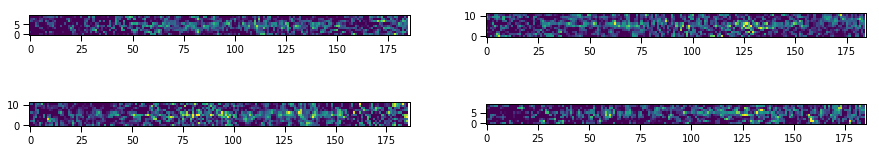

In [28]:
ID = 160

plt.rcParams["figure.figsize"] = (15,3)
plt.subplot(2,2,1)
try:
    d1 = fits.open("OUTPUT/ib6o23rsq_flt_2.STP.fits")["BEAM_%dA" % (ID)].data
    im1 = plt.imshow(d1,origin="corner")
    im1.set_clim(0,.1)
except:
    pass

plt.subplot(2,2,2)
try:
    d1 = fits.open("OUTPUT/ib6o23ryq_flt_2.STP.fits")["BEAM_%dA" % (ID)].data
    im1 = plt.imshow(d1,origin="corner")
    im1.set_clim(0,.1)
except:
    pass

plt.subplot(2,2,3)
try:
    d1 = fits.open("OUTPUT/ib6o23ruq_flt_2.STP.fits")["BEAM_%dA" % (ID)].data
    im1 = plt.imshow(d1,origin="corner")
    im1.set_clim(0,.1)
except:
    pass

plt.subplot(2,2,4)
try:
    d1 = fits.open("OUTPUT/ib6o23s0q_flt_2.STP.fits")["BEAM_%dA" % (ID)].data
    im1 = plt.imshow(d1,origin="corner")
    im1.set_clim(0,.1)
except:
    pass



We now examine the calibrated 1D spectra of one of the sources:

OUTPUT/ib6o23rsq_flt_2.SPC.fits
OUTPUT/ib6o23ruq_flt_2.SPC.fits
OUTPUT/ib6o23ryq_flt_2.SPC.fits
OUTPUT/ib6o23s0q_flt_2.SPC.fits


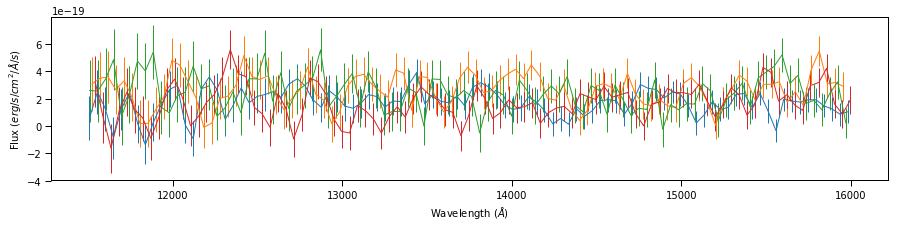

In [29]:
import glob
for s in glob.glob("OUTPUT/ib6o2*2.SPC.fits"):
    print s
    d1 = fits.open(s)["BEAM_%dA" % (ID)].data
    w = d1["LAMBDA"]
    f = d1["FLUX"]
    e = d1["FERROR"]
    vg = (w>11500) & (w<16000)
    plt.errorbar(w[vg],f[vg],e[vg])
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel(r'Flux ($erg/s/cm^2/\AA/s$)');

Contamination is not automatically removed but has been estimated and we can plot it

OUTPUT/ib6o23rsq_flt_2.SPC.fits
OUTPUT/ib6o23ruq_flt_2.SPC.fits
OUTPUT/ib6o23ryq_flt_2.SPC.fits
OUTPUT/ib6o23s0q_flt_2.SPC.fits


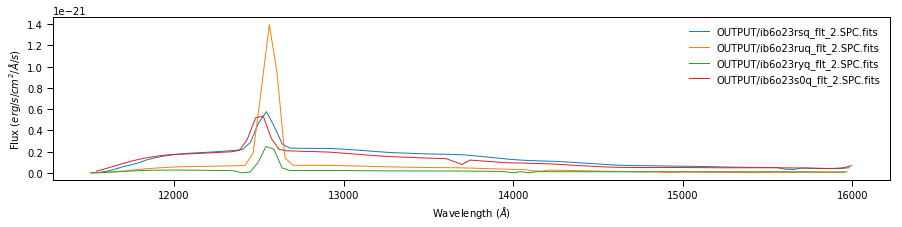

In [30]:
import glob
for s in glob.glob("OUTPUT/ib6o2*2.SPC.fits"):
    print s
    d1 = fits.open(s)["BEAM_%dA" % (ID)].data
    w = d1["LAMBDA"]
    c = d1["CONTAM"]
    vg = (w>11500) & (w<16000)
    plt.plot(w[vg],c[vg],label=s)
plt.legend()
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel(r'Flux ($erg/s/cm^2/\AA/s$)');

<h1>More advanced extraction

We now use the aXe Fluxcube extraction

- This method uses multiple mosaics, generated with the same WCS as the G141 mosaic and the SeXtractor segmentation file seg.fits which was generated above when we created the catalog, to generate more accurate contamination estimates and weighted extraction.
- The use of aXedrizzle allows us to combine 2D and 1D spectra taken at the same orientation, which is the case of the data in this example.
- In this example, we use the actual segmenation map to determine the shape of objects. This is done via a set of Fluxcube files was we need to first generate

We create a new directory called DRIZZLE that we will need:

In [31]:

if os.path.isdir("DRIZZLE"):
    shutil.rmtree("DRIZZLE")
os.mkdir("DRIZZLE")
os.environ['AXE_DRIZZLE_PATH'] = './DRIZZLE/' 
print '--> variable AXE_DRIZZLE_PATH  set to "./DRIZZLE/"'

--> variable AXE_DRIZZLE_PATH  set to "./DRIZZLE/"


We already have an F140W mosaic and we now create an F125W mosaic with the same final WCS as the G141 mosaic

In [32]:
os.chdir(cwd)

if os.path.isdir("F125W"):
    shutil.rmtree("F125W")

os.mkdir("F125W")


In [33]:
os.system("cp cookbook_data/F125W/*flt.fits F125W/")
os.system("cp cookbook_data/F125W/F125W.lis F125W/")
os.chdir("F125W")
!cat F125W.lis

ib6o03n9q_flt.fits
ib6o03nbq_flt.fits
ib6o03nfq_flt.fits
ib6o03niq_flt.fits
ib6o03nmq_flt.fits
ib6o03npq_flt.fits
ib6o04tuq_flt.fits
ib6o04twq_flt.fits
ib6o04u7q_flt.fits
ib6o04uaq_flt.fits
ib6o04ueq_flt.fits
ib6o04uwq_flt.fits
ib6o09h7q_flt.fits
ib6o09h9q_flt.fits
ib6o09hdq_flt.fits
ib6o09hwq_flt.fits
ib6o09i0q_flt.fits
ib6o09i3q_flt.fits
ib6oa8viq_flt.fits
ib6oa8vlq_flt.fits
ib6oa8vpq_flt.fits
ib6ob8vtq_flt.fits


In [34]:
ref = "../G141/G141_drz.fits[1]"
astrodrizzle.AstroDrizzle("@F125W.lis",output="F125W",in_memory=False,skysub="yes",build=True,driz_cr_corr=True,driz_cr=True,final_wcs=True,driz_separate=True,driz_sep_wcs=True,driz_sep_refimage=ref,final_refimage=ref)

INPUT_DICT: {'driz_separate': True, 'final_refimage': '../G141/G141_drz.fits[1]', 'final_wcs': True, 'skysub': 'yes', 'driz_cr_corr': True, 'driz_sep_refimage': '../G141/G141_drz.fits[1]', 'build': True, 'driz_cr': True, 'input': '@F125W.lis', 'in_memory': False, 'output': 'F125W', 'driz_sep_wcs': True}
Setting up logfile :  astrodrizzle.log

AstroDrizzle Version 2.1.21(12-January-2018) started at: 11:05:01.336 (20/04/2018)

==== Processing Step  Initialization  started at  11:05:01.34 (20/04/2018)

Preserving original of:  ib6o03n9q_flt.fits as  OrIg_files/ib6o03n9q_flt.fits

Preserving original of:  ib6o03nbq_flt.fits as  OrIg_files/ib6o03nbq_flt.fits

Preserving original of:  ib6o03nfq_flt.fits as  OrIg_files/ib6o03nfq_flt.fits

Preserving original of:  ib6o03niq_flt.fits as  OrIg_files/ib6o03niq_flt.fits

Preserving original of:  ib6o03nmq_flt.fits as  OrIg_files/ib6o03nmq_flt.fits

Preserving original of:  ib6o03npq_flt.fits as  OrIg_files/ib6o03npq_flt.fits

Preserving original o


reference sky value for image  ib6oa8vlq_flt.fits  is  409.554338176

reference sky value for image  ib6oa8vpq_flt.fits  is  454.478009808

reference sky value for image  ib6ob8vtq_flt.fits  is  411.137837022



Saving output median image to:  F125W_med.fits

==== Processing Step  Create Median  finished at  11:05:35.006 (20/04/2018)

==== Processing Step  Blot  started at  11:05:35.010 (20/04/2018)

    Blot: creating blotted image:  ib6o03n9q_flt.fits[sci,1]

Using default C-based coordinate transformation...

-Generating simple FITS output: ib6o03n9q_sci1_blt.fits

Writing out image to disk: ib6o03n9q_sci1_blt.fits

    Blot: creating blotted image:  ib6o03nbq_flt.fits[sci,1]

Using default C-based coordinate transformation...

-Generating simple FITS output: ib6o03nbq_sci1_blt.fits

Writing out image to disk: ib6o03nbq_sci1_blt.fits

    Blot: creating blotted image:  ib6o03nfq_flt.fits[sci,1]

Using default C-based coordinate transformation...

-Generating simple FITS output: ib6


            Static Mask          0.6932 sec.

           Subtract Sky          3.7383 sec.

       Separate Drizzle          11.2257 sec.

          Create Median          5.9478 sec.

                   Blot          10.8759 sec.

                Driz_CR          6.9924 sec.

          Final Drizzle          11.2420 sec.

   ====================          ====================

                  Total          62.7524 sec.

Trailer file written to:  astrodrizzle.log



We create a directory to prepare our Fluxcubes:

In [35]:
os.chdir(cwd)

if os.path.isdir("FLX"):
    shutil.rmtree("FLX")

os.mkdir("FLX")

Copy the direct imaging and G141 mosaic in the Fluxcube directory:

In [36]:
os.chdir("FLX")

os.system("cp ../F125W/F125W_drz.fits ./")
os.system("cp ../F140W/F140W_drz.fits ./")
os.system("cp ../G141/G141_drz.fits ./")

0

We will need access to the G141 FLT files, and copy them here instead of working in the ./DATA directory

In [37]:
os.system("cp ../DATA/*flt.fits .")

0

We also need the segmenation file we created earlier. Here we copy one we already prepared.

In [39]:
os.system("cp ../cookbook_data/catalog/seg.fits .")

0

Create a cubelist.lis file that contains a description of the mosaics we are using and populates the PHOTPLAM and AB magnitude zeropoints

In [40]:
import glob

dir_images = []
for dir_image in glob.glob("F*drz.fits"):
    print dir_image
    fname = dir_image.split("_")[0]
    dir_images.append(dir_image)
        
s = []
for dir_image in dir_images:
    print dir_image  
    PHOTPLAM = fits.open(dir_image)[0].header["PHOTPLAM"] # Wavelength of filter in A
    PHOTFLAM = fits.open(dir_image)[0].header["PHOTFLAM"] # Wavelength of filter in A
    ABZP = -48.60 - 2.5*np.log10(PHOTFLAM * PHOTPLAM**2/3e8/1e10 )
    ss = "%s, %f, %f\n" % (dir_image, PHOTPLAM/10., ABZP)
    s.append(ss)
open("cubelist.lis","w").writelines(s)
    

F125W_drz.fits
F140W_drz.fits
F125W_drz.fits
F140W_drz.fits


In [41]:
!cat cubelist.lis

F125W_drz.fits, 1248.606000, 26.231020
F140W_drz.fits, 1392.290700, 26.453120


We now can create the Flexcube

This will combined the mosaics and segmentation file into a flexcube that can be used to compute the contamination and perform the extraction. A different one is generated for each G141 FLT file

In [42]:
iraf.fcubeprep.grism_image = os.path.join("G141_drz.fits")
iraf.fcubeprep.segm_image = os.path.join("seg.fits")
iraf.fcubeprep.filter_info = "cubelist.lis"
iraf.fcubeprep.AB_zero = "yes"
iraf.fcubeprep.useMdriz = "no"
iraf.fcubeprep.dimension_info = dimension_info
iraf.fcubeprep.run(mode="h")

 image_name: F125W_drz.fits
 segm_image: seg.fits
 flux_name: F125W_drz.FLX.fits

F125W_drz.fits[SCI]  -->  F125W_drz.FLX.fits

 image_name: F140W_drz.fits
 segm_image: seg.fits
 flux_name: F140W_drz.FLX.fits

F140W_drz.fits[SCI]  -->  F140W_drz.FLX.fits

Creating  ib6o23rsq_flt_2.FLX.fits  ... 

/Users/npirzkal/anaconda3/envs/axe-gemini/lib/python2.7/site-packages/drizzlepac/ablot.py:369: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  _outsci = np.zeros((blot_wcs._naxis2,blot_wcs._naxis1),dtype=np.float32)


Using default C-based coordinate transformation...
Using excess pixels of x,y  183 50
Using default C-based coordinate transformation...
Using excess pixels of x,y  183 50
Using default C-based coordinate transformation...
 Done
Creating  ib6o23ruq_flt_2.FLX.fits  ... Using default C-based coordinate transformation...
Using excess pixels of x,y  183 50
Using default C-based coordinate transformation...
Using excess pixels of x,y  183 50
Using default C-based coordinate transformation...
 Done
Creating  ib6o23ryq_flt_2.FLX.fits  ... Using default C-based coordinate transformation...
Using excess pixels of x,y  183 50
Using default C-based coordinate transformation...
Using excess pixels of x,y  183 50
Using default C-based coordinate transformation...
 Done
Creating  ib6o23s0q_flt_2.FLX.fits  ... Using default C-based coordinate transformation...
Using excess pixels of x,y  183 50
Using default C-based coordinate transformation...
Using excess pixels of x,y  183 50
Using default C-based

At this point, we should have generated 2 master FLX file, one for each input imaging mosaic, and four FLX files, one for each of our G141 FLT file.


In [43]:
!ls *FLX.fits

F125W_drz.FLX.fits       ib6o23rsq_flt_2.FLX.fits ib6o23ryq_flt_2.FLX.fits
F140W_drz.FLX.fits       ib6o23ruq_flt_2.FLX.fits ib6o23s0q_flt_2.FLX.fits


The FLX files are created in the current directory but we need them to be in the DATA directoty so we copy them there



In [44]:
os.system("cp ib6o23*FLX.fits ../DATA/")

0

413.0


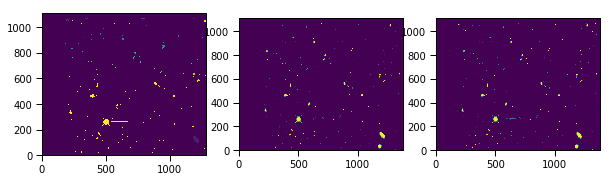

In [45]:
plt.rcParams["figure.figsize"] = (10,7)

plt.subplot(1,3,1)
print np.max(fits.open("ib6o23ryq_flt_2.FLX.fits")[1].data)

im = plt.imshow(fits.open("ib6o23ryq_flt_2.FLX.fits")["SEGM"].data*1.,origin="corner")
im.set_clim(0,199)

plt.subplot(1,3,2)
im = plt.imshow(fits.open("ib6o23ryq_flt_2.FLX.fits")["LAMBDA1248"].data,origin="corner")
im.set_clim(0,1e-20)

plt.subplot(1,3,3)
im = plt.imshow(fits.open("ib6o23ryq_flt_2.FLX.fits")["LAMBDA1392"].data,origin="corner")
im.set_clim(0,1e-20)

#reload(nf)
#nf.disp("ib6o23ryq_flt_2.FLX.fits[SEGM]",1,z1=0,z2=1)
# nf.disp("ib6o23ryq_flt_2.FLX.fits[2]",2,z1=0,z2=3e-18)
# nf.disp("ib6o23ryq_flt_2.FLX.fits[3]",3,z1=0,z2=1e-18)

We want to work on the non background subtracted G141 data. The ones in the DATA directory have already been subtracted during our basic extraction, so we copy the original G141 data back into the DATA directory.

In [46]:
os.chdir(cwd)

os.system("cp G141/*flt.fits DATA/")

0

We run aXeprep on the data. This step also substracts the background.

In [47]:
iraf.axeprep.inlist = "aXe.lis"
iraf.axeprep.configs = "G141.F140W.V4.31.conf"
iraf.axeprep.backgr = "yes"
iraf.axeprep.backims = "WFC3.IR.G141.sky.V1.0.fits"
iraf.axeprep.norm = "no"
iraf.axeprep.mfwhm = 3.0
iraf.axeprep.run(mode='h')


Dispensable Keywords: 
GFILTER G141 ; GRISM name (not checked by aXe)
 DFILTER F140W ; FILTER used for Direct Imaging (not checked by aXe)
 XRANGE -183. 1099. ; Left and Right coordinates of FOV (not used by aXe)
 YRANGE -1. 1015. ; Lower and Upper coordinates of FOV (not used by aXe)
 DPDL_A_0 -198.97909709239238  0.00022085642768667504  0.015657459895358234  -4.20679688923729e-6  1.2280573229146504e-6  -5.155391423878844e-6
 DPDL_A_1 0.022228565039576174  -2.2310680636779698e-7  -1.7250484537749406e-6  4.1766971161196834e-10  -1.0112004248938472e-10  4.956649137022331e-10
 DPDL_B_0 -198.54772435079127  0.0018167722687743144  0.012732046102747235  -3.1545156431674204e-6  -7.78838498521172e-8  -1.5746821630565375e-6
 DPDL_B_1 0.00033333333333336466  -7.051596740287148e-20  -4.8635321687450096e-20  4.7199609155642836e-23  5.44539123505613e-23  3.3757517911810997e-23
 DPDL_C_0 -195.74285816233404  -0.00877367229464306  0.00968143056562458  6.067600997884182e-6  -2.116469461490746e-6  1.

     Done
['/Users/npirzkal/anaconda3/envs/axe-gemini/iraf_extern/stsdas/bin.macosx/aXe_GOL2AF', 'ib6o23ruq_flt.fits', 'G141.F140W.V4.31.conf', '-mfwhm=3.0', '-dmag=0.0', '-lambda_mark=800.0', '-slitless_geom=1', '-orient=1']
['/Users/npirzkal/anaconda3/envs/axe-gemini/iraf_extern/stsdas/bin.macosx/aXe_BE', 'ib6o23ruq_flt.fits', 'G141.F140W.V4.31.conf', '-np=0', '-interp=-1', '-msk']
['/Users/npirzkal/anaconda3/envs/axe-gemini/iraf_extern/stsdas/bin.macosx/aXe_SCALEBCK', 'ib6o23ruq_flt.fits', 'ib6o23ruq_flt_2.MSK.fits', 'G141.F140W.V4.31.conf', 'WFC3.IR.G141.sky.V1.0.fits']
AXEPREP: Image        ib6o23ruq_flt.fits[SCI,1] sky-subtracted.

Dispensable Keywords: 
GFILTER G141 ; GRISM name (not checked by aXe)
 DFILTER F140W ; FILTER used for Direct Imaging (not checked by aXe)
 XRANGE -183. 1099. ; Left and Right coordinates of FOV (not used by aXe)
 YRANGE -1. 1015. ; Lower and Upper coordinates of FOV (not used by aXe)
 DPDL_A_0 -198.97909709239238  0.00022085642768667504  0.01565745989

     Done
['/Users/npirzkal/anaconda3/envs/axe-gemini/iraf_extern/stsdas/bin.macosx/aXe_GOL2AF', 'ib6o23s0q_flt.fits', 'G141.F140W.V4.31.conf', '-mfwhm=3.0', '-dmag=0.0', '-lambda_mark=800.0', '-slitless_geom=1', '-orient=1']
['/Users/npirzkal/anaconda3/envs/axe-gemini/iraf_extern/stsdas/bin.macosx/aXe_BE', 'ib6o23s0q_flt.fits', 'G141.F140W.V4.31.conf', '-np=0', '-interp=-1', '-msk']
['/Users/npirzkal/anaconda3/envs/axe-gemini/iraf_extern/stsdas/bin.macosx/aXe_SCALEBCK', 'ib6o23s0q_flt.fits', 'ib6o23s0q_flt_2.MSK.fits', 'G141.F140W.V4.31.conf', 'WFC3.IR.G141.sky.V1.0.fits']
AXEPREP: Image        ib6o23s0q_flt.fits[SCI,1] sky-subtracted.


Checking the background levels that were subtracted from each fo the G141 FLT files

In [48]:
!cat aXe.lis
print fits.open("DATA/ib6o23rsq_flt.fits")[1].header["SKY_CPS"],"e/s"
print fits.open("DATA/ib6o23ruq_flt.fits")[1].header["SKY_CPS"],"e/s"
print fits.open("DATA/ib6o23ryq_flt.fits")[1].header["SKY_CPS"],"e/s"
print fits.open("DATA/ib6o23s0q_flt.fits")[1].header["SKY_CPS"],"e/s"

ib6o23rsq_flt.fits ib6o23rtq_flt_1.cat ib6o23rtq_flt.fits
ib6o23ruq_flt.fits ib6o23rwq_flt_1.cat ib6o23rwq_flt.fits
ib6o23ryq_flt.fits ib6o23rzq_flt_1.cat ib6o23rzq_flt.fits
ib6o23s0q_flt.fits ib6o23s2q_flt_1.cat ib6o23s2q_flt.fits

0.8667519 e/s
0.9321785 e/s
0.8834052 e/s
0.8736298 e/s


We run axecore using the flexcube models

In [49]:
iraf.axecore.inlist = "aXe.lis"
iraf.axecore.configs = "G141.F140W.V4.31.conf"
iraf.axecore.extrfwhm = 4.0
iraf.axecore.drzfwhm = 3.0
iraf.axecore.back = 'no'
iraf.axecore.backfwhm = 4.0
iraf.axecore.orient = 'no'
iraf.axecore.weights = 'yes'
iraf.axecore.slitless_geom = 'no'
iraf.axecore.cont_model = 'fluxcube'
iraf.axecore.sampling = 'drizzle'
iraf.axecore.run(mode='h')


Dispensable Keywords: 
GFILTER G141 ; GRISM name (not checked by aXe)
 DFILTER F140W ; FILTER used for Direct Imaging (not checked by aXe)
 XRANGE -183. 1099. ; Left and Right coordinates of FOV (not used by aXe)
 YRANGE -1. 1015. ; Lower and Upper coordinates of FOV (not used by aXe)
 DPDL_A_0 -198.97909709239238  0.00022085642768667504  0.015657459895358234  -4.20679688923729e-6  1.2280573229146504e-6  -5.155391423878844e-6
 DPDL_A_1 0.022228565039576174  -2.2310680636779698e-7  -1.7250484537749406e-6  4.1766971161196834e-10  -1.0112004248938472e-10  4.956649137022331e-10
 DPDL_B_0 -198.54772435079127  0.0018167722687743144  0.012732046102747235  -3.1545156431674204e-6  -7.78838498521172e-8  -1.5746821630565375e-6
 DPDL_B_1 0.00033333333333336466  -7.051596740287148e-20  -4.8635321687450096e-20  4.7199609155642836e-23  5.44539123505613e-23  3.3757517911810997e-23
 DPDL_C_0 -195.74285816233404  -0.00877367229464306  0.00968143056562458  6.067600997884182e-6  -2.116469461490746e-6  1.

 Setting up output name:  ib6o23rsq_drz.fits
Starting PyDrizzle Version  6.4.3  at  11:08:04 (20/04/2018)
- IDCTAB: Distortion model from row 17 for chip 1 : G141 and CLEAR
Drizzle parameters have been calculated. Ready to .run()...
Finished calculating parameters at  11:08:05 (20/04/2018)

Dispensable Keywords: 
GFILTER G141 ; GRISM name (not checked by aXe)
 DFILTER F140W ; FILTER used for Direct Imaging (not checked by aXe)
 XRANGE -183. 1099. ; Left and Right coordinates of FOV (not used by aXe)
 YRANGE -1. 1015. ; Lower and Upper coordinates of FOV (not used by aXe)
 DPDL_A_0 -198.97909709239238  0.00022085642768667504  0.015657459895358234  -4.20679688923729e-6  1.2280573229146504e-6  -5.155391423878844e-6
 DPDL_A_1 0.022228565039576174  -2.2310680636779698e-7  -1.7250484537749406e-6  4.1766971161196834e-10  -1.0112004248938472e-10  4.956649137022331e-10
 DPDL_B_0 -198.54772435079127  0.0018167722687743144  0.012732046102747235  -3.1545156431674204e-6  -7.78838498521172e-8  -1.57

 
Dispensable Keywords: 
GFILTER G141 ; GRISM name (not checked by aXe)
 DFILTER F140W ; FILTER used for Direct Imaging (not checked by aXe)
 XRANGE -183. 1099. ; Left and Right coordinates of FOV (not used by aXe)
 YRANGE -1. 1015. ; Lower and Upper coordinates of FOV (not used by aXe)
 DPDL_A_0 -198.97909709239238  0.00022085642768667504  0.015657459895358234  -4.20679688923729e-6  1.2280573229146504e-6  -5.155391423878844e-6
 DPDL_A_1 0.022228565039576174  -2.2310680636779698e-7  -1.7250484537749406e-6  4.1766971161196834e-10  -1.0112004248938472e-10  4.956649137022331e-10
 DPDL_B_0 -198.54772435079127  0.0018167722687743144  0.012732046102747235  -3.1545156431674204e-6  -7.78838498521172e-8  -1.5746821630565375e-6
 DPDL_B_1 0.00033333333333336466  -7.051596740287148e-20  -4.8635321687450096e-20  4.7199609155642836e-23  5.44539123505613e-23  3.3757517911810997e-23
 DPDL_C_0 -195.74285816233404  -0.00877367229464306  0.00968143056562458  6.067600997884182e-6  -2.116469461490746e-6  1

     Done
['/Users/npirzkal/anaconda3/envs/axe-gemini/iraf_extern/stsdas/bin.macosx/aXe_GOL2AF', 'ib6o23ryq_flt.fits', 'G141.F140W.V4.31.conf', '-mfwhm=4.0', '-dmag=0.0', '-lambda_mark=800.0', '-slitless_geom=0', '-orient=0']
['/Users/npirzkal/anaconda3/envs/axe-gemini/iraf_extern/stsdas/bin.macosx/aXe_AF2PET', 'ib6o23ryq_flt.fits', 'G141.F140W.V4.31.conf']
['/Users/npirzkal/anaconda3/envs/axe-gemini/iraf_extern/stsdas/bin.macosx/aXe_PETCONT', 'ib6o23ryq_flt.fits', 'G141.F140W.V4.31.conf', '-cont_model=3', '-inter_type=1', '-model_scale=3.0', '-lambda_psf=800.0', '-cont_map']
['/Users/npirzkal/anaconda3/envs/axe-gemini/iraf_extern/stsdas/bin.macosx/aXe_PETFF', 'ib6o23ryq_flt.fits', 'G141.F140W.V4.31.conf']
['/Users/npirzkal/anaconda3/envs/axe-gemini/iraf_extern/stsdas/bin.macosx/aXe_PET2SPC', 'ib6o23ryq_flt.fits', 'G141.F140W.V4.31.conf', '-noBPET', '-opt_weights']
['/Users/npirzkal/anaconda3/envs/axe-gemini/iraf_extern/stsdas/bin.macosx/aXe_STAMPS', 'ib6o23ryq_flt.fits', 'G141.F140W.V

Now we use aXedrizzle to combine the dithered observations into single 2D and 1D spectra.
We first run the drzprep routine and then the axedrizzle task. The latter will take several minutes to run.

In [51]:
iraf.drzprep.inlist = "aXe.lis"
iraf.drzprep.configs =  "G141.F140W.V4.31.conf"
iraf.drzprep.back = 'no'
iraf.drzprep.run(mode='h')

['/Users/npirzkal/anaconda3/envs/axe-gemini/iraf_extern/stsdas/bin.macosx/aXe_DRZPREP', 'aXe.lis', 'G141.F140W.V4.31.conf']


In [52]:
iraf.axedrizzle.inlist = "aXe.lis"
iraf.axedrizzle.configs = "G141.F140W.V4.31.conf"
iraf.axedrizzle.infwhm = 4.0
iraf.axedrizzle.outfwhm = 3.0
iraf.axedrizzle.back = 'no'
iraf.axedrizzle.driz_separate = 'yes'
iraf.axedrizzle.combine_nsigmas = "4.0 3.0"
iraf.axedrizzle.driz_cr_snr = "5.0 4.0"
iraf.axedrizzle.driz_cr_grow = 1
iraf.axedrizzle.driz_cr_scale = "1.2 0.7"

iraf.axedrizzle.run(mode="h")

Creating temporary directory:  ./DRIZZLE/tmp

Dispensable Keywords: 
GFILTER G141 ; GRISM name (not checked by aXe)
 DFILTER F140W ; FILTER used for Direct Imaging (not checked by aXe)
 XRANGE -183. 1099. ; Left and Right coordinates of FOV (not used by aXe)
 YRANGE -1. 1015. ; Lower and Upper coordinates of FOV (not used by aXe)
 DPDL_A_0 -198.97909709239238  0.00022085642768667504  0.015657459895358234  -4.20679688923729e-6  1.2280573229146504e-6  -5.155391423878844e-6
 DPDL_A_1 0.022228565039576174  -2.2310680636779698e-7  -1.7250484537749406e-6  4.1766971161196834e-10  -1.0112004248938472e-10  4.956649137022331e-10
 DPDL_B_0 -198.54772435079127  0.0018167722687743144  0.012732046102747235  -3.1545156431674204e-6  -7.78838498521172e-8  -1.5746821630565375e-6
 DPDL_B_1 0.00033333333333336466  -7.051596740287148e-20  -4.8635321687450096e-20  4.7199609155642836e-23  5.44539123505613e-23  3.3757517911810997e-23
 DPDL_C_0 -195.74285816233404  -0.00877367229464306  0.00968143056562458  6.

 
Dispensable Keywords: 
GFILTER G141 ; GRISM name (not checked by aXe)
 DFILTER F140W ; FILTER used for Direct Imaging (not checked by aXe)
 XRANGE -183. 1099. ; Left and Right coordinates of FOV (not used by aXe)
 YRANGE -1. 1015. ; Lower and Upper coordinates of FOV (not used by aXe)
 DPDL_A_0 -198.97909709239238  0.00022085642768667504  0.015657459895358234  -4.20679688923729e-6  1.2280573229146504e-6  -5.155391423878844e-6
 DPDL_A_1 0.022228565039576174  -2.2310680636779698e-7  -1.7250484537749406e-6  4.1766971161196834e-10  -1.0112004248938472e-10  4.956649137022331e-10
 DPDL_B_0 -198.54772435079127  0.0018167722687743144  0.012732046102747235  -3.1545156431674204e-6  -7.78838498521172e-8  -1.5746821630565375e-6
 DPDL_B_1 0.00033333333333336466  -7.051596740287148e-20  -4.8635321687450096e-20  4.7199609155642836e-23  5.44539123505613e-23  3.3757517911810997e-23
 DPDL_C_0 -195.74285816233404  -0.00877367229464306  0.00968143056562458  6.067600997884182e-6  -2.116469461490746e-6  1

 Object ID58: 2 empty contributors deleted.
Object ID59: 2 empty contributors deleted.
Object ID57: 3 empty contributors deleted.
Object ID139: 2 empty contributors deleted.
Object ID21: 2 empty contributors deleted.
Object ID145: 2 empty contributors deleted.
Object ID141: 2 empty contributors deleted.
Object ID362: 2 empty contributors deleted.
Object ID369: 2 empty contributors deleted.
Object ID102: 2 empty contributors deleted.
Object ID11: 1 empty contributors deleted.
Object ID13: 1 empty contributors deleted.
Object ID17: 2 empty contributors deleted.
Object ID43: 1 empty contributors deleted.
Object ID42: 1 empty contributors deleted.
Object ID41: 1 empty contributors deleted.
Object ID40: 1 empty contributors deleted.
Object ID383: 2 empty contributors deleted.
Object ID382: 2 empty contributors deleted.
Object ID381: 2 empty contributors deleted.
Object ID380: 1 empty contributors deleted.
Object ID387: 2 empty contributors deleted.
Object ID386: 2 empty contributors deleted

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID59.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID59.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID59.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID59.OBJ/ib6o23s0q_flt_2_flt_ID59.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID59.OBJ/ib6o23s0q_flt_2_blt_ID59.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     162 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID59.OBJ/ib6o23s0q_flt_2_blt_ID59.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID59.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID59.OBJ/ib6o23ryq_flt_2_flt_ID59.coeffs
-Created new

-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     121 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID55.OBJ/ib6o23ryq_flt_2_blt_ID55.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID55.OBJ/ib6o23s0q_flt_2_blt_ID55.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID55.OBJ/ib6o23ryq_flt_2_blt_ID55.fits
MultiDrizzling object :       ID56 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID56.OBJ/ib6o23s0q_flt_2_flt_ID56.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID56.OBJ/ib6o23s0q_flt_2_flt_ID56.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID56.OBJ/ib6o23s0q_flt_2_wht_ID56.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID56.OBJ/ib6o23s0q_flt_2_single_sci_ID56.fits
-Cr

! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     121 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID50.OBJ/ib6o23s0q_flt_2_blt_ID50.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID50.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID50.OBJ/ib6o23ryq_flt_2_flt_ID50.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID50.OBJ/ib6o23ryq_flt_2_blt_ID50.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     170 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID50.OBJ/ib6o23ryq_flt_2_blt_ID50.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID50.OBJ/ib6o23s0q_flt_2_blt_ID50.fit

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID53.OBJ/ib6o23ryq_flt_2_flt_ID53.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID53.OBJ/ib6o23ryq_flt_2_flt_ID53.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID53.OBJ/ib6o23ryq_flt_2_wht_ID53.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID53.OBJ/ib6o23ryq_flt_2_single_sci_ID53.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID53.OBJ/ib6o23ryq_flt_2_single_wht_ID53.fits
! Warning, output context image will not be saved
! Warning,       162 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/tmp/ID53.OBJ/ib6o23ryq_flt_2_single_sci_ID53.fits
-Writing output weighting image: ./DRIZZLE/tmp/ID53.OBJ/ib6o23ryq_flt_2_single_wht_ID53.fits
Done!
tmp_mean_value set to 0; pos

-Opening coefficients file: ./DRIZZLE/tmp/ID130.OBJ/ib6o23ruq_flt_2_flt_ID130.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID130.OBJ/ib6o23ruq_flt_2_blt_ID130.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     491 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID130.OBJ/ib6o23ruq_flt_2_blt_ID130.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID130.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID130.OBJ/ib6o23ryq_flt_2_flt_ID130.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID130.OBJ/ib6o23ryq_flt_2_blt_ID130.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     328 points were outsi

Running quickDeriv on  ./DRIZZLE/tmp/ID131.OBJ/ib6o23s0q_flt_2_blt_ID131.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID131.OBJ/ib6o23rsq_flt_2_blt_ID131.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID131.OBJ/ib6o23ruq_flt_2_blt_ID131.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID131.OBJ/ib6o23ryq_flt_2_blt_ID131.fits
MultiDrizzling object :      ID132 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID132.OBJ/ib6o23s0q_flt_2_flt_ID132.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID132.OBJ/ib6o23s0q_flt_2_flt_ID132.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID132.OBJ/ib6o23s0q_flt_2_wht_ID132.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID132.OBJ/ib6o23s0q_flt_2_single_sci_ID132.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID132.OBJ/ib6o

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID133.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID133.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID133.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID133.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID133.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID133.OBJ/ib6o23s0q_flt_2_flt_ID133.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID133.OBJ/ib6o23s0q_flt_2_blt_ID133.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     844 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID133.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID134.OBJ/ib6o23rsq_flt_2_flt_ID134.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID134.OBJ/ib6o23rsq_flt_2_blt_ID134.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     514 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID134.OBJ/ib6o23rsq_flt_2_blt_ID134.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID134.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID134.OBJ/ib6o23ruq_flt_2_flt_ID134.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID134.OBJ/ib6o23ruq_flt_2_blt_ID134.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     356 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID135.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID135.OBJ/ib6o23ryq_flt_2_flt_ID135.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID135.OBJ/ib6o23ryq_flt_2_blt_ID135.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     269 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID135.OBJ/ib6o23ryq_flt_2_blt_ID135.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID135.OBJ/ib6o23s0q_flt_2_blt_ID135.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID135.OBJ/ib6o23rsq_flt_2_blt_ID135.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID135.OBJ/ib6o23ruq_flt_2_blt_ID135.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID135.OBJ/ib6o23ryq_flt_2_blt_ID135.fits
MultiDrizzling object :      ID136 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID137.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID137.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID137.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID137.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID137.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID137.OBJ/ib6o23s0q_flt_2_flt_ID137.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID137.OBJ/ib6o23s0q_flt_2_blt_ID137.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    1628 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID137.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID138.OBJ/ib6o23rsq_flt_2_flt_ID138.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID138.OBJ/ib6o23rsq_flt_2_blt_ID138.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     890 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID138.OBJ/ib6o23rsq_flt_2_blt_ID138.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID138.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID138.OBJ/ib6o23ruq_flt_2_flt_ID138.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID138.OBJ/ib6o23ruq_flt_2_blt_ID138.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     286 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID29.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID29.OBJ/ib6o23ryq_flt_2_flt_ID29.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID29.OBJ/ib6o23ryq_flt_2_blt_ID29.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     286 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID29.OBJ/ib6o23ryq_flt_2_blt_ID29.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID29.OBJ/ib6o23s0q_flt_2_blt_ID29.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID29.OBJ/ib6o23ryq_flt_2_blt_ID29.fits
MultiDrizzling object :       ID28 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID28.OBJ/ib6o23s0q_flt_2_flt_ID28.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID28.OBJ/ib6o23s0q_flt_2_flt_ID28.coeffs
-Opening

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID20.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID20.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID20.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID20.OBJ/ib6o23rsq_flt_2_flt_ID20.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID20.OBJ/ib6o23rsq_flt_2_blt_ID20.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,    1753 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID20.OBJ/ib6o23rsq_flt_2_blt_ID20.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID20.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID20.OBJ/ib6o23ruq_flt_2_flt_ID20.coeffs
-Created new

-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,      64 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID22.OBJ/ib6o23ryq_flt_2_blt_ID22.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID22.OBJ/ib6o23s0q_flt_2_blt_ID22.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID22.OBJ/ib6o23ryq_flt_2_blt_ID22.fits
MultiDrizzling object :       ID25 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID25.OBJ/ib6o23s0q_flt_2_flt_ID25.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID25.OBJ/ib6o23s0q_flt_2_flt_ID25.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID25.OBJ/ib6o23s0q_flt_2_wht_ID25.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID25.OBJ/ib6o23s0q_flt_2_single_sci_ID25.fits
-Cr

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID27.OBJ/ib6o23ryq_flt_2_flt_ID27.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID27.OBJ/ib6o23ryq_flt_2_flt_ID27.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID27.OBJ/ib6o23ryq_flt_2_wht_ID27.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID27.OBJ/ib6o23ryq_flt_2_single_sci_ID27.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID27.OBJ/ib6o23ryq_flt_2_single_wht_ID27.fits
! Warning, output context image will not be saved
! Warning,        80 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/tmp/ID27.OBJ/ib6o23ryq_flt_2_single_sci_ID27.fits
-Writing output weighting image: ./DRIZZLE/tmp/ID27.OBJ/ib6o23ryq_flt_2_single_wht_ID27.fits
Done!
tmp_mean_value set to 0; pos

-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID145.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID145.OBJ/ib6o23s0q_flt_2_flt_ID145.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID145.OBJ/ib6o23s0q_flt_2_blt_ID145.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     149 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID145.OBJ/ib6o23s0q_flt_2_blt_ID145.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID145.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID145.OBJ/ib6o23rsq_flt_2_flt_ID145.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID145.OBJ/ib6o23rsq_flt_2_blt_ID145.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871

MultiDrizzling object :      ID147 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID147.OBJ/ib6o23s0q_flt_2_flt_ID147.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID147.OBJ/ib6o23s0q_flt_2_flt_ID147.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID147.OBJ/ib6o23s0q_flt_2_wht_ID147.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID147.OBJ/ib6o23s0q_flt_2_single_sci_ID147.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID147.OBJ/ib6o23s0q_flt_2_single_wht_ID147.fits
! Warning, output context image will not be saved
! Warning,       938 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/tmp/ID147.OBJ/ib6o23s0q_flt_2_single_sci_ID147.fits
-Writing output weighting image: ./DRIZZLE/tmp/ID147.OBJ/ib6o23s0q_flt_2_si

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID146.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID146.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID146.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID146.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID146.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID146.OBJ/ib6o23s0q_flt_2_flt_ID146.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID146.OBJ/ib6o23s0q_flt_2_blt_ID146.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     517 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID146.OBJ/ib6o23s

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID140.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID140.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID140.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID140.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID140.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID140.OBJ/ib6o23s0q_flt_2_flt_ID140.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID140.OBJ/ib6o23s0q_flt_2_blt_ID140.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     818 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID140.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID143.OBJ/ib6o23rsq_flt_2_flt_ID143.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID143.OBJ/ib6o23rsq_flt_2_blt_ID143.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     544 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID143.OBJ/ib6o23rsq_flt_2_blt_ID143.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID143.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID143.OBJ/ib6o23ruq_flt_2_flt_ID143.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID143.OBJ/ib6o23ruq_flt_2_blt_ID143.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     381 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID142.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID142.OBJ/ib6o23ryq_flt_2_flt_ID142.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID142.OBJ/ib6o23ryq_flt_2_blt_ID142.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     538 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID142.OBJ/ib6o23ryq_flt_2_blt_ID142.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID142.OBJ/ib6o23s0q_flt_2_blt_ID142.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID142.OBJ/ib6o23rsq_flt_2_blt_ID142.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID142.OBJ/ib6o23ruq_flt_2_blt_ID142.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID142.OBJ/ib6o23ryq_flt_2_blt_ID142.fits
MultiDrizzling object :      ID149 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID148.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID148.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID148.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID148.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID148.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID148.OBJ/ib6o23s0q_flt_2_flt_ID148.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID148.OBJ/ib6o23s0q_flt_2_blt_ID148.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     188 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID148.OBJ/ib6o23s

! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     100 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID361.OBJ/ib6o23rsq_flt_2_blt_ID361.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID361.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID361.OBJ/ib6o23ruq_flt_2_flt_ID361.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID361.OBJ/ib6o23ruq_flt_2_blt_ID361.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     162 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID361.OBJ/ib6o23ruq_flt_2_blt_ID361.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./

! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
-Writing output blotted image: ./DRIZZLE/tmp/ID360.OBJ/ib6o23ryq_flt_2_blt_ID360.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID360.OBJ/ib6o23s0q_flt_2_blt_ID360.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID360.OBJ/ib6o23rsq_flt_2_blt_ID360.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID360.OBJ/ib6o23ruq_flt_2_blt_ID360.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID360.OBJ/ib6o23ryq_flt_2_blt_ID360.fits
MultiDrizzling object :      ID363 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID363.OBJ/ib6o23s0q_flt_2_flt_ID363.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID363.OBJ/ib6o23s0q_flt_2_flt_ID363.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID363.OBJ/ib6o23s0q_flt_2_wht_ID363.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID362.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID362.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID362.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID362.OBJ/ib6o23s0q_flt_2_flt_ID362.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID362.OBJ/ib6o23s0q_flt_2_blt_ID362.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     162 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID362.OBJ/ib6o23s0q_flt_2_blt_ID362.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID362.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID362.OBJ/ib6o23rsq_flt_2_flt_ID362.coeffs


Running quickDeriv on  ./DRIZZLE/tmp/ID365.OBJ/ib6o23s0q_flt_2_blt_ID365.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID365.OBJ/ib6o23rsq_flt_2_blt_ID365.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID365.OBJ/ib6o23ruq_flt_2_blt_ID365.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID365.OBJ/ib6o23ryq_flt_2_blt_ID365.fits
MultiDrizzling object :      ID364 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID364.OBJ/ib6o23s0q_flt_2_flt_ID364.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID364.OBJ/ib6o23s0q_flt_2_flt_ID364.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID364.OBJ/ib6o23s0q_flt_2_wht_ID364.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID364.OBJ/ib6o23s0q_flt_2_single_sci_ID364.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID364.OBJ/ib6o

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID367.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID367.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID367.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID367.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID367.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID367.OBJ/ib6o23s0q_flt_2_flt_ID367.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID367.OBJ/ib6o23s0q_flt_2_blt_ID367.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     891 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID367.OBJ/ib6o23s

-Input exposure:   4211.742 Output exposure:   4211.742
-Writing output blotted image: ./DRIZZLE/tmp/ID366.OBJ/ib6o23rsq_flt_2_blt_ID366.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID366.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID366.OBJ/ib6o23ruq_flt_2_flt_ID366.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID366.OBJ/ib6o23ruq_flt_2_blt_ID366.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
-Writing output blotted image: ./DRIZZLE/tmp/ID366.OBJ/ib6o23ruq_flt_2_blt_ID366.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID366.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID366.OBJ/ib6o23ryq_flt_2_flt_ID366.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID366.OBJ/ib6o23ryq_flt_2_blt_ID366.fits
! Warning, unable to read CTYPE1 from 

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID368.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID368.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID368.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID368.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID368.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID368.OBJ/ib6o23s0q_flt_2_flt_ID368.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID368.OBJ/ib6o23s0q_flt_2_blt_ID368.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     512 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID368.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID248.OBJ/ib6o23rsq_flt_2_flt_ID248.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID248.OBJ/ib6o23rsq_flt_2_blt_ID248.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     360 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID248.OBJ/ib6o23rsq_flt_2_blt_ID248.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID248.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID248.OBJ/ib6o23ruq_flt_2_flt_ID248.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID248.OBJ/ib6o23ruq_flt_2_blt_ID248.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     443 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID249.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID249.OBJ/ib6o23ryq_flt_2_flt_ID249.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID249.OBJ/ib6o23ryq_flt_2_blt_ID249.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,      96 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID249.OBJ/ib6o23ryq_flt_2_blt_ID249.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID249.OBJ/ib6o23s0q_flt_2_blt_ID249.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID249.OBJ/ib6o23rsq_flt_2_blt_ID249.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID249.OBJ/ib6o23ruq_flt_2_blt_ID249.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID249.OBJ/ib6o23ryq_flt_2_blt_ID249.fits
MultiDrizzling object :      ID246 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID247.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID247.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID247.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID247.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID247.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID247.OBJ/ib6o23s0q_flt_2_flt_ID247.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID247.OBJ/ib6o23s0q_flt_2_blt_ID247.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    2312 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID247.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID244.OBJ/ib6o23rsq_flt_2_flt_ID244.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID244.OBJ/ib6o23rsq_flt_2_blt_ID244.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     274 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID244.OBJ/ib6o23rsq_flt_2_blt_ID244.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID244.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID244.OBJ/ib6o23ruq_flt_2_flt_ID244.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID244.OBJ/ib6o23ruq_flt_2_blt_ID244.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     299 points were outsi

-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID245.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID245.OBJ/ib6o23ryq_flt_2_flt_ID245.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID245.OBJ/ib6o23ryq_flt_2_blt_ID245.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     123 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID245.OBJ/ib6o23ryq_flt_2_blt_ID245.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID245.OBJ/ib6o23s0q_flt_2_blt_ID245.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID245.OBJ/ib6o23rsq_flt_2_blt_ID245.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID245.OBJ/ib6o23ruq_flt_2_blt_ID245.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID245.OBJ/ib6o23ryq_flt_2_blt_ID245.fits
MultiDrizzling object :      ID242 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID243.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID243.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID243.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID243.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID243.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID243.OBJ/ib6o23s0q_flt_2_flt_ID243.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID243.OBJ/ib6o23s0q_flt_2_blt_ID243.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     318 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID243.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID240.OBJ/ib6o23rsq_flt_2_flt_ID240.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID240.OBJ/ib6o23rsq_flt_2_blt_ID240.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     549 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID240.OBJ/ib6o23rsq_flt_2_blt_ID240.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID240.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID240.OBJ/ib6o23ruq_flt_2_flt_ID240.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID240.OBJ/ib6o23ruq_flt_2_blt_ID240.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     441 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID241.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID241.OBJ/ib6o23ryq_flt_2_flt_ID241.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID241.OBJ/ib6o23ryq_flt_2_blt_ID241.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,      95 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID241.OBJ/ib6o23ryq_flt_2_blt_ID241.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID241.OBJ/ib6o23s0q_flt_2_blt_ID241.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID241.OBJ/ib6o23rsq_flt_2_blt_ID241.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID241.OBJ/ib6o23ruq_flt_2_blt_ID241.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID241.OBJ/ib6o23ryq_flt_2_blt_ID241.fits
MultiDrizzling object :       ID89 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID88.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID88.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID88.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID88.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID88.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID88.OBJ/ib6o23s0q_flt_2_flt_ID88.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID88.OBJ/ib6o23s0q_flt_2_blt_ID88.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     919 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID88.OBJ/ib6o23s0q_flt_2_b

-Created new output data image: ./DRIZZLE/tmp/ID83.OBJ/ib6o23rsq_flt_2_blt_ID83.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     250 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID83.OBJ/ib6o23rsq_flt_2_blt_ID83.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID83.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID83.OBJ/ib6o23ruq_flt_2_flt_ID83.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID83.OBJ/ib6o23ruq_flt_2_blt_ID83.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     291 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID83.OBJ/ib6o23ruq_flt_2_blt

-Created new output data image: ./DRIZZLE/tmp/ID82.OBJ/ib6o23ryq_flt_2_blt_ID82.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     471 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID82.OBJ/ib6o23ryq_flt_2_blt_ID82.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID82.OBJ/ib6o23s0q_flt_2_blt_ID82.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID82.OBJ/ib6o23rsq_flt_2_blt_ID82.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID82.OBJ/ib6o23ruq_flt_2_blt_ID82.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID82.OBJ/ib6o23ryq_flt_2_blt_ID82.fits
MultiDrizzling object :       ID81 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID81.OBJ/ib6o23s0q_flt_2_flt_ID81.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID81.OBJ/ib6o23s0q_flt_2_flt_ID81.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID81

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID80.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID80.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID80.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID80.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID80.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID80.OBJ/ib6o23s0q_flt_2_flt_ID80.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID80.OBJ/ib6o23s0q_flt_2_blt_ID80.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     614 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID80.OBJ/ib6o23s0q_flt_2_b

-Created new output data image: ./DRIZZLE/tmp/ID87.OBJ/ib6o23rsq_flt_2_blt_ID87.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     562 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID87.OBJ/ib6o23rsq_flt_2_blt_ID87.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID87.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID87.OBJ/ib6o23ruq_flt_2_flt_ID87.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID87.OBJ/ib6o23ruq_flt_2_blt_ID87.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     254 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID87.OBJ/ib6o23ruq_flt_2_blt

-Created new output data image: ./DRIZZLE/tmp/ID86.OBJ/ib6o23ryq_flt_2_blt_ID86.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     545 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID86.OBJ/ib6o23ryq_flt_2_blt_ID86.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID86.OBJ/ib6o23s0q_flt_2_blt_ID86.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID86.OBJ/ib6o23rsq_flt_2_blt_ID86.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID86.OBJ/ib6o23ruq_flt_2_blt_ID86.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID86.OBJ/ib6o23ryq_flt_2_blt_ID86.fits
MultiDrizzling object :       ID85 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID85.OBJ/ib6o23s0q_flt_2_flt_ID85.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID85.OBJ/ib6o23s0q_flt_2_flt_ID85.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID85

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID84.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID84.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID84.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID84.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID84.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID84.OBJ/ib6o23s0q_flt_2_flt_ID84.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID84.OBJ/ib6o23s0q_flt_2_blt_ID84.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     994 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID84.OBJ/ib6o23s0q_flt_2_b

-Opening coefficients file: ./DRIZZLE/tmp/ID109.OBJ/ib6o23rsq_flt_2_flt_ID109.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID109.OBJ/ib6o23rsq_flt_2_blt_ID109.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     284 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID109.OBJ/ib6o23rsq_flt_2_blt_ID109.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID109.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID109.OBJ/ib6o23ruq_flt_2_flt_ID109.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID109.OBJ/ib6o23ruq_flt_2_blt_ID109.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     177 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID108.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID108.OBJ/ib6o23ryq_flt_2_flt_ID108.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID108.OBJ/ib6o23ryq_flt_2_blt_ID108.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     328 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID108.OBJ/ib6o23ryq_flt_2_blt_ID108.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID108.OBJ/ib6o23s0q_flt_2_blt_ID108.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID108.OBJ/ib6o23rsq_flt_2_blt_ID108.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID108.OBJ/ib6o23ruq_flt_2_blt_ID108.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID108.OBJ/ib6o23ryq_flt_2_blt_ID108.fits
MultiDrizzling object :      ID101 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID100.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID100.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID100.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID100.OBJ/ib6o23s0q_flt_2_flt_ID100.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID100.OBJ/ib6o23s0q_flt_2_blt_ID100.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,      45 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID100.OBJ/ib6o23s0q_flt_2_blt_ID100.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID100.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID100.OBJ/ib6o23rsq_flt_2_flt_ID100.coeffs


! Warning,     305 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID103.OBJ/ib6o23ryq_flt_2_blt_ID103.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID103.OBJ/ib6o23s0q_flt_2_blt_ID103.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID103.OBJ/ib6o23rsq_flt_2_blt_ID103.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID103.OBJ/ib6o23ruq_flt_2_blt_ID103.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID103.OBJ/ib6o23ryq_flt_2_blt_ID103.fits
MultiDrizzling object :      ID102 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID102.OBJ/ib6o23s0q_flt_2_flt_ID102.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID102.OBJ/ib6o23s0q_flt_2_flt_ID102.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID102.OBJ/ib6o23s0q_flt_2_wht_ID102.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new out

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID104.OBJ/ib6o23rsq_flt_2_flt_ID104.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID104.OBJ/ib6o23rsq_flt_2_flt_ID104.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID104.OBJ/ib6o23rsq_flt_2_wht_ID104.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID104.OBJ/ib6o23rsq_flt_2_single_sci_ID104.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID104.OBJ/ib6o23rsq_flt_2_single_wht_ID104.fits
! Warning, output context image will not be saved
! Warning,       253 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/tmp/ID104.OBJ/ib6o23rsq_flt_2_single_sci_ID104.fits
-Writing output weighting image: ./DRIZZLE/tmp/ID104.OBJ/ib6o23rsq_flt_2_single_wht_ID104.fits
+ DRIZZLE Version 3.

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID107.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID107.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID107.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID107.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID107.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID107.OBJ/ib6o23s0q_flt_2_flt_ID107.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID107.OBJ/ib6o23s0q_flt_2_blt_ID107.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    2059 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID107.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID106.OBJ/ib6o23rsq_flt_2_flt_ID106.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID106.OBJ/ib6o23rsq_flt_2_blt_ID106.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     340 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID106.OBJ/ib6o23rsq_flt_2_blt_ID106.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID106.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID106.OBJ/ib6o23ruq_flt_2_flt_ID106.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID106.OBJ/ib6o23ruq_flt_2_blt_ID106.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     355 points were outsi

-Opening coefficients file: ./DRIZZLE/tmp/ID12.OBJ/ib6o23ruq_flt_2_flt_ID12.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID12.OBJ/ib6o23ruq_flt_2_blt_ID12.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
-Writing output blotted image: ./DRIZZLE/tmp/ID12.OBJ/ib6o23ruq_flt_2_blt_ID12.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID12.OBJ/ib6o23rsq_flt_2_blt_ID12.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID12.OBJ/ib6o23ruq_flt_2_blt_ID12.fits
MultiDrizzling object :       ID13 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID13.OBJ/ib6o23rsq_flt_2_flt_ID13.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID13.OBJ/ib6o23rsq_flt_2_flt_ID13.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID13.OBJ/ib6o23rsq_flt_2_wht_ID13.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from

-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     119 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID15.OBJ/ib6o23rsq_flt_2_blt_ID15.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID15.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID15.OBJ/ib6o23ruq_flt_2_flt_ID15.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID15.OBJ/ib6o23ruq_flt_2_blt_ID15.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     139 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID15.OBJ/ib6o23ruq_flt_2_blt_ID15.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID15.OBJ/ib6o23rsq_flt_2_blt_ID15.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID15.OBJ/ib6o23ruq_flt_2_blt_ID15.fits
MultiDrizzling object :       ID16 ...  + DRIZZLE Vers

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID18.OBJ/ib6o23ruq_flt_2_flt_ID18.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID18.OBJ/ib6o23ruq_flt_2_flt_ID18.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID18.OBJ/ib6o23ruq_flt_2_wht_ID18.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID18.OBJ/ib6o23ruq_flt_2_single_sci_ID18.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID18.OBJ/ib6o23ruq_flt_2_single_wht_ID18.fits
! Warning, output context image will not be saved
! Warning,        62 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/tmp/ID18.OBJ/ib6o23ruq_flt_2_single_sci_ID18.fits
-Writing output weighting image: ./DRIZZLE/tmp/ID18.OBJ/ib6o23ruq_flt_2_single_wht_ID18.fits
Done!
tmp_mean_value set to 0; pos

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID202.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID202.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID202.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID202.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID202.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID202.OBJ/ib6o23s0q_flt_2_flt_ID202.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID202.OBJ/ib6o23s0q_flt_2_blt_ID202.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     139 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID202.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID203.OBJ/ib6o23rsq_flt_2_flt_ID203.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID203.OBJ/ib6o23rsq_flt_2_blt_ID203.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     495 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID203.OBJ/ib6o23rsq_flt_2_blt_ID203.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID203.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID203.OBJ/ib6o23ruq_flt_2_flt_ID203.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID203.OBJ/ib6o23ruq_flt_2_blt_ID203.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     262 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID200.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID200.OBJ/ib6o23ryq_flt_2_flt_ID200.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID200.OBJ/ib6o23ryq_flt_2_blt_ID200.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     292 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID200.OBJ/ib6o23ryq_flt_2_blt_ID200.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID200.OBJ/ib6o23s0q_flt_2_blt_ID200.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID200.OBJ/ib6o23rsq_flt_2_blt_ID200.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID200.OBJ/ib6o23ruq_flt_2_blt_ID200.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID200.OBJ/ib6o23ryq_flt_2_blt_ID200.fits
MultiDrizzling object :      ID201 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID206.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID206.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID206.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID206.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID206.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID206.OBJ/ib6o23s0q_flt_2_flt_ID206.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID206.OBJ/ib6o23s0q_flt_2_blt_ID206.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     596 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID206.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID207.OBJ/ib6o23rsq_flt_2_flt_ID207.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID207.OBJ/ib6o23rsq_flt_2_blt_ID207.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     382 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID207.OBJ/ib6o23rsq_flt_2_blt_ID207.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID207.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID207.OBJ/ib6o23ruq_flt_2_flt_ID207.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID207.OBJ/ib6o23ruq_flt_2_blt_ID207.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     436 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID204.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID204.OBJ/ib6o23ryq_flt_2_flt_ID204.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID204.OBJ/ib6o23ryq_flt_2_blt_ID204.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     285 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID204.OBJ/ib6o23ryq_flt_2_blt_ID204.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID204.OBJ/ib6o23s0q_flt_2_blt_ID204.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID204.OBJ/ib6o23rsq_flt_2_blt_ID204.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID204.OBJ/ib6o23ruq_flt_2_blt_ID204.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID204.OBJ/ib6o23ryq_flt_2_blt_ID204.fits
MultiDrizzling object :      ID205 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID208.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID208.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID208.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID208.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID208.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID208.OBJ/ib6o23s0q_flt_2_flt_ID208.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID208.OBJ/ib6o23s0q_flt_2_blt_ID208.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    1888 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID208.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID209.OBJ/ib6o23rsq_flt_2_flt_ID209.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID209.OBJ/ib6o23rsq_flt_2_blt_ID209.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     461 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID209.OBJ/ib6o23rsq_flt_2_blt_ID209.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID209.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID209.OBJ/ib6o23ruq_flt_2_flt_ID209.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID209.OBJ/ib6o23ruq_flt_2_blt_ID209.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     544 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID338.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID338.OBJ/ib6o23ryq_flt_2_flt_ID338.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID338.OBJ/ib6o23ryq_flt_2_blt_ID338.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     254 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID338.OBJ/ib6o23ryq_flt_2_blt_ID338.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID338.OBJ/ib6o23s0q_flt_2_blt_ID338.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID338.OBJ/ib6o23rsq_flt_2_blt_ID338.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID338.OBJ/ib6o23ruq_flt_2_blt_ID338.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID338.OBJ/ib6o23ryq_flt_2_blt_ID338.fits
MultiDrizzling object :      ID339 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID336.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID336.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID336.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID336.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID336.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID336.OBJ/ib6o23s0q_flt_2_flt_ID336.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID336.OBJ/ib6o23s0q_flt_2_blt_ID336.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     153 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID336.OBJ/ib6o23s

-Created new output data image: ./DRIZZLE/tmp/ID337.OBJ/ib6o23rsq_flt_2_blt_ID337.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    1413 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID337.OBJ/ib6o23rsq_flt_2_blt_ID337.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID337.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID337.OBJ/ib6o23ruq_flt_2_flt_ID337.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID337.OBJ/ib6o23ruq_flt_2_blt_ID337.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     394 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID337.OBJ/ib6o23ruq

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID334.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID334.OBJ/ib6o23ryq_flt_2_flt_ID334.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID334.OBJ/ib6o23ryq_flt_2_blt_ID334.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     267 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID334.OBJ/ib6o23ryq_flt_2_blt_ID334.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID334.OBJ/ib6o23s0q_flt_2_blt_ID334.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID334.OBJ/ib6o23rsq_flt_2_blt_ID334.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID334.OBJ/ib6o23ruq_flt_2_blt_ID334.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID334.OBJ/ib6o23ryq_flt_2_blt_ID334.fits
MultiDrizzling object :      ID335 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID332.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID332.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID332.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID332.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID332.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID332.OBJ/ib6o23s0q_flt_2_flt_ID332.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID332.OBJ/ib6o23s0q_flt_2_blt_ID332.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     192 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID332.OBJ/ib6o23s

-Writing output drizzled image: ./DRIZZLE/tmp/ID330.OBJ/ib6o23rsq_flt_2_single_sci_ID330.fits
-Writing output weighting image: ./DRIZZLE/tmp/ID330.OBJ/ib6o23rsq_flt_2_single_wht_ID330.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID330.OBJ/ib6o23ruq_flt_2_flt_ID330.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID330.OBJ/ib6o23ruq_flt_2_flt_ID330.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID330.OBJ/ib6o23ruq_flt_2_wht_ID330.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID330.OBJ/ib6o23ruq_flt_2_single_sci_ID330.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID330.OBJ/ib6o23ruq_flt_2_single_wht_ID330.fits
! Warning, output context image will not be saved
! Warning,       148 points were outside the output image.
-Writing output driz

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID331.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID331.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID331.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID331.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID331.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID331.OBJ/ib6o23s0q_flt_2_flt_ID331.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID331.OBJ/ib6o23s0q_flt_2_blt_ID331.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,      94 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID331.OBJ/ib6o23s

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID47.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID47.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID47.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID47.OBJ/ib6o23s0q_flt_2_flt_ID47.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID47.OBJ/ib6o23s0q_flt_2_blt_ID47.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,      98 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID47.OBJ/ib6o23s0q_flt_2_blt_ID47.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID47.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID47.OBJ/ib6o23ryq_flt_2_flt_ID47.coeffs
-Created new

-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,      63 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID44.OBJ/ib6o23ryq_flt_2_blt_ID44.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID44.OBJ/ib6o23s0q_flt_2_blt_ID44.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID44.OBJ/ib6o23ryq_flt_2_blt_ID44.fits
MultiDrizzling object :       ID43 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID43.OBJ/ib6o23s0q_flt_2_flt_ID43.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID43.OBJ/ib6o23s0q_flt_2_flt_ID43.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID43.OBJ/ib6o23s0q_flt_2_wht_ID43.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID43.OBJ/ib6o23s0q_flt_2_single_sci_ID43.fits
-Cr

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID382.OBJ/ib6o23ruq_flt_2_flt_ID382.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID382.OBJ/ib6o23ruq_flt_2_flt_ID382.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID382.OBJ/ib6o23ruq_flt_2_wht_ID382.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID382.OBJ/ib6o23ruq_flt_2_single_sci_ID382.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID382.OBJ/ib6o23ruq_flt_2_single_wht_ID382.fits
! Warning, output context image will not be saved
-Writing output drizzled image: ./DRIZZLE/tmp/ID382.OBJ/ib6o23ruq_flt_2_single_sci_ID382.fits
-Writing output weighting image: ./DRIZZLE/tmp/ID382.OBJ/ib6o23ruq_flt_2_single_wht_ID382.fits
Done!
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZ

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID387.OBJ/ib6o23ruq_flt_2_flt_ID387.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID387.OBJ/ib6o23ruq_flt_2_flt_ID387.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID387.OBJ/ib6o23ruq_flt_2_wht_ID387.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID387.OBJ/ib6o23ruq_flt_2_single_sci_ID387.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID387.OBJ/ib6o23ruq_flt_2_single_wht_ID387.fits
! Warning, output context image will not be saved
-Writing output drizzled image: ./DRIZZLE/tmp/ID387.OBJ/ib6o23ruq_flt_2_single_sci_ID387.fits
-Writing output weighting image: ./DRIZZLE/tmp/ID387.OBJ/ib6o23ruq_flt_2_single_wht_ID387.fits
Done!
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZ

-Opening coefficients file: ./DRIZZLE/tmp/ID385.OBJ/ib6o23rsq_flt_2_flt_ID385.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID385.OBJ/ib6o23rsq_flt_2_blt_ID385.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
-Writing output blotted image: ./DRIZZLE/tmp/ID385.OBJ/ib6o23rsq_flt_2_blt_ID385.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID385.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID385.OBJ/ib6o23ruq_flt_2_flt_ID385.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID385.OBJ/ib6o23ruq_flt_2_blt_ID385.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
-Writing output blotted image: ./DRIZZLE/tmp/ID385.OBJ/ib6o23ruq_flt_2_blt_ID385.fits
Running

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID156.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID156.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID156.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID156.OBJ/ib6o23s0q_flt_2_flt_ID156.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID156.OBJ/ib6o23s0q_flt_2_blt_ID156.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     167 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID156.OBJ/ib6o23s0q_flt_2_blt_ID156.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID156.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID156.OBJ/ib6o23rsq_flt_2_flt_ID156.coeffs


! Warning,     425 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID157.OBJ/ib6o23ryq_flt_2_blt_ID157.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID157.OBJ/ib6o23s0q_flt_2_blt_ID157.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID157.OBJ/ib6o23rsq_flt_2_blt_ID157.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID157.OBJ/ib6o23ruq_flt_2_blt_ID157.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID157.OBJ/ib6o23ryq_flt_2_blt_ID157.fits
MultiDrizzling object :      ID154 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID154.OBJ/ib6o23s0q_flt_2_flt_ID154.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID154.OBJ/ib6o23s0q_flt_2_flt_ID154.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID154.OBJ/ib6o23s0q_flt_2_wht_ID154.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new out

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID155.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID155.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID155.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID155.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID155.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID155.OBJ/ib6o23s0q_flt_2_flt_ID155.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID155.OBJ/ib6o23s0q_flt_2_blt_ID155.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    1612 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID155.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID152.OBJ/ib6o23rsq_flt_2_flt_ID152.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID152.OBJ/ib6o23rsq_flt_2_blt_ID152.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     747 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID152.OBJ/ib6o23rsq_flt_2_blt_ID152.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID152.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID152.OBJ/ib6o23ruq_flt_2_flt_ID152.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID152.OBJ/ib6o23ruq_flt_2_blt_ID152.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     335 points were outsi

-Writing output blotted image: ./DRIZZLE/tmp/ID153.OBJ/ib6o23ruq_flt_2_blt_ID153.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID153.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID153.OBJ/ib6o23ryq_flt_2_flt_ID153.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID153.OBJ/ib6o23ryq_flt_2_blt_ID153.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     128 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID153.OBJ/ib6o23ryq_flt_2_blt_ID153.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID153.OBJ/ib6o23s0q_flt_2_blt_ID153.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID153.OBJ/ib6o23rsq_flt_2_blt_ID153.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID153.OBJ/ib6o23ruq_flt_2_blt_ID153.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID153.OBJ/ib6o23ryq_flt_2_blt_ID153.fit

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID151.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID151.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID151.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID151.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID151.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID151.OBJ/ib6o23s0q_flt_2_flt_ID151.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID151.OBJ/ib6o23s0q_flt_2_blt_ID151.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     500 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID151.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID158.OBJ/ib6o23rsq_flt_2_flt_ID158.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID158.OBJ/ib6o23rsq_flt_2_blt_ID158.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     398 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID158.OBJ/ib6o23rsq_flt_2_blt_ID158.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID158.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID158.OBJ/ib6o23ruq_flt_2_flt_ID158.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID158.OBJ/ib6o23ruq_flt_2_blt_ID158.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     236 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID159.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID159.OBJ/ib6o23ryq_flt_2_flt_ID159.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID159.OBJ/ib6o23ryq_flt_2_blt_ID159.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     122 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID159.OBJ/ib6o23ryq_flt_2_blt_ID159.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID159.OBJ/ib6o23s0q_flt_2_blt_ID159.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID159.OBJ/ib6o23rsq_flt_2_blt_ID159.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID159.OBJ/ib6o23ruq_flt_2_blt_ID159.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID159.OBJ/ib6o23ryq_flt_2_blt_ID159.fits
MultiDrizzling object :      ID373 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID370.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID370.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID370.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID370.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID370.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID370.OBJ/ib6o23s0q_flt_2_flt_ID370.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID370.OBJ/ib6o23s0q_flt_2_blt_ID370.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,      21 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID370.OBJ/ib6o23s

-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID371.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID371.OBJ/ib6o23rsq_flt_2_flt_ID371.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID371.OBJ/ib6o23rsq_flt_2_blt_ID371.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     680 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID371.OBJ/ib6o23rsq_flt_2_blt_ID371.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID371.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID371.OBJ/ib6o23ruq_flt_2_flt_ID371.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID371.OBJ/ib6o23ruq_flt_2_blt_ID371.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID375.OBJ/ib6o23rsq_flt_2_flt_ID375.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID375.OBJ/ib6o23rsq_flt_2_flt_ID375.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID375.OBJ/ib6o23rsq_flt_2_wht_ID375.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID375.OBJ/ib6o23rsq_flt_2_single_sci_ID375.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID375.OBJ/ib6o23rsq_flt_2_single_wht_ID375.fits
! Warning, output context image will not be saved
! Warning,        48 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/tmp/ID375.OBJ/ib6o23rsq_flt_2_single_sci_ID375.fits
-Writing output weighting image: ./DRIZZLE/tmp/ID375.OBJ/ib6o23rsq_flt_2_single_wht_ID375.fits
+ DRIZZLE Version 3.

-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID378.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID378.OBJ/ib6o23rsq_flt_2_flt_ID378.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID378.OBJ/ib6o23rsq_flt_2_blt_ID378.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     684 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID378.OBJ/ib6o23rsq_flt_2_blt_ID378.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID378.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID378.OBJ/ib6o23ruq_flt_2_flt_ID378.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID378.OBJ/ib6o23ruq_flt_2_blt_ID378.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID279.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID279.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID279.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID279.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID279.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID279.OBJ/ib6o23s0q_flt_2_flt_ID279.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID279.OBJ/ib6o23s0q_flt_2_blt_ID279.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    2274 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID279.OBJ/ib6o23s

! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,      19 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID278.OBJ/ib6o23rsq_flt_2_blt_ID278.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID278.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID278.OBJ/ib6o23ruq_flt_2_flt_ID278.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID278.OBJ/ib6o23ruq_flt_2_blt_ID278.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     613 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID278.OBJ/ib6o23ruq_flt_2_blt_ID278.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./

! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
-Writing output blotted image: ./DRIZZLE/tmp/ID273.OBJ/ib6o23ryq_flt_2_blt_ID273.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID273.OBJ/ib6o23s0q_flt_2_blt_ID273.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID273.OBJ/ib6o23rsq_flt_2_blt_ID273.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID273.OBJ/ib6o23ruq_flt_2_blt_ID273.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID273.OBJ/ib6o23ryq_flt_2_blt_ID273.fits
MultiDrizzling object :      ID272 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID272.OBJ/ib6o23s0q_flt_2_flt_ID272.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID272.OBJ/ib6o23s0q_flt_2_flt_ID272.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID272.OBJ/ib6o23s0q_flt_2_wht_ID272.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID271.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID271.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID271.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID271.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID271.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID271.OBJ/ib6o23s0q_flt_2_flt_ID271.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID271.OBJ/ib6o23s0q_flt_2_blt_ID271.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    1012 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID271.OBJ/ib6o23s

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID277.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID277.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID277.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID277.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID277.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID277.OBJ/ib6o23s0q_flt_2_flt_ID277.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID277.OBJ/ib6o23s0q_flt_2_blt_ID277.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    2652 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID277.OBJ/ib6o23s

! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     283 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID276.OBJ/ib6o23rsq_flt_2_blt_ID276.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID276.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID276.OBJ/ib6o23ruq_flt_2_flt_ID276.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID276.OBJ/ib6o23ruq_flt_2_blt_ID276.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     100 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID276.OBJ/ib6o23ruq_flt_2_blt_ID276.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./

! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,      95 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID275.OBJ/ib6o23ryq_flt_2_blt_ID275.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID275.OBJ/ib6o23s0q_flt_2_blt_ID275.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID275.OBJ/ib6o23rsq_flt_2_blt_ID275.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID275.OBJ/ib6o23ruq_flt_2_blt_ID275.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID275.OBJ/ib6o23ryq_flt_2_blt_ID275.fits
MultiDrizzling object :      ID274 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID274.OBJ/ib6o23s0q_flt_2_flt_ID274.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID274.OBJ/ib6o23s0q_flt_2_flt_ID274.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID274.OBJ/ib6o23s0q_flt_2_wht_ID274.fits
! Warning, unable to read CTYPE1 f

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID181.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID181.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID181.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID181.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID181.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID181.OBJ/ib6o23s0q_flt_2_flt_ID181.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID181.OBJ/ib6o23s0q_flt_2_blt_ID181.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    2716 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID181.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID180.OBJ/ib6o23rsq_flt_2_flt_ID180.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID180.OBJ/ib6o23rsq_flt_2_blt_ID180.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     389 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID180.OBJ/ib6o23rsq_flt_2_blt_ID180.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID180.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID180.OBJ/ib6o23ruq_flt_2_flt_ID180.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID180.OBJ/ib6o23ruq_flt_2_blt_ID180.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     425 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID183.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID183.OBJ/ib6o23ryq_flt_2_flt_ID183.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID183.OBJ/ib6o23ryq_flt_2_blt_ID183.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     194 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID183.OBJ/ib6o23ryq_flt_2_blt_ID183.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID183.OBJ/ib6o23s0q_flt_2_blt_ID183.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID183.OBJ/ib6o23rsq_flt_2_blt_ID183.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID183.OBJ/ib6o23ruq_flt_2_blt_ID183.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID183.OBJ/ib6o23ryq_flt_2_blt_ID183.fits
MultiDrizzling object :      ID182 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID184.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID184.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID184.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID184.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID184.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID184.OBJ/ib6o23s0q_flt_2_flt_ID184.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID184.OBJ/ib6o23s0q_flt_2_blt_ID184.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     458 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID184.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID187.OBJ/ib6o23rsq_flt_2_flt_ID187.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID187.OBJ/ib6o23rsq_flt_2_blt_ID187.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     349 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID187.OBJ/ib6o23rsq_flt_2_blt_ID187.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID187.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID187.OBJ/ib6o23ruq_flt_2_flt_ID187.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID187.OBJ/ib6o23ruq_flt_2_blt_ID187.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     197 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID186.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID186.OBJ/ib6o23ryq_flt_2_flt_ID186.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID186.OBJ/ib6o23ryq_flt_2_blt_ID186.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     131 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID186.OBJ/ib6o23ryq_flt_2_blt_ID186.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID186.OBJ/ib6o23s0q_flt_2_blt_ID186.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID186.OBJ/ib6o23rsq_flt_2_blt_ID186.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID186.OBJ/ib6o23ruq_flt_2_blt_ID186.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID186.OBJ/ib6o23ryq_flt_2_blt_ID186.fits
MultiDrizzling object :      ID189 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID118.OBJ/ib6o23rsq_flt_2_flt_ID118.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID118.OBJ/ib6o23rsq_flt_2_flt_ID118.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID118.OBJ/ib6o23rsq_flt_2_wht_ID118.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID118.OBJ/ib6o23rsq_flt_2_single_sci_ID118.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID118.OBJ/ib6o23rsq_flt_2_single_wht_ID118.fits
! Warning, output context image will not be saved
! Warning,        63 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/tmp/ID118.OBJ/ib6o23rsq_flt_2_single_sci_ID118.fits
-Writing output weighting image: ./DRIZZLE/tmp/ID118.OBJ/ib6o23rsq_flt_2_single_wht_ID118.fits
+ DRIZZLE Version 3.

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID119.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID119.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID119.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID119.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID119.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID119.OBJ/ib6o23s0q_flt_2_flt_ID119.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID119.OBJ/ib6o23s0q_flt_2_blt_ID119.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     486 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID119.OBJ/ib6o23s

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID113.OBJ/ib6o23ruq_flt_2_flt_ID113.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID113.OBJ/ib6o23ruq_flt_2_flt_ID113.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID113.OBJ/ib6o23ruq_flt_2_wht_ID113.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID113.OBJ/ib6o23ruq_flt_2_single_sci_ID113.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID113.OBJ/ib6o23ruq_flt_2_single_wht_ID113.fits
! Warning, output context image will not be saved
! Warning,       145 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/tmp/ID113.OBJ/ib6o23ruq_flt_2_single_sci_ID113.fits
-Writing output weighting image: ./DRIZZLE/tmp/ID113.OBJ/ib6o23ruq_flt_2_single_wht_ID113.fits
+ DRIZZLE Version 3.

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID110.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID110.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID110.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID110.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID110.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID110.OBJ/ib6o23s0q_flt_2_flt_ID110.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID110.OBJ/ib6o23s0q_flt_2_blt_ID110.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     225 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID110.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID111.OBJ/ib6o23rsq_flt_2_flt_ID111.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID111.OBJ/ib6o23rsq_flt_2_blt_ID111.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     312 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID111.OBJ/ib6o23rsq_flt_2_blt_ID111.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID111.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID111.OBJ/ib6o23ruq_flt_2_flt_ID111.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID111.OBJ/ib6o23ruq_flt_2_blt_ID111.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     180 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID116.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID116.OBJ/ib6o23ryq_flt_2_flt_ID116.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID116.OBJ/ib6o23ryq_flt_2_blt_ID116.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     369 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID116.OBJ/ib6o23ryq_flt_2_blt_ID116.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID116.OBJ/ib6o23s0q_flt_2_blt_ID116.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID116.OBJ/ib6o23rsq_flt_2_blt_ID116.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID116.OBJ/ib6o23ruq_flt_2_blt_ID116.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID116.OBJ/ib6o23ryq_flt_2_blt_ID116.fits
MultiDrizzling object :      ID117 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID115.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID115.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID115.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID115.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID115.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID115.OBJ/ib6o23s0q_flt_2_flt_ID115.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID115.OBJ/ib6o23s0q_flt_2_blt_ID115.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     270 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID115.OBJ/ib6o23s

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID239.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID239.OBJ/ib6o23rsq_flt_2_flt_ID239.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID239.OBJ/ib6o23rsq_flt_2_blt_ID239.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    1388 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID239.OBJ/ib6o23rsq_flt_2_blt_ID239.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID239.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID239.OBJ/ib6o23ruq_flt_2_flt_ID239.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID239.OBJ/ib6o23ruq_flt_2_blt_ID239.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full inpu

-Writing output blotted image: ./DRIZZLE/tmp/ID238.OBJ/ib6o23ruq_flt_2_blt_ID238.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID238.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID238.OBJ/ib6o23ryq_flt_2_flt_ID238.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID238.OBJ/ib6o23ryq_flt_2_blt_ID238.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     181 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID238.OBJ/ib6o23ryq_flt_2_blt_ID238.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID238.OBJ/ib6o23s0q_flt_2_blt_ID238.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID238.OBJ/ib6o23rsq_flt_2_blt_ID238.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID238.OBJ/ib6o23ruq_flt_2_blt_ID238.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID238.OBJ/ib6o23ryq_flt_2_blt_ID238.fit

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID236.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID236.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID236.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID236.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID236.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID236.OBJ/ib6o23s0q_flt_2_flt_ID236.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID236.OBJ/ib6o23s0q_flt_2_blt_ID236.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     532 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID236.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID234.OBJ/ib6o23rsq_flt_2_flt_ID234.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID234.OBJ/ib6o23rsq_flt_2_blt_ID234.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     375 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID234.OBJ/ib6o23rsq_flt_2_blt_ID234.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID234.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID234.OBJ/ib6o23ruq_flt_2_flt_ID234.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID234.OBJ/ib6o23ruq_flt_2_blt_ID234.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     245 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID233.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID233.OBJ/ib6o23ryq_flt_2_flt_ID233.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID233.OBJ/ib6o23ryq_flt_2_blt_ID233.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     391 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID233.OBJ/ib6o23ryq_flt_2_blt_ID233.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID233.OBJ/ib6o23s0q_flt_2_blt_ID233.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID233.OBJ/ib6o23rsq_flt_2_blt_ID233.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID233.OBJ/ib6o23ruq_flt_2_blt_ID233.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID233.OBJ/ib6o23ryq_flt_2_blt_ID233.fits
MultiDrizzling object :      ID232 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID231.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID231.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID231.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID231.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID231.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID231.OBJ/ib6o23s0q_flt_2_flt_ID231.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID231.OBJ/ib6o23s0q_flt_2_blt_ID231.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     236 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID231.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID230.OBJ/ib6o23rsq_flt_2_flt_ID230.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID230.OBJ/ib6o23rsq_flt_2_blt_ID230.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     279 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID230.OBJ/ib6o23rsq_flt_2_blt_ID230.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID230.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID230.OBJ/ib6o23ruq_flt_2_flt_ID230.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID230.OBJ/ib6o23ruq_flt_2_blt_ID230.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     371 points were outsi

-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID309.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID309.OBJ/ib6o23ryq_flt_2_flt_ID309.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID309.OBJ/ib6o23ryq_flt_2_blt_ID309.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     101 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID309.OBJ/ib6o23ryq_flt_2_blt_ID309.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID309.OBJ/ib6o23s0q_flt_2_blt_ID309.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID309.OBJ/ib6o23rsq_flt_2_blt_ID309.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID309.OBJ/ib6o23ruq_flt_2_blt_ID309.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID309.OBJ/ib6o23ryq_flt_2_blt_ID309.fits
MultiDrizzling object :      ID308 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID303.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID303.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID303.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID303.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID303.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID303.OBJ/ib6o23s0q_flt_2_flt_ID303.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID303.OBJ/ib6o23s0q_flt_2_blt_ID303.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     992 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID303.OBJ/ib6o23s

-Created new output data image: ./DRIZZLE/tmp/ID302.OBJ/ib6o23rsq_flt_2_blt_ID302.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     891 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID302.OBJ/ib6o23rsq_flt_2_blt_ID302.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID302.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID302.OBJ/ib6o23ruq_flt_2_flt_ID302.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID302.OBJ/ib6o23ruq_flt_2_blt_ID302.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     466 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID302.OBJ/ib6o23ruq

-Opening coefficients file: ./DRIZZLE/tmp/ID301.OBJ/ib6o23ryq_flt_2_flt_ID301.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID301.OBJ/ib6o23ryq_flt_2_blt_ID301.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     170 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID301.OBJ/ib6o23ryq_flt_2_blt_ID301.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID301.OBJ/ib6o23s0q_flt_2_blt_ID301.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID301.OBJ/ib6o23rsq_flt_2_blt_ID301.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID301.OBJ/ib6o23ruq_flt_2_blt_ID301.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID301.OBJ/ib6o23ryq_flt_2_blt_ID301.fits
MultiDrizzling object :      ID300 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID300.OBJ/ib6o23s0q_flt_2_flt_ID300.fits
-Opening coefficients f

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID307.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID307.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID307.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID307.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID307.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID307.OBJ/ib6o23s0q_flt_2_flt_ID307.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID307.OBJ/ib6o23s0q_flt_2_blt_ID307.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     421 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID307.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID306.OBJ/ib6o23rsq_flt_2_flt_ID306.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID306.OBJ/ib6o23rsq_flt_2_blt_ID306.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    1347 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID306.OBJ/ib6o23rsq_flt_2_blt_ID306.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID306.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID306.OBJ/ib6o23ruq_flt_2_flt_ID306.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID306.OBJ/ib6o23ruq_flt_2_blt_ID306.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     718 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID305.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID305.OBJ/ib6o23ryq_flt_2_flt_ID305.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID305.OBJ/ib6o23ryq_flt_2_blt_ID305.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
-Writing output blotted image: ./DRIZZLE/tmp/ID305.OBJ/ib6o23ryq_flt_2_blt_ID305.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID305.OBJ/ib6o23s0q_flt_2_blt_ID305.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID305.OBJ/ib6o23rsq_flt_2_blt_ID305.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID305.OBJ/ib6o23ruq_flt_2_blt_ID305.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID305.OBJ/ib6o23ryq_flt_2_blt_ID305.fits
MultiDrizzling object :      ID304 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID304.OBJ/ib6o23s0q_

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID78.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID78.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID78.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID78.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID78.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID78.OBJ/ib6o23s0q_flt_2_flt_ID78.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID78.OBJ/ib6o23s0q_flt_2_blt_ID78.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     282 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID78.OBJ/ib6o23s0q_flt_2_b

-Created new output data image: ./DRIZZLE/tmp/ID79.OBJ/ib6o23rsq_flt_2_blt_ID79.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     540 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID79.OBJ/ib6o23rsq_flt_2_blt_ID79.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID79.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID79.OBJ/ib6o23ruq_flt_2_flt_ID79.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID79.OBJ/ib6o23ruq_flt_2_blt_ID79.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     398 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID79.OBJ/ib6o23ruq_flt_2_blt

-Created new output data image: ./DRIZZLE/tmp/ID72.OBJ/ib6o23ryq_flt_2_blt_ID72.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     202 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID72.OBJ/ib6o23ryq_flt_2_blt_ID72.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID72.OBJ/ib6o23s0q_flt_2_blt_ID72.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID72.OBJ/ib6o23rsq_flt_2_blt_ID72.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID72.OBJ/ib6o23ruq_flt_2_blt_ID72.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID72.OBJ/ib6o23ryq_flt_2_blt_ID72.fits
MultiDrizzling object :       ID73 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID73.OBJ/ib6o23s0q_flt_2_flt_ID73.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID73.OBJ/ib6o23s0q_flt_2_flt_ID73.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID73

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID70.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID70.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID70.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID70.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID70.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID70.OBJ/ib6o23s0q_flt_2_flt_ID70.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID70.OBJ/ib6o23s0q_flt_2_blt_ID70.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     387 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID70.OBJ/ib6o23s0q_flt_2_b

-Created new output data image: ./DRIZZLE/tmp/ID71.OBJ/ib6o23rsq_flt_2_blt_ID71.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    2049 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID71.OBJ/ib6o23rsq_flt_2_blt_ID71.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID71.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID71.OBJ/ib6o23ruq_flt_2_flt_ID71.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID71.OBJ/ib6o23ruq_flt_2_blt_ID71.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     319 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID71.OBJ/ib6o23ruq_flt_2_blt

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID399.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID399.OBJ/ib6o23ryq_flt_2_flt_ID399.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID399.OBJ/ib6o23ryq_flt_2_blt_ID399.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     413 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID399.OBJ/ib6o23ryq_flt_2_blt_ID399.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID399.OBJ/ib6o23s0q_flt_2_blt_ID399.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID399.OBJ/ib6o23ryq_flt_2_blt_ID399.fits
MultiDrizzling object :      ID394 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID394.OBJ/ib6o23rsq_flt_2_flt_ID394.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID394.OBJ/ib6o23rsq_flt_2_flt_ID394.

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID397.fits

Number of images to flatten: 1!
Set combine type to "minimum"!
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID397.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID397.OBJ/ib6o23s0q_flt_2_flt_ID397.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID397.OBJ/ib6o23s0q_flt_2_blt_ID397.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   1002.935 Output exposure:   1002.935
! Warning,      96 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID397.OBJ/ib6o23s0q_flt_2_blt_ID397.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID397.OBJ/ib6o23s0q_flt_2_blt_ID397.fits
MultiDrizzling object :      ID390 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID390.OBJ/ib6o23rsq_flt_2_fl

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID163.OBJ/ib6o23ryq_flt_2_flt_ID163.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID163.OBJ/ib6o23ryq_flt_2_flt_ID163.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID163.OBJ/ib6o23ryq_flt_2_wht_ID163.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID163.OBJ/ib6o23ryq_flt_2_single_sci_ID163.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID163.OBJ/ib6o23ryq_flt_2_single_wht_ID163.fits
! Warning, output context image will not be saved
! Warning,       284 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/tmp/ID163.OBJ/ib6o23ryq_flt_2_single_sci_ID163.fits
-Writing output weighting image: ./DRIZZLE/tmp/ID163.OBJ/ib6o23ryq_flt_2_single_wht_ID163.fits
Done!
tmp_mean_value

-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID162.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID162.OBJ/ib6o23s0q_flt_2_flt_ID162.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID162.OBJ/ib6o23s0q_flt_2_blt_ID162.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     509 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID162.OBJ/ib6o23s0q_flt_2_blt_ID162.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID162.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID162.OBJ/ib6o23rsq_flt_2_flt_ID162.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID162.OBJ/ib6o23rsq_flt_2_blt_ID162.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742

-Writing output blotted image: ./DRIZZLE/tmp/ID161.OBJ/ib6o23rsq_flt_2_blt_ID161.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID161.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID161.OBJ/ib6o23ruq_flt_2_flt_ID161.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID161.OBJ/ib6o23ruq_flt_2_blt_ID161.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     351 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID161.OBJ/ib6o23ruq_flt_2_blt_ID161.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID161.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID161.OBJ/ib6o23ryq_flt_2_flt_ID161.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID161.OBJ/ib6o23ryq_flt_2_blt_ID161.fits
! Warning, unable to read CTYPE1 from

-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     349 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID160.OBJ/ib6o23ryq_flt_2_blt_ID160.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID160.OBJ/ib6o23s0q_flt_2_blt_ID160.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID160.OBJ/ib6o23rsq_flt_2_blt_ID160.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID160.OBJ/ib6o23ruq_flt_2_blt_ID160.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID160.OBJ/ib6o23ryq_flt_2_blt_ID160.fits
MultiDrizzling object :      ID167 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID167.OBJ/ib6o23s0q_flt_2_flt_ID167.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID167.OBJ/ib6o23s0q_flt_2_flt_ID167.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID167.OBJ/ib6o23s0q_flt_2_wht_ID167.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID166.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID166.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID166.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID166.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID166.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID166.OBJ/ib6o23s0q_flt_2_flt_ID166.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID166.OBJ/ib6o23s0q_flt_2_blt_ID166.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     347 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID166.OBJ/ib6o23s

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID169.OBJ/ib6o23ruq_flt_2_flt_ID169.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID169.OBJ/ib6o23ruq_flt_2_flt_ID169.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID169.OBJ/ib6o23ruq_flt_2_wht_ID169.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID169.OBJ/ib6o23ruq_flt_2_single_sci_ID169.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID169.OBJ/ib6o23ruq_flt_2_single_wht_ID169.fits
! Warning, output context image will not be saved
! Warning,       242 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/tmp/ID169.OBJ/ib6o23ruq_flt_2_single_sci_ID169.fits
-Writing output weighting image: ./DRIZZLE/tmp/ID169.OBJ/ib6o23ruq_flt_2_single_wht_ID169.fits
+ DRIZZLE Version 3.

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID168.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID168.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID168.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID168.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID168.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID168.OBJ/ib6o23s0q_flt_2_flt_ID168.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID168.OBJ/ib6o23s0q_flt_2_blt_ID168.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     365 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID168.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID358.OBJ/ib6o23rsq_flt_2_flt_ID358.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID358.OBJ/ib6o23rsq_flt_2_blt_ID358.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     234 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID358.OBJ/ib6o23rsq_flt_2_blt_ID358.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID358.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID358.OBJ/ib6o23ruq_flt_2_flt_ID358.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID358.OBJ/ib6o23ruq_flt_2_blt_ID358.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     281 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID210.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID210.OBJ/ib6o23ryq_flt_2_flt_ID210.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID210.OBJ/ib6o23ryq_flt_2_blt_ID210.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     319 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID210.OBJ/ib6o23ryq_flt_2_blt_ID210.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID210.OBJ/ib6o23s0q_flt_2_blt_ID210.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID210.OBJ/ib6o23rsq_flt_2_blt_ID210.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID210.OBJ/ib6o23ruq_flt_2_blt_ID210.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID210.OBJ/ib6o23ryq_flt_2_blt_ID210.fits
MultiDrizzling object :      ID350 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID218.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID218.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID218.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID218.OBJ/ib6o23s0q_flt_2_flt_ID218.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID218.OBJ/ib6o23s0q_flt_2_blt_ID218.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     168 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID218.OBJ/ib6o23s0q_flt_2_blt_ID218.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID218.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID218.OBJ/ib6o23rsq_flt_2_flt_ID218.coeffs


tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID265.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID265.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID265.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID265.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID265.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID265.OBJ/ib6o23s0q_flt_2_flt_ID265.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID265.OBJ/ib6o23s0q_flt_2_blt_ID265.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    5082 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID265.OBJ/ib6o23s

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID267.OBJ/ib6o23ruq_flt_2_flt_ID267.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID267.OBJ/ib6o23ruq_flt_2_flt_ID267.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID267.OBJ/ib6o23ruq_flt_2_wht_ID267.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID267.OBJ/ib6o23ruq_flt_2_single_sci_ID267.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID267.OBJ/ib6o23ruq_flt_2_single_wht_ID267.fits
! Warning, output context image will not be saved
! Warning,        15 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/tmp/ID267.OBJ/ib6o23ruq_flt_2_single_sci_ID267.fits
-Writing output weighting image: ./DRIZZLE/tmp/ID267.OBJ/ib6o23ruq_flt_2_single_wht_ID267.fits
+ DRIZZLE Version 3.

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID260.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID260.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID260.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID260.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID260.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID260.OBJ/ib6o23s0q_flt_2_flt_ID260.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID260.OBJ/ib6o23s0q_flt_2_blt_ID260.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     439 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID260.OBJ/ib6o23s

-Created new output data image: ./DRIZZLE/tmp/ID261.OBJ/ib6o23rsq_flt_2_blt_ID261.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    1094 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID261.OBJ/ib6o23rsq_flt_2_blt_ID261.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID261.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID261.OBJ/ib6o23ruq_flt_2_flt_ID261.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID261.OBJ/ib6o23ruq_flt_2_blt_ID261.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,      90 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID261.OBJ/ib6o23ruq

! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,      17 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID349.OBJ/ib6o23ryq_flt_2_blt_ID349.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID349.OBJ/ib6o23s0q_flt_2_blt_ID349.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID349.OBJ/ib6o23rsq_flt_2_blt_ID349.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID349.OBJ/ib6o23ruq_flt_2_blt_ID349.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID349.OBJ/ib6o23ryq_flt_2_blt_ID349.fits
MultiDrizzling object :      ID348 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID348.OBJ/ib6o23s0q_flt_2_flt_ID348.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID348.OBJ/ib6o23s0q_flt_2_flt_ID348.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID348.OBJ/ib6o23s0q_flt_2_wht_ID348.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS info

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID347.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID347.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID347.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID347.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID347.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID347.OBJ/ib6o23s0q_flt_2_flt_ID347.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID347.OBJ/ib6o23s0q_flt_2_blt_ID347.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     210 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID347.OBJ/ib6o23s

! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,      22 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID346.OBJ/ib6o23rsq_flt_2_blt_ID346.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID346.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID346.OBJ/ib6o23ruq_flt_2_flt_ID346.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID346.OBJ/ib6o23ruq_flt_2_blt_ID346.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     112 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID346.OBJ/ib6o23ruq_flt_2_blt_ID346.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID346.fits
-Opening 

! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     203 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID345.OBJ/ib6o23ryq_flt_2_blt_ID345.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID345.OBJ/ib6o23s0q_flt_2_blt_ID345.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID345.OBJ/ib6o23rsq_flt_2_blt_ID345.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID345.OBJ/ib6o23ruq_flt_2_blt_ID345.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID345.OBJ/ib6o23ryq_flt_2_blt_ID345.fits
MultiDrizzling object :      ID344 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID344.OBJ/ib6o23s0q_flt_2_flt_ID344.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID344.OBJ/ib6o23s0q_flt_2_flt_ID344.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID344.OBJ/ib6o23s0q_flt_2_wht_ID344.fits
! Warning, unable to read CTYPE1 f

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID343.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID343.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID343.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID343.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID343.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID343.OBJ/ib6o23s0q_flt_2_flt_ID343.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID343.OBJ/ib6o23s0q_flt_2_blt_ID343.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     270 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID343.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID342.OBJ/ib6o23rsq_flt_2_flt_ID342.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID342.OBJ/ib6o23rsq_flt_2_blt_ID342.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    1001 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID342.OBJ/ib6o23rsq_flt_2_blt_ID342.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID342.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID342.OBJ/ib6o23ruq_flt_2_flt_ID342.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID342.OBJ/ib6o23ruq_flt_2_blt_ID342.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     469 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID341.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID341.OBJ/ib6o23ryq_flt_2_flt_ID341.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID341.OBJ/ib6o23ryq_flt_2_blt_ID341.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,      26 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID341.OBJ/ib6o23ryq_flt_2_blt_ID341.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID341.OBJ/ib6o23s0q_flt_2_blt_ID341.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID341.OBJ/ib6o23rsq_flt_2_blt_ID341.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID341.OBJ/ib6o23ruq_flt_2_blt_ID341.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID341.OBJ/ib6o23ryq_flt_2_blt_ID341.fits
MultiDrizzling object :      ID340 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID413.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID413.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID413.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID413.OBJ/ib6o23s0q_flt_2_flt_ID413.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID413.OBJ/ib6o23s0q_flt_2_blt_ID413.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     432 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID413.OBJ/ib6o23s0q_flt_2_blt_ID413.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID413.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID413.OBJ/ib6o23ryq_flt_2_flt_ID413.coeffs


tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID410.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID410.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID410.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID410.OBJ/ib6o23s0q_flt_2_flt_ID410.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID410.OBJ/ib6o23s0q_flt_2_blt_ID410.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     459 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID410.OBJ/ib6o23s0q_flt_2_blt_ID410.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID410.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID410.OBJ/ib6o23ryq_flt_2_flt_ID410.coeffs


-Writing output blotted image: ./DRIZZLE/tmp/ID192.OBJ/ib6o23ryq_flt_2_blt_ID192.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID192.OBJ/ib6o23s0q_flt_2_blt_ID192.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID192.OBJ/ib6o23rsq_flt_2_blt_ID192.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID192.OBJ/ib6o23ruq_flt_2_blt_ID192.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID192.OBJ/ib6o23ryq_flt_2_blt_ID192.fits
MultiDrizzling object :      ID193 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID193.OBJ/ib6o23s0q_flt_2_flt_ID193.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID193.OBJ/ib6o23s0q_flt_2_flt_ID193.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID193.OBJ/ib6o23s0q_flt_2_wht_ID193.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID193.OBJ/ib6o23s0q_flt_2_s

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID190.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID190.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID190.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID190.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID190.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID190.OBJ/ib6o23s0q_flt_2_flt_ID190.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID190.OBJ/ib6o23s0q_flt_2_blt_ID190.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     372 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID190.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID191.OBJ/ib6o23rsq_flt_2_flt_ID191.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID191.OBJ/ib6o23rsq_flt_2_blt_ID191.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     175 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID191.OBJ/ib6o23rsq_flt_2_blt_ID191.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID191.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID191.OBJ/ib6o23ruq_flt_2_flt_ID191.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID191.OBJ/ib6o23ruq_flt_2_blt_ID191.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     220 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID196.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID196.OBJ/ib6o23ryq_flt_2_flt_ID196.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID196.OBJ/ib6o23ryq_flt_2_blt_ID196.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     172 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID196.OBJ/ib6o23ryq_flt_2_blt_ID196.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID196.OBJ/ib6o23s0q_flt_2_blt_ID196.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID196.OBJ/ib6o23rsq_flt_2_blt_ID196.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID196.OBJ/ib6o23ruq_flt_2_blt_ID196.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID196.OBJ/ib6o23ryq_flt_2_blt_ID196.fits
MultiDrizzling object :      ID197 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID194.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID194.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID194.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID194.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID194.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID194.OBJ/ib6o23s0q_flt_2_flt_ID194.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID194.OBJ/ib6o23s0q_flt_2_blt_ID194.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    4497 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID194.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID195.OBJ/ib6o23rsq_flt_2_flt_ID195.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID195.OBJ/ib6o23rsq_flt_2_blt_ID195.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    3232 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID195.OBJ/ib6o23rsq_flt_2_blt_ID195.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID195.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID195.OBJ/ib6o23ruq_flt_2_flt_ID195.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID195.OBJ/ib6o23ruq_flt_2_blt_ID195.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     131 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID198.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID198.OBJ/ib6o23ryq_flt_2_flt_ID198.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID198.OBJ/ib6o23ryq_flt_2_blt_ID198.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,      74 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID198.OBJ/ib6o23ryq_flt_2_blt_ID198.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID198.OBJ/ib6o23s0q_flt_2_blt_ID198.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID198.OBJ/ib6o23rsq_flt_2_blt_ID198.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID198.OBJ/ib6o23ruq_flt_2_blt_ID198.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID198.OBJ/ib6o23ryq_flt_2_blt_ID198.fits
MultiDrizzling object :      ID199 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID299.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID299.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID299.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID299.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID299.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID299.OBJ/ib6o23s0q_flt_2_flt_ID299.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID299.OBJ/ib6o23s0q_flt_2_blt_ID299.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    3050 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID299.OBJ/ib6o23s

-Created new output data image: ./DRIZZLE/tmp/ID298.OBJ/ib6o23rsq_flt_2_blt_ID298.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    1012 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID298.OBJ/ib6o23rsq_flt_2_blt_ID298.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID298.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID298.OBJ/ib6o23ruq_flt_2_flt_ID298.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID298.OBJ/ib6o23ruq_flt_2_blt_ID298.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     581 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID298.OBJ/ib6o23ruq

-Created new output data image: ./DRIZZLE/tmp/ID290.OBJ/ib6o23ryq_flt_2_blt_ID290.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     244 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID290.OBJ/ib6o23ryq_flt_2_blt_ID290.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID290.OBJ/ib6o23s0q_flt_2_blt_ID290.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID290.OBJ/ib6o23rsq_flt_2_blt_ID290.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID290.OBJ/ib6o23ruq_flt_2_blt_ID290.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID290.OBJ/ib6o23ryq_flt_2_blt_ID290.fits
MultiDrizzling object :      ID293 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID293.OBJ/ib6o23s0q_flt_2_flt_ID293.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID293.OBJ/ib6o23s0q_flt_2_flt_ID293.coeffs
-Opening mask image: ./

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID292.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID292.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID292.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID292.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID292.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID292.OBJ/ib6o23s0q_flt_2_flt_ID292.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID292.OBJ/ib6o23s0q_flt_2_blt_ID292.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     285 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID292.OBJ/ib6o23s

-Created new output data image: ./DRIZZLE/tmp/ID295.OBJ/ib6o23rsq_flt_2_blt_ID295.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     946 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID295.OBJ/ib6o23rsq_flt_2_blt_ID295.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID295.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID295.OBJ/ib6o23ruq_flt_2_flt_ID295.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID295.OBJ/ib6o23ruq_flt_2_blt_ID295.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     523 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID295.OBJ/ib6o23ruq

-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID294.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID294.OBJ/ib6o23ryq_flt_2_flt_ID294.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID294.OBJ/ib6o23ryq_flt_2_blt_ID294.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     101 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID294.OBJ/ib6o23ryq_flt_2_blt_ID294.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID294.OBJ/ib6o23s0q_flt_2_blt_ID294.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID294.OBJ/ib6o23rsq_flt_2_blt_ID294.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID294.OBJ/ib6o23ruq_flt_2_blt_ID294.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID294.OBJ/ib6o23ryq_flt_2_blt_ID294.fits
MultiDrizzling object :      ID297 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID296.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID296.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID296.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID296.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID296.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID296.OBJ/ib6o23s0q_flt_2_flt_ID296.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID296.OBJ/ib6o23s0q_flt_2_blt_ID296.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,      50 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID296.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID127.OBJ/ib6o23rsq_flt_2_flt_ID127.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID127.OBJ/ib6o23rsq_flt_2_blt_ID127.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     161 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID127.OBJ/ib6o23rsq_flt_2_blt_ID127.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID127.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID127.OBJ/ib6o23ruq_flt_2_flt_ID127.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID127.OBJ/ib6o23ruq_flt_2_blt_ID127.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     221 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID126.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID126.OBJ/ib6o23ryq_flt_2_flt_ID126.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID126.OBJ/ib6o23ryq_flt_2_blt_ID126.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     656 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID126.OBJ/ib6o23ryq_flt_2_blt_ID126.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID126.OBJ/ib6o23s0q_flt_2_blt_ID126.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID126.OBJ/ib6o23rsq_flt_2_blt_ID126.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID126.OBJ/ib6o23ruq_flt_2_blt_ID126.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID126.OBJ/ib6o23ryq_flt_2_blt_ID126.fits
MultiDrizzling object :      ID125 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID124.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID124.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID124.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID124.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID124.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID124.OBJ/ib6o23s0q_flt_2_flt_ID124.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID124.OBJ/ib6o23s0q_flt_2_blt_ID124.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     518 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID124.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID123.OBJ/ib6o23rsq_flt_2_flt_ID123.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID123.OBJ/ib6o23rsq_flt_2_blt_ID123.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     717 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID123.OBJ/ib6o23rsq_flt_2_blt_ID123.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID123.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID123.OBJ/ib6o23ruq_flt_2_flt_ID123.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID123.OBJ/ib6o23ruq_flt_2_blt_ID123.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     329 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID122.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID122.OBJ/ib6o23ryq_flt_2_flt_ID122.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID122.OBJ/ib6o23ryq_flt_2_blt_ID122.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     324 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID122.OBJ/ib6o23ryq_flt_2_blt_ID122.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID122.OBJ/ib6o23s0q_flt_2_blt_ID122.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID122.OBJ/ib6o23rsq_flt_2_blt_ID122.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID122.OBJ/ib6o23ruq_flt_2_blt_ID122.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID122.OBJ/ib6o23ryq_flt_2_blt_ID122.fits
MultiDrizzling object :      ID121 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID120.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID120.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID120.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID120.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID120.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID120.OBJ/ib6o23s0q_flt_2_flt_ID120.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID120.OBJ/ib6o23s0q_flt_2_blt_ID120.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     811 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID120.OBJ/ib6o23s

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID129.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID129.OBJ/ib6o23rsq_flt_2_flt_ID129.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID129.OBJ/ib6o23rsq_flt_2_blt_ID129.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    1655 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID129.OBJ/ib6o23rsq_flt_2_blt_ID129.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID129.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID129.OBJ/ib6o23ruq_flt_2_flt_ID129.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID129.OBJ/ib6o23ruq_flt_2_blt_ID129.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full inpu

-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,    1935 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID32.OBJ/ib6o23s0q_flt_2_blt_ID32.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID32.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID32.OBJ/ib6o23ryq_flt_2_flt_ID32.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID32.OBJ/ib6o23ryq_flt_2_blt_ID32.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     120 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID32.OBJ/ib6o23ryq_flt_2_blt_ID32.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID32.OBJ/ib6o23s0q_flt_2_blt_ID32.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID32.OBJ/ib6o23ryq_flt_2_blt_ID32.fits
MultiDrizzling object

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID31.OBJ/ib6o23ryq_flt_2_flt_ID31.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID31.OBJ/ib6o23ryq_flt_2_flt_ID31.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID31.OBJ/ib6o23ryq_flt_2_wht_ID31.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID31.OBJ/ib6o23ryq_flt_2_single_sci_ID31.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID31.OBJ/ib6o23ryq_flt_2_single_wht_ID31.fits
! Warning, output context image will not be saved
! Warning,       163 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/tmp/ID31.OBJ/ib6o23ryq_flt_2_single_sci_ID31.fits
-Writing output weighting image: ./DRIZZLE/tmp/ID31.OBJ/ib6o23ryq_flt_2_single_wht_ID31.fits
Done!
tmp_mean_value set to 0; pos

! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,      47 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID228.OBJ/ib6o23ruq_flt_2_blt_ID228.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID228.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID228.OBJ/ib6o23ryq_flt_2_flt_ID228.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID228.OBJ/ib6o23ryq_flt_2_blt_ID228.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,      96 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID228.OBJ/ib6o23ryq_flt_2_blt_ID228.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID228.OBJ/ib6o23s0q_flt_2_bl

MultiDrizzling object :      ID220 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID220.OBJ/ib6o23s0q_flt_2_flt_ID220.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID220.OBJ/ib6o23s0q_flt_2_flt_ID220.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID220.OBJ/ib6o23s0q_flt_2_wht_ID220.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID220.OBJ/ib6o23s0q_flt_2_single_sci_ID220.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID220.OBJ/ib6o23s0q_flt_2_single_wht_ID220.fits
! Warning, output context image will not be saved
-Writing output drizzled image: ./DRIZZLE/tmp/ID220.OBJ/ib6o23s0q_flt_2_single_sci_ID220.fits
-Writing output weighting image: ./DRIZZLE/tmp/ID220.OBJ/ib6o23s0q_flt_2_single_wht_ID220.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)

! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     332 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID221.OBJ/ib6o23s0q_flt_2_blt_ID221.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID221.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID221.OBJ/ib6o23rsq_flt_2_flt_ID221.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID221.OBJ/ib6o23rsq_flt_2_blt_ID221.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     268 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID221.OBJ/ib6o23rsq_flt_2_blt_ID221.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID221.fits
-Opening 

! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     351 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID222.OBJ/ib6o23ruq_flt_2_blt_ID222.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID222.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID222.OBJ/ib6o23ryq_flt_2_flt_ID222.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID222.OBJ/ib6o23ryq_flt_2_blt_ID222.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     220 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID222.OBJ/ib6o23ryq_flt_2_blt_ID222.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID222.OBJ/ib6o23s0q_flt_2_bl

MultiDrizzling object :      ID224 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID224.OBJ/ib6o23s0q_flt_2_flt_ID224.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID224.OBJ/ib6o23s0q_flt_2_flt_ID224.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID224.OBJ/ib6o23s0q_flt_2_wht_ID224.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID224.OBJ/ib6o23s0q_flt_2_single_sci_ID224.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID224.OBJ/ib6o23s0q_flt_2_single_wht_ID224.fits
! Warning, output context image will not be saved
! Warning,        42 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/tmp/ID224.OBJ/ib6o23s0q_flt_2_single_sci_ID224.fits
-Writing output weighting image: ./DRIZZLE/tmp/ID224.OBJ/ib6o23s0q_flt_2_si

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID225.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID225.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID225.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID225.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID225.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID225.OBJ/ib6o23s0q_flt_2_flt_ID225.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID225.OBJ/ib6o23s0q_flt_2_blt_ID225.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     411 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID225.OBJ/ib6o23s

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID314.OBJ/ib6o23ruq_flt_2_flt_ID314.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID314.OBJ/ib6o23ruq_flt_2_flt_ID314.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID314.OBJ/ib6o23ruq_flt_2_wht_ID314.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID314.OBJ/ib6o23ruq_flt_2_single_sci_ID314.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID314.OBJ/ib6o23ruq_flt_2_single_wht_ID314.fits
! Warning, output context image will not be saved
! Warning,       193 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/tmp/ID314.OBJ/ib6o23ruq_flt_2_single_sci_ID314.fits
-Writing output weighting image: ./DRIZZLE/tmp/ID314.OBJ/ib6o23ruq_flt_2_single_wht_ID314.fits
+ DRIZZLE Version 3.

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID315.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID315.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID315.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID315.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID315.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID315.OBJ/ib6o23s0q_flt_2_flt_ID315.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID315.OBJ/ib6o23s0q_flt_2_blt_ID315.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     403 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID315.OBJ/ib6o23s

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID317.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID317.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID317.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID317.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID317.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID317.OBJ/ib6o23s0q_flt_2_flt_ID317.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID317.OBJ/ib6o23s0q_flt_2_blt_ID317.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     219 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID317.OBJ/ib6o23s

-Created new output data image: ./DRIZZLE/tmp/ID310.OBJ/ib6o23rsq_flt_2_blt_ID310.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     315 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID310.OBJ/ib6o23rsq_flt_2_blt_ID310.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID310.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID310.OBJ/ib6o23ruq_flt_2_flt_ID310.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID310.OBJ/ib6o23ruq_flt_2_blt_ID310.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     189 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID310.OBJ/ib6o23ruq

-Created new output data image: ./DRIZZLE/tmp/ID311.OBJ/ib6o23ryq_flt_2_blt_ID311.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     111 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID311.OBJ/ib6o23ryq_flt_2_blt_ID311.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID311.OBJ/ib6o23s0q_flt_2_blt_ID311.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID311.OBJ/ib6o23rsq_flt_2_blt_ID311.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID311.OBJ/ib6o23ruq_flt_2_blt_ID311.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID311.OBJ/ib6o23ryq_flt_2_blt_ID311.fits
MultiDrizzling object :      ID312 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID312.OBJ/ib6o23s0q_flt_2_flt_ID312.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID312.OBJ/ib6o23s0q_flt_2_flt_ID312.coeffs
-Opening mask image: ./

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID313.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID313.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID313.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID313.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID313.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID313.OBJ/ib6o23s0q_flt_2_flt_ID313.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID313.OBJ/ib6o23s0q_flt_2_blt_ID313.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     383 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID313.OBJ/ib6o23s

-Created new output data image: ./DRIZZLE/tmp/ID318.OBJ/ib6o23rsq_flt_2_blt_ID318.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     213 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID318.OBJ/ib6o23rsq_flt_2_blt_ID318.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID318.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID318.OBJ/ib6o23ruq_flt_2_flt_ID318.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID318.OBJ/ib6o23ruq_flt_2_blt_ID318.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     115 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID318.OBJ/ib6o23ruq

-Opening coefficients file: ./DRIZZLE/tmp/ID319.OBJ/ib6o23ryq_flt_2_flt_ID319.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID319.OBJ/ib6o23ryq_flt_2_blt_ID319.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     251 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID319.OBJ/ib6o23ryq_flt_2_blt_ID319.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID319.OBJ/ib6o23s0q_flt_2_blt_ID319.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID319.OBJ/ib6o23rsq_flt_2_blt_ID319.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID319.OBJ/ib6o23ruq_flt_2_blt_ID319.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID319.OBJ/ib6o23ryq_flt_2_blt_ID319.fits
MultiDrizzling object :      ID259 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID259.OBJ/ib6o23s0q_flt_2_flt_ID259.fits
-Opening coefficients f

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID258.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID258.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID258.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID258.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID258.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID258.OBJ/ib6o23s0q_flt_2_flt_ID258.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID258.OBJ/ib6o23s0q_flt_2_blt_ID258.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     611 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID258.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID255.OBJ/ib6o23rsq_flt_2_flt_ID255.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID255.OBJ/ib6o23rsq_flt_2_blt_ID255.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     257 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID255.OBJ/ib6o23rsq_flt_2_blt_ID255.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID255.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID255.OBJ/ib6o23ruq_flt_2_flt_ID255.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID255.OBJ/ib6o23ruq_flt_2_blt_ID255.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     222 points were outsi

-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID254.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID254.OBJ/ib6o23ryq_flt_2_flt_ID254.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID254.OBJ/ib6o23ryq_flt_2_blt_ID254.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,      75 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID254.OBJ/ib6o23ryq_flt_2_blt_ID254.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID254.OBJ/ib6o23s0q_flt_2_blt_ID254.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID254.OBJ/ib6o23rsq_flt_2_blt_ID254.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID254.OBJ/ib6o23ruq_flt_2_blt_ID254.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID254.OBJ/ib6o23ryq_flt_2_blt_ID254.fits
MultiDrizzling object :      ID257 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID256.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID256.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID256.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID256.OBJ/ib6o23s0q_flt_2_flt_ID256.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID256.OBJ/ib6o23s0q_flt_2_blt_ID256.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     199 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID256.OBJ/ib6o23s0q_flt_2_blt_ID256.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID256.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID256.OBJ/ib6o23rsq_flt_2_flt_ID256.coeffs


-Writing output blotted image: ./DRIZZLE/tmp/ID251.OBJ/ib6o23ryq_flt_2_blt_ID251.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID251.OBJ/ib6o23s0q_flt_2_blt_ID251.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID251.OBJ/ib6o23rsq_flt_2_blt_ID251.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID251.OBJ/ib6o23ruq_flt_2_blt_ID251.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID251.OBJ/ib6o23ryq_flt_2_blt_ID251.fits
MultiDrizzling object :      ID250 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID250.OBJ/ib6o23s0q_flt_2_flt_ID250.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID250.OBJ/ib6o23s0q_flt_2_flt_ID250.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID250.OBJ/ib6o23s0q_flt_2_wht_ID250.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID250.OBJ/ib6o23s0q_flt_2_s

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID253.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID253.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID253.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID253.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID253.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID253.OBJ/ib6o23s0q_flt_2_flt_ID253.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID253.OBJ/ib6o23s0q_flt_2_blt_ID253.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     181 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID253.OBJ/ib6o23s

-Created new output data image: ./DRIZZLE/tmp/ID252.OBJ/ib6o23rsq_flt_2_blt_ID252.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     501 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID252.OBJ/ib6o23rsq_flt_2_blt_ID252.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID252.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID252.OBJ/ib6o23ruq_flt_2_flt_ID252.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID252.OBJ/ib6o23ruq_flt_2_blt_ID252.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     252 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID252.OBJ/ib6o23ruq

-Created new output data image: ./DRIZZLE/tmp/ID98.OBJ/ib6o23ryq_flt_2_blt_ID98.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     822 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID98.OBJ/ib6o23ryq_flt_2_blt_ID98.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID98.OBJ/ib6o23s0q_flt_2_blt_ID98.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID98.OBJ/ib6o23rsq_flt_2_blt_ID98.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID98.OBJ/ib6o23ruq_flt_2_blt_ID98.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID98.OBJ/ib6o23ryq_flt_2_blt_ID98.fits
MultiDrizzling object :       ID99 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID99.OBJ/ib6o23s0q_flt_2_flt_ID99.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID99.OBJ/ib6o23s0q_flt_2_flt_ID99.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID99

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID90.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID90.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID90.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID90.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID90.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID90.OBJ/ib6o23s0q_flt_2_flt_ID90.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID90.OBJ/ib6o23s0q_flt_2_blt_ID90.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     234 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID90.OBJ/ib6o23s0q_flt_2_b

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID92.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID92.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID92.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID92.OBJ/ib6o23s0q_flt_2_flt_ID92.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID92.OBJ/ib6o23s0q_flt_2_blt_ID92.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     112 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID92.OBJ/ib6o23s0q_flt_2_blt_ID92.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID92.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID92.OBJ/ib6o23rsq_flt_2_flt_ID92.coeffs
-Created new

Running quickDeriv on  ./DRIZZLE/tmp/ID93.OBJ/ib6o23s0q_flt_2_blt_ID93.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID93.OBJ/ib6o23rsq_flt_2_blt_ID93.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID93.OBJ/ib6o23ruq_flt_2_blt_ID93.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID93.OBJ/ib6o23ryq_flt_2_blt_ID93.fits
MultiDrizzling object :       ID94 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID94.OBJ/ib6o23s0q_flt_2_flt_ID94.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID94.OBJ/ib6o23s0q_flt_2_flt_ID94.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID94.OBJ/ib6o23s0q_flt_2_wht_ID94.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID94.OBJ/ib6o23s0q_flt_2_single_sci_ID94.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID94.OBJ/ib6o23s0q_flt_2_singl

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID95.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID95.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID95.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID95.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID95.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID95.OBJ/ib6o23s0q_flt_2_flt_ID95.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID95.OBJ/ib6o23s0q_flt_2_blt_ID95.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     306 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID95.OBJ/ib6o23s0q_flt_2_b

-Created new output data image: ./DRIZZLE/tmp/ID96.OBJ/ib6o23rsq_flt_2_blt_ID96.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     632 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID96.OBJ/ib6o23rsq_flt_2_blt_ID96.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID96.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID96.OBJ/ib6o23ruq_flt_2_flt_ID96.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID96.OBJ/ib6o23ruq_flt_2_blt_ID96.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     332 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID96.OBJ/ib6o23ruq_flt_2_blt

-Created new output data image: ./DRIZZLE/tmp/ID97.OBJ/ib6o23ryq_flt_2_blt_ID97.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     394 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID97.OBJ/ib6o23ryq_flt_2_blt_ID97.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID97.OBJ/ib6o23s0q_flt_2_blt_ID97.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID97.OBJ/ib6o23rsq_flt_2_blt_ID97.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID97.OBJ/ib6o23ruq_flt_2_blt_ID97.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID97.OBJ/ib6o23ryq_flt_2_blt_ID97.fits
MultiDrizzling object :      ID178 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID178.OBJ/ib6o23s0q_flt_2_flt_ID178.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID178.OBJ/ib6o23s0q_flt_2_flt_ID178.coeffs
-Opening mask image: ./DRIZZLE/tmp/

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID179.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID179.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID179.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID179.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID179.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID179.OBJ/ib6o23s0q_flt_2_flt_ID179.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID179.OBJ/ib6o23s0q_flt_2_blt_ID179.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     232 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID179.OBJ/ib6o23s

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID175.OBJ/ib6o23ruq_flt_2_flt_ID175.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID175.OBJ/ib6o23ruq_flt_2_flt_ID175.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID175.OBJ/ib6o23ruq_flt_2_wht_ID175.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID175.OBJ/ib6o23ruq_flt_2_single_sci_ID175.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID175.OBJ/ib6o23ruq_flt_2_single_wht_ID175.fits
! Warning, output context image will not be saved
! Warning,        80 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/tmp/ID175.OBJ/ib6o23ruq_flt_2_single_sci_ID175.fits
-Writing output weighting image: ./DRIZZLE/tmp/ID175.OBJ/ib6o23ruq_flt_2_single_wht_ID175.fits
+ DRIZZLE Version 3.

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID176.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID176.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID176.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID176.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID176.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID176.OBJ/ib6o23s0q_flt_2_flt_ID176.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID176.OBJ/ib6o23s0q_flt_2_blt_ID176.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     162 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID176.OBJ/ib6o23s

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID170.OBJ/ib6o23ruq_flt_2_flt_ID170.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID170.OBJ/ib6o23ruq_flt_2_flt_ID170.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID170.OBJ/ib6o23ruq_flt_2_wht_ID170.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID170.OBJ/ib6o23ruq_flt_2_single_sci_ID170.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID170.OBJ/ib6o23ruq_flt_2_single_wht_ID170.fits
! Warning, output context image will not be saved
! Warning,        72 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/tmp/ID170.OBJ/ib6o23ruq_flt_2_single_sci_ID170.fits
-Writing output weighting image: ./DRIZZLE/tmp/ID170.OBJ/ib6o23ruq_flt_2_single_wht_ID170.fits
+ DRIZZLE Version 3.

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID171.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID171.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID171.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID171.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID171.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID171.OBJ/ib6o23s0q_flt_2_flt_ID171.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID171.OBJ/ib6o23s0q_flt_2_blt_ID171.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     159 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID171.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID172.OBJ/ib6o23rsq_flt_2_flt_ID172.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID172.OBJ/ib6o23rsq_flt_2_blt_ID172.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     204 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID172.OBJ/ib6o23rsq_flt_2_blt_ID172.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID172.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID172.OBJ/ib6o23ruq_flt_2_flt_ID172.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID172.OBJ/ib6o23ruq_flt_2_blt_ID172.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     675 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID173.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID173.OBJ/ib6o23ryq_flt_2_flt_ID173.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID173.OBJ/ib6o23ryq_flt_2_blt_ID173.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     426 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID173.OBJ/ib6o23ryq_flt_2_blt_ID173.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID173.OBJ/ib6o23s0q_flt_2_blt_ID173.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID173.OBJ/ib6o23rsq_flt_2_blt_ID173.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID173.OBJ/ib6o23ruq_flt_2_blt_ID173.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID173.OBJ/ib6o23ryq_flt_2_blt_ID173.fits
MultiDrizzling object :       ID65 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

-Writing output drizzled image: ./DRIZZLE/tmp/ID67.OBJ/ib6o23s0q_flt_2_single_sci_ID67.fits
-Writing output weighting image: ./DRIZZLE/tmp/ID67.OBJ/ib6o23s0q_flt_2_single_wht_ID67.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID67.OBJ/ib6o23ryq_flt_2_flt_ID67.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID67.OBJ/ib6o23ryq_flt_2_flt_ID67.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID67.OBJ/ib6o23ryq_flt_2_wht_ID67.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID67.OBJ/ib6o23ryq_flt_2_single_sci_ID67.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID67.OBJ/ib6o23ryq_flt_2_single_wht_ID67.fits
! Warning, output context image will not be saved
! Warning,        72 points were outside the output image.
-Writing output drizzled image: ./

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID60.OBJ/ib6o23ryq_flt_2_flt_ID60.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID60.OBJ/ib6o23ryq_flt_2_flt_ID60.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID60.OBJ/ib6o23ryq_flt_2_wht_ID60.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID60.OBJ/ib6o23ryq_flt_2_single_sci_ID60.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID60.OBJ/ib6o23ryq_flt_2_single_wht_ID60.fits
! Warning, output context image will not be saved
! Warning,       162 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/tmp/ID60.OBJ/ib6o23ryq_flt_2_single_sci_ID60.fits
-Writing output weighting image: ./DRIZZLE/tmp/ID60.OBJ/ib6o23ryq_flt_2_single_wht_ID60.fits
Done!
tmp_mean_value set to 0; pos

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID69.OBJ/ib6o23rsq_flt_2_flt_ID69.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID69.OBJ/ib6o23rsq_flt_2_flt_ID69.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID69.OBJ/ib6o23rsq_flt_2_wht_ID69.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID69.OBJ/ib6o23rsq_flt_2_single_sci_ID69.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID69.OBJ/ib6o23rsq_flt_2_single_wht_ID69.fits
! Warning, output context image will not be saved
! Warning,       126 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/tmp/ID69.OBJ/ib6o23rsq_flt_2_single_sci_ID69.fits
-Writing output weighting image: ./DRIZZLE/tmp/ID69.OBJ/ib6o23rsq_flt_2_single_wht_ID69.fits
+ DRIZZLE Version 3.4.2 (July 3rd 

-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID68.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID68.OBJ/ib6o23s0q_flt_2_flt_ID68.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID68.OBJ/ib6o23s0q_flt_2_blt_ID68.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,    1819 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID68.OBJ/ib6o23s0q_flt_2_blt_ID68.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID68.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID68.OBJ/ib6o23ryq_flt_2_flt_ID68.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID68.OBJ/ib6o23ryq_flt_2_blt_ID68.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output expo

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID7.OBJ/ib6o23ruq_flt_2_flt_ID7.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID7.OBJ/ib6o23ruq_flt_2_flt_ID7.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID7.OBJ/ib6o23ruq_flt_2_wht_ID7.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID7.OBJ/ib6o23ruq_flt_2_single_sci_ID7.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID7.OBJ/ib6o23ruq_flt_2_single_wht_ID7.fits
! Warning, output context image will not be saved
-Writing output drizzled image: ./DRIZZLE/tmp/ID7.OBJ/ib6o23ruq_flt_2_single_sci_ID7.fits
-Writing output weighting image: ./DRIZZLE/tmp/ID7.OBJ/ib6o23ruq_flt_2_single_wht_ID7.fits
Done!
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID7.fit

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID5.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID5.OBJ/ib6o23ruq_flt_2_flt_ID5.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID5.OBJ/ib6o23ruq_flt_2_blt_ID5.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
-Writing output blotted image: ./DRIZZLE/tmp/ID5.OBJ/ib6o23ruq_flt_2_blt_ID5.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID5.OBJ/ib6o23rsq_flt_2_blt_ID5.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID5.OBJ/ib6o23ruq_flt_2_blt_ID5.fits
MultiDrizzling object :        ID2 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID2.OBJ/ib6o23rsq_flt_2_flt_ID2.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID2.OBJ/ib6o23rsq_flt_2_flt_ID2.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID2.OBJ/ib6o23rsq_flt_2_wht_ID2.fits
! Warnin

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID1.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID1.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID1.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID1.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID1.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID1.OBJ/ib6o23s0q_flt_2_flt_ID1.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID1.OBJ/ib6o23s0q_flt_2_blt_ID1.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from subset: [    1:  164,   36:   48] ( 23.25%).
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    6416 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID1.OBJ/

-Created new output data image: ./DRIZZLE/tmp/ID211.OBJ/ib6o23rsq_flt_2_blt_ID211.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     273 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID211.OBJ/ib6o23rsq_flt_2_blt_ID211.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID211.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID211.OBJ/ib6o23ruq_flt_2_flt_ID211.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID211.OBJ/ib6o23ruq_flt_2_blt_ID211.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     116 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID211.OBJ/ib6o23ruq

! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
-Writing output blotted image: ./DRIZZLE/tmp/ID359.OBJ/ib6o23ryq_flt_2_blt_ID359.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID359.OBJ/ib6o23s0q_flt_2_blt_ID359.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID359.OBJ/ib6o23rsq_flt_2_blt_ID359.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID359.OBJ/ib6o23ruq_flt_2_blt_ID359.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID359.OBJ/ib6o23ryq_flt_2_blt_ID359.fits
MultiDrizzling object :      ID213 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID213.OBJ/ib6o23s0q_flt_2_flt_ID213.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID213.OBJ/ib6o23s0q_flt_2_flt_ID213.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID213.OBJ/ib6o23s0q_flt_2_wht_ID213.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzl

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID212.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID212.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID212.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID212.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID212.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID212.OBJ/ib6o23s0q_flt_2_flt_ID212.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID212.OBJ/ib6o23s0q_flt_2_blt_ID212.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     464 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID212.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID214.OBJ/ib6o23rsq_flt_2_flt_ID214.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID214.OBJ/ib6o23rsq_flt_2_blt_ID214.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     195 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID214.OBJ/ib6o23rsq_flt_2_blt_ID214.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID214.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID214.OBJ/ib6o23ruq_flt_2_flt_ID214.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID214.OBJ/ib6o23ruq_flt_2_blt_ID214.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     290 points were outsi

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID217.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID217.OBJ/ib6o23ryq_flt_2_flt_ID217.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID217.OBJ/ib6o23ryq_flt_2_blt_ID217.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,      25 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID217.OBJ/ib6o23ryq_flt_2_blt_ID217.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID217.OBJ/ib6o23s0q_flt_2_blt_ID217.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID217.OBJ/ib6o23rsq_flt_2_blt_ID217.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID217.OBJ/ib6o23ruq_flt_2_blt_ID217.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID217.OBJ/ib6o23ryq_flt_2_blt_ID217.fits
MultiDrizzling object :      ID216 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Ope

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID219.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID219.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID219.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID219.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID219.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID219.OBJ/ib6o23s0q_flt_2_flt_ID219.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID219.OBJ/ib6o23s0q_flt_2_blt_ID219.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     290 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID219.OBJ/ib6o23s

-Created new output data image: ./DRIZZLE/tmp/ID351.OBJ/ib6o23rsq_flt_2_blt_ID351.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     888 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID351.OBJ/ib6o23rsq_flt_2_blt_ID351.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID351.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID351.OBJ/ib6o23ruq_flt_2_flt_ID351.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID351.OBJ/ib6o23ruq_flt_2_blt_ID351.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     327 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID351.OBJ/ib6o23ruq

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID353.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID353.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID353.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID353.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID353.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID353.OBJ/ib6o23s0q_flt_2_flt_ID353.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID353.OBJ/ib6o23s0q_flt_2_blt_ID353.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     243 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID353.OBJ/ib6o23s

-Created new output data image: ./DRIZZLE/tmp/ID354.OBJ/ib6o23rsq_flt_2_blt_ID354.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     293 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID354.OBJ/ib6o23rsq_flt_2_blt_ID354.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID354.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID354.OBJ/ib6o23ruq_flt_2_flt_ID354.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID354.OBJ/ib6o23ruq_flt_2_blt_ID354.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     454 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID354.OBJ/ib6o23ruq

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID356.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID356.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID356.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID356.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID356.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID356.OBJ/ib6o23s0q_flt_2_flt_ID356.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID356.OBJ/ib6o23s0q_flt_2_blt_ID356.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     515 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID356.OBJ/ib6o23s

-Created new output data image: ./DRIZZLE/tmp/ID357.OBJ/ib6o23rsq_flt_2_blt_ID357.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     394 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID357.OBJ/ib6o23rsq_flt_2_blt_ID357.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID357.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID357.OBJ/ib6o23ruq_flt_2_flt_ID357.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID357.OBJ/ib6o23ruq_flt_2_blt_ID357.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     489 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID357.OBJ/ib6o23ruq

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID406.OBJ/ib6o23ryq_flt_2_flt_ID406.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID406.OBJ/ib6o23ryq_flt_2_flt_ID406.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID406.OBJ/ib6o23ryq_flt_2_wht_ID406.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID406.OBJ/ib6o23ryq_flt_2_single_sci_ID406.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID406.OBJ/ib6o23ryq_flt_2_single_wht_ID406.fits
! Warning, output context image will not be saved
! Warning,       151 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/tmp/ID406.OBJ/ib6o23ryq_flt_2_single_sci_ID406.fits
-Writing output weighting image: ./DRIZZLE/tmp/ID406.OBJ/ib6o23ryq_flt_2_single_wht_ID406.fits
Done!
tmp_mean_value

-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID400.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID400.OBJ/ib6o23rsq_flt_2_flt_ID400.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID400.OBJ/ib6o23rsq_flt_2_blt_ID400.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     480 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID400.OBJ/ib6o23rsq_flt_2_blt_ID400.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID400.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID400.OBJ/ib6o23ruq_flt_2_flt_ID400.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID400.OBJ/ib6o23ruq_flt_2_blt_ID400.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID403.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID403.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID403.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID403.OBJ/ib6o23s0q_flt_2_flt_ID403.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID403.OBJ/ib6o23s0q_flt_2_blt_ID403.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     201 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID403.OBJ/ib6o23s0q_flt_2_blt_ID403.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID403.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID403.OBJ/ib6o23ryq_flt_2_flt_ID403.coeffs


! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   2105.871 Output exposure:   2105.871
! Warning,     242 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID409.OBJ/ib6o23ryq_flt_2_blt_ID409.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID409.OBJ/ib6o23s0q_flt_2_blt_ID409.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID409.OBJ/ib6o23ryq_flt_2_blt_ID409.fits
MultiDrizzling object :      ID262 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID262.OBJ/ib6o23s0q_flt_2_flt_ID262.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID262.OBJ/ib6o23s0q_flt_2_flt_ID262.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID262.OBJ/ib6o23s0q_flt_2_wht_ID262.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image.

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID263.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID263.OBJ/ib6o23s0q_flt_2_flt_ID263.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID263.OBJ/ib6o23s0q_flt_2_blt_ID263.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     222 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID263.OBJ/ib6o23s0q_flt_2_blt_ID263.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID263.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID263.OBJ/ib6o23rsq_flt_2_flt_ID263.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID263.OBJ/ib6o23rsq_flt_2_blt_ID263.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full inpu

+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID268.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID268.OBJ/ib6o23ruq_flt_2_flt_ID268.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID268.OBJ/ib6o23ruq_flt_2_blt_ID268.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     478 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID268.OBJ/ib6o23ruq_flt_2_blt_ID268.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID268.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID268.OBJ/ib6o23ryq_flt_2_flt_ID268.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID268.OBJ/ib6o23ryq_flt_2_blt_ID268.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full inpu

Running quickDeriv on  ./DRIZZLE/tmp/ID269.OBJ/ib6o23ryq_flt_2_blt_ID269.fits
MultiDrizzling object :      ID329 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID329.OBJ/ib6o23s0q_flt_2_flt_ID329.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID329.OBJ/ib6o23s0q_flt_2_flt_ID329.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID329.OBJ/ib6o23s0q_flt_2_wht_ID329.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/tmp/ID329.OBJ/ib6o23s0q_flt_2_single_sci_ID329.fits
-Created new output weighting image: ./DRIZZLE/tmp/ID329.OBJ/ib6o23s0q_flt_2_single_wht_ID329.fits
! Warning, output context image will not be saved
-Writing output drizzled image: ./DRIZZLE/tmp/ID329.OBJ/ib6o23s0q_flt_2_single_sci_ID329.fits
-Writing output weighting image: ./DRIZZLE/tmp/ID329.OBJ

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID328.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID328.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID328.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID328.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID328.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID328.OBJ/ib6o23s0q_flt_2_flt_ID328.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID328.OBJ/ib6o23s0q_flt_2_blt_ID328.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    2640 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID328.OBJ/ib6o23s

-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,      99 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID325.OBJ/ib6o23rsq_flt_2_blt_ID325.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID325.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID325.OBJ/ib6o23ruq_flt_2_flt_ID325.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID325.OBJ/ib6o23ruq_flt_2_blt_ID325.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,      72 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID325.OBJ/ib6o23ruq_flt_2_blt_ID325.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID325.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID325.OBJ/ib6o23ryq_f

-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     308 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID324.OBJ/ib6o23ryq_flt_2_blt_ID324.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID324.OBJ/ib6o23s0q_flt_2_blt_ID324.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID324.OBJ/ib6o23rsq_flt_2_blt_ID324.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID324.OBJ/ib6o23ruq_flt_2_blt_ID324.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID324.OBJ/ib6o23ryq_flt_2_blt_ID324.fits
MultiDrizzling object :      ID327 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID327.OBJ/ib6o23s0q_flt_2_flt_ID327.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID327.OBJ/ib6o23s0q_flt_2_flt_ID327.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID327.OBJ/ib6o23s0q_flt_2_wht_ID327.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be dri

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID326.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID326.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID326.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID326.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID326.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID326.OBJ/ib6o23s0q_flt_2_flt_ID326.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID326.OBJ/ib6o23s0q_flt_2_blt_ID326.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     227 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID326.OBJ/ib6o23s

-Created new output data image: ./DRIZZLE/tmp/ID321.OBJ/ib6o23rsq_flt_2_blt_ID321.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     225 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID321.OBJ/ib6o23rsq_flt_2_blt_ID321.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID321.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID321.OBJ/ib6o23ruq_flt_2_flt_ID321.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID321.OBJ/ib6o23ruq_flt_2_blt_ID321.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     364 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID321.OBJ/ib6o23ruq

-Opening coefficients file: ./DRIZZLE/tmp/ID320.OBJ/ib6o23ryq_flt_2_flt_ID320.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID320.OBJ/ib6o23ryq_flt_2_blt_ID320.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     231 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID320.OBJ/ib6o23ryq_flt_2_blt_ID320.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID320.OBJ/ib6o23s0q_flt_2_blt_ID320.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID320.OBJ/ib6o23rsq_flt_2_blt_ID320.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID320.OBJ/ib6o23ruq_flt_2_blt_ID320.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID320.OBJ/ib6o23ryq_flt_2_blt_ID320.fits
MultiDrizzling object :      ID323 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID323.OBJ/ib6o23s0q_flt_2_flt_ID323.fits
-Opening coefficients f

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID322.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID322.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID322.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID322.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID322.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID322.OBJ/ib6o23s0q_flt_2_flt_ID322.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID322.OBJ/ib6o23s0q_flt_2_blt_ID322.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     404 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID322.OBJ/ib6o23s

-Opening coefficients file: ./DRIZZLE/tmp/ID288.OBJ/ib6o23rsq_flt_2_flt_ID288.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID288.OBJ/ib6o23rsq_flt_2_blt_ID288.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     230 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID288.OBJ/ib6o23rsq_flt_2_blt_ID288.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID288.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID288.OBJ/ib6o23ruq_flt_2_flt_ID288.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID288.OBJ/ib6o23ruq_flt_2_blt_ID288.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     344 points were outsi

-Created new output data image: ./DRIZZLE/tmp/ID289.OBJ/ib6o23ryq_flt_2_blt_ID289.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,      92 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID289.OBJ/ib6o23ryq_flt_2_blt_ID289.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID289.OBJ/ib6o23s0q_flt_2_blt_ID289.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID289.OBJ/ib6o23rsq_flt_2_blt_ID289.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID289.OBJ/ib6o23ruq_flt_2_blt_ID289.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID289.OBJ/ib6o23ryq_flt_2_blt_ID289.fits
MultiDrizzling object :      ID282 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID282.OBJ/ib6o23s0q_flt_2_flt_ID282.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID282.OBJ/ib6o23s0q_flt_2_flt_ID282.coeffs
-Opening mask image: ./

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID283.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID283.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID283.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID283.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID283.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID283.OBJ/ib6o23s0q_flt_2_flt_ID283.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID283.OBJ/ib6o23s0q_flt_2_blt_ID283.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    2074 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID283.OBJ/ib6o23s

-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID280.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID280.OBJ/ib6o23rsq_flt_2_flt_ID280.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID280.OBJ/ib6o23rsq_flt_2_blt_ID280.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,    3296 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID280.OBJ/ib6o23rsq_flt_2_blt_ID280.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID280.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID280.OBJ/ib6o23ruq_flt_2_flt_ID280.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID280.OBJ/ib6o23ruq_flt_2_blt_ID280.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742

-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID281.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID281.OBJ/ib6o23ryq_flt_2_flt_ID281.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID281.OBJ/ib6o23ryq_flt_2_blt_ID281.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     124 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID281.OBJ/ib6o23ryq_flt_2_blt_ID281.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID281.OBJ/ib6o23s0q_flt_2_blt_ID281.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID281.OBJ/ib6o23rsq_flt_2_blt_ID281.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID281.OBJ/ib6o23ruq_flt_2_blt_ID281.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID281.OBJ/ib6o23ryq_flt_2_blt_ID281.fits
MultiDrizzling object :      ID286 ...  + DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp

tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID287.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID287.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID287.fits
tmp_mean_value set to 0; possible uncaught exception in dither.py; ./DRIZZLE/aXeWFC3_G141_mef_ID287.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID287.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID287.OBJ/ib6o23s0q_flt_2_flt_ID287.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID287.OBJ/ib6o23s0q_flt_2_blt_ID287.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     214 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID287.OBJ/ib6o23s

-Created new output data image: ./DRIZZLE/tmp/ID284.OBJ/ib6o23rsq_flt_2_blt_ID284.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     276 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID284.OBJ/ib6o23rsq_flt_2_blt_ID284.fits
+ BLOT Version 3.4.1 (1st Nov 2005)
-Opening input data image: ./DRIZZLE/aXeWFC3_G141_med_ID284.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID284.OBJ/ib6o23ruq_flt_2_flt_ID284.coeffs
-Created new output data image: ./DRIZZLE/tmp/ID284.OBJ/ib6o23ruq_flt_2_blt_ID284.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,     123 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID284.OBJ/ib6o23ruq

-Created new output data image: ./DRIZZLE/tmp/ID285.OBJ/ib6o23ryq_flt_2_blt_ID285.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-Blotting from full input image.
-Input exposure:   4211.742 Output exposure:   4211.742
! Warning,      78 points were outside the output image.
-Writing output blotted image: ./DRIZZLE/tmp/ID285.OBJ/ib6o23ryq_flt_2_blt_ID285.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID285.OBJ/ib6o23s0q_flt_2_blt_ID285.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID285.OBJ/ib6o23rsq_flt_2_blt_ID285.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID285.OBJ/ib6o23ruq_flt_2_blt_ID285.fits
Running quickDeriv on  ./DRIZZLE/tmp/ID285.OBJ/ib6o23ryq_flt_2_blt_ID285.fits
Drizzling object :       ID58 ...  drizzle input filename is
./DRIZZLE/tmp/ID58.OBJ/ib6o23s0q_flt_2_flt_ID58.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID58.OBJ/ib6o23s0q_flt_2_flt_ID58.fits
-Opening coefficients file: ./DRIZZL

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID59.OBJ/ib6o23ryq_flt_2_err_ID59.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID59.OBJ/ib6o23ryq_flt_2_flt_ID59.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID59.OBJ/ib6o23ryq_flt_2_wht_ID59.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID59.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID59.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       132 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID59.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID59.fits
Done!
Drizzling object :       ID54 ...  drizzle input filename is
./DRIZZLE/tmp/ID54.OBJ/ib6o23s0q_flt_2_flt_ID54.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID54.OBJ/ib6o23s0q_flt_2_flt_ID54.f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID55.OBJ/ib6o23ryq_flt_2_con_ID55.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID55.OBJ/ib6o23ryq_flt_2_flt_ID55.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID55.OBJ/ib6o23ryq_flt_2_wht_ID55.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID55.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID55.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        90 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID55.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID55.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID55.OBJ/ib6o23ryq_flt_2_err_ID55.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID55.OBJ/ib6o23ryq_flt_2_flt_ID55.coeffs
-Opening mask image: ./DRIZZLE/tm

Drizzling object :       ID50 ...  drizzle input filename is
./DRIZZLE/tmp/ID50.OBJ/ib6o23s0q_flt_2_flt_ID50.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID50.OBJ/ib6o23s0q_flt_2_flt_ID50.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID50.OBJ/ib6o23s0q_flt_2_flt_ID50.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID50.OBJ/ib6o23s0q_flt_2_wht_ID50.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID50.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID50.fits
! Warning, output context image will not be saved
! Warning,        96 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID50.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID50.fits
+ DRIZZLE Ve

Done!
Drizzling object :       ID52 ...  drizzle input filename is
./DRIZZLE/tmp/ID52.OBJ/ib6o23s0q_flt_2_flt_ID52.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID52.OBJ/ib6o23s0q_flt_2_flt_ID52.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID52.OBJ/ib6o23s0q_flt_2_flt_ID52.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID52.OBJ/ib6o23s0q_flt_2_wht_ID52.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID52.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID52.fits
! Warning, output context image will not be saved
! Warning,       126 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID52.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID52.fits
+ DRIZ

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID53.OBJ/ib6o23ryq_flt_2_con_ID53.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID53.OBJ/ib6o23ryq_flt_2_flt_ID53.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID53.OBJ/ib6o23ryq_flt_2_wht_ID53.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID53.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID53.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       162 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID53.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID53.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID53.OBJ/ib6o23ryq_flt_2_err_ID53.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID53.OBJ/ib6o23ryq_flt_2_flt_ID53.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID130.OBJ/ib6o23ryq_flt_2_con_ID130.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID130.OBJ/ib6o23ryq_flt_2_flt_ID130.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID130.OBJ/ib6o23ryq_flt_2_wht_ID130.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID130.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID130.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       143 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID130.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID130.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID130.OBJ/ib6o23ryq_flt_2_err_ID130.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID130.OBJ/ib6o23ryq_flt_2_flt_ID130.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID131.OBJ/ib6o23ryq_flt_2_con_ID131.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID131.OBJ/ib6o23ryq_flt_2_flt_ID131.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID131.OBJ/ib6o23ryq_flt_2_wht_ID131.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID131.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID131.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       102 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID131.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID131.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID131.OBJ/ib6o23ryq_flt_2_err_ID131.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID131.OBJ/ib6o23ryq_flt_2_flt_ID131.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID132.OBJ/ib6o23ryq_flt_2_con_ID132.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID132.OBJ/ib6o23ryq_flt_2_flt_ID132.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID132.OBJ/ib6o23ryq_flt_2_wht_ID132.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID132.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID132.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        93 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID132.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID132.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID132.OBJ/ib6o23ryq_flt_2_err_ID132.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID132.OBJ/ib6o23ryq_flt_2_flt_ID132.coeffs
-Opening mask image

Drizzling object :      ID134 ...  drizzle input filename is
./DRIZZLE/tmp/ID134.OBJ/ib6o23s0q_flt_2_flt_ID134.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID134.OBJ/ib6o23s0q_flt_2_flt_ID134.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID134.OBJ/ib6o23s0q_flt_2_flt_ID134.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID134.OBJ/ib6o23s0q_flt_2_wht_ID134.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID134.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID134.fits
! Warning, output context image will not be saved
! Warning,       144 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID134.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID134.fits


Drizzling object :      ID135 ...  drizzle input filename is
./DRIZZLE/tmp/ID135.OBJ/ib6o23s0q_flt_2_flt_ID135.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID135.OBJ/ib6o23s0q_flt_2_flt_ID135.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID135.OBJ/ib6o23s0q_flt_2_flt_ID135.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID135.OBJ/ib6o23s0q_flt_2_wht_ID135.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID135.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID135.fits
! Warning, output context image will not be saved
! Warning,        70 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID135.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID135.fits


Drizzling object :      ID136 ...  drizzle input filename is
./DRIZZLE/tmp/ID136.OBJ/ib6o23s0q_flt_2_flt_ID136.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID136.OBJ/ib6o23s0q_flt_2_flt_ID136.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID136.OBJ/ib6o23s0q_flt_2_flt_ID136.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID136.OBJ/ib6o23s0q_flt_2_wht_ID136.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID136.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID136.fits
! Warning, output context image will not be saved
! Warning,       164 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID136.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID136.fits


Drizzling object :      ID137 ...  drizzle input filename is
./DRIZZLE/tmp/ID137.OBJ/ib6o23s0q_flt_2_flt_ID137.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID137.OBJ/ib6o23s0q_flt_2_flt_ID137.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID137.OBJ/ib6o23s0q_flt_2_flt_ID137.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID137.OBJ/ib6o23s0q_flt_2_wht_ID137.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID137.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID137.fits
! Warning, output context image will not be saved
! Warning,      1505 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID137.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID137.fits


Drizzling object :      ID138 ...  drizzle input filename is
./DRIZZLE/tmp/ID138.OBJ/ib6o23s0q_flt_2_flt_ID138.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID138.OBJ/ib6o23s0q_flt_2_flt_ID138.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID138.OBJ/ib6o23s0q_flt_2_flt_ID138.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID138.OBJ/ib6o23s0q_flt_2_wht_ID138.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID138.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID138.fits
! Warning, output context image will not be saved
! Warning,       538 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID138.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID138.fits


Drizzling object :      ID139 ...  drizzle input filename is
./DRIZZLE/tmp/ID139.OBJ/ib6o23s0q_flt_2_flt_ID139.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID139.OBJ/ib6o23s0q_flt_2_flt_ID139.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID139.OBJ/ib6o23s0q_flt_2_flt_ID139.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID139.OBJ/ib6o23s0q_flt_2_wht_ID139.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID139.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID139.fits
! Warning, output context image will not be saved
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID139.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID139.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID29.OBJ/ib6o23ryq_flt_2_con_ID29.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID29.OBJ/ib6o23ryq_flt_2_flt_ID29.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID29.OBJ/ib6o23ryq_flt_2_wht_ID29.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID29.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID29.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       130 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID29.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID29.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID29.OBJ/ib6o23ryq_flt_2_err_ID29.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID29.OBJ/ib6o23ryq_flt_2_flt_ID29.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID21.OBJ/ib6o23ryq_flt_2_con_ID21.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID21.OBJ/ib6o23ryq_flt_2_flt_ID21.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID21.OBJ/ib6o23ryq_flt_2_wht_ID21.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID21.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID21.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       103 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID21.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID21.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID21.OBJ/ib6o23ryq_flt_2_err_ID21.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID21.OBJ/ib6o23ryq_flt_2_flt_ID21.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID23.OBJ/ib6o23ryq_flt_2_err_ID23.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID23.OBJ/ib6o23ryq_flt_2_flt_ID23.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID23.OBJ/ib6o23ryq_flt_2_wht_ID23.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID23.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID23.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        90 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID23.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID23.fits
Done!
Drizzling object :       ID22 ...  drizzle input filename is
./DRIZZLE/tmp/ID22.OBJ/ib6o23s0q_flt_2_flt_ID22.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID22.OBJ/ib6o23s0q_flt_2_flt_ID22.f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID25.OBJ/ib6o23ryq_flt_2_err_ID25.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID25.OBJ/ib6o23ryq_flt_2_flt_ID25.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID25.OBJ/ib6o23ryq_flt_2_wht_ID25.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID25.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID25.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        54 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID25.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID25.fits
Done!
Drizzling object :       ID24 ...  drizzle input filename is
./DRIZZLE/tmp/ID24.OBJ/ib6o23s0q_flt_2_flt_ID24.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID24.OBJ/ib6o23s0q_flt_2_flt_ID24.f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID27.OBJ/ib6o23ryq_flt_2_con_ID27.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID27.OBJ/ib6o23ryq_flt_2_flt_ID27.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID27.OBJ/ib6o23ryq_flt_2_wht_ID27.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID27.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID27.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        80 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID27.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID27.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID27.OBJ/ib6o23ryq_flt_2_err_ID27.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID27.OBJ/ib6o23ryq_flt_2_flt_ID27.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID145.OBJ/ib6o23rsq_flt_2_err_ID145.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID145.OBJ/ib6o23rsq_flt_2_flt_ID145.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID145.OBJ/ib6o23rsq_flt_2_wht_ID145.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID145.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID145.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       116 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID145.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID145.fits
Done!
Drizzling object :      ID144 ...  drizzle input filename is
./DRIZZLE/tmp/ID144.OBJ/ib6o23s0q_flt_2_flt_ID144.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID144.OBJ/ib6o23s0q_flt

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID144.OBJ/ib6o23ryq_flt_2_flt_ID144.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID144.OBJ/ib6o23ryq_flt_2_flt_ID144.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID144.OBJ/ib6o23ryq_flt_2_wht_ID144.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID144.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID144.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        95 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID144.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID144.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID144.OBJ/ib6o23ryq_flt_2_con_ID144.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID144.OBJ/ib6o23ryq_flt_2_flt_ID144.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID147.OBJ/ib6o23ryq_flt_2_flt_ID147.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID147.OBJ/ib6o23ryq_flt_2_flt_ID147.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID147.OBJ/ib6o23ryq_flt_2_wht_ID147.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID147.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID147.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       217 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID147.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID147.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID147.OBJ/ib6o23ryq_flt_2_con_ID147.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID147.OBJ/ib6o23ryq_flt_2_flt_ID147.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID146.OBJ/ib6o23ryq_flt_2_con_ID146.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID146.OBJ/ib6o23ryq_flt_2_flt_ID146.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID146.OBJ/ib6o23ryq_flt_2_wht_ID146.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID146.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID146.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       106 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID146.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID146.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID146.OBJ/ib6o23ryq_flt_2_err_ID146.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID146.OBJ/ib6o23ryq_flt_2_flt_ID146.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID140.OBJ/ib6o23rsq_flt_2_flt_ID140.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID140.OBJ/ib6o23rsq_flt_2_flt_ID140.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID140.OBJ/ib6o23rsq_flt_2_wht_ID140.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID140.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID140.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       585 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID140.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID140.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID140.OBJ/ib6o23rsq_flt_2_con_ID140.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID140.OBJ/ib6o23rsq_flt_2_flt_ID140.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID143.OBJ/ib6o23rsq_flt_2_err_ID143.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID143.OBJ/ib6o23rsq_flt_2_flt_ID143.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID143.OBJ/ib6o23rsq_flt_2_wht_ID143.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID143.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID143.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       348 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID143.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID143.fits
drizzle input filename is
./DRIZZLE/tmp/ID143.OBJ/ib6o23ruq_flt_2_flt_ID143.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID143.OBJ/ib6o23ruq_flt_2_flt_ID143.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID142.OBJ/ib6o23rsq_flt_2_flt_ID142.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID142.OBJ/ib6o23rsq_flt_2_flt_ID142.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID142.OBJ/ib6o23rsq_flt_2_wht_ID142.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID142.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID142.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       282 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID142.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID142.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID142.OBJ/ib6o23rsq_flt_2_con_ID142.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID142.OBJ/ib6o23rsq_flt_2_flt_ID142.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID149.OBJ/ib6o23rsq_flt_2_flt_ID149.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID149.OBJ/ib6o23rsq_flt_2_flt_ID149.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID149.OBJ/ib6o23rsq_flt_2_wht_ID149.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID149.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID149.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       450 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID149.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID149.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID149.OBJ/ib6o23rsq_flt_2_con_ID149.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID149.OBJ/ib6o23rsq_flt_2_flt_ID149.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID148.OBJ/ib6o23rsq_flt_2_flt_ID148.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID148.OBJ/ib6o23rsq_flt_2_flt_ID148.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID148.OBJ/ib6o23rsq_flt_2_wht_ID148.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID148.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID148.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        80 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID148.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID148.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID148.OBJ/ib6o23rsq_flt_2_con_ID148.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID148.OBJ/ib6o23rsq_flt_2_flt_ID148.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID361.OBJ/ib6o23rsq_flt_2_flt_ID361.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID361.OBJ/ib6o23rsq_flt_2_flt_ID361.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID361.OBJ/ib6o23rsq_flt_2_wht_ID361.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID361.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID361.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID361.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID361.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID361.OBJ/ib6o23rsq_flt_2_con_ID361.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID361.OBJ/ib6o23rsq_flt_2_flt_ID361.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID361.OBJ/ib6o23rsq_flt_2_wht_ID361.fits
-Opening

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID360.OBJ/ib6o23rsq_flt_2_con_ID360.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID360.OBJ/ib6o23rsq_flt_2_flt_ID360.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID360.OBJ/ib6o23rsq_flt_2_wht_ID360.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID360.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID360.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       145 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID360.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID360.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID360.OBJ/ib6o23rsq_flt_2_err_ID360.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID360.OBJ/ib6o23rsq_flt_2_flt_ID360.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID363.OBJ/ib6o23rsq_flt_2_con_ID363.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID363.OBJ/ib6o23rsq_flt_2_flt_ID363.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID363.OBJ/ib6o23rsq_flt_2_wht_ID363.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID363.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID363.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID363.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID363.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID363.OBJ/ib6o23rsq_flt_2_err_ID363.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID363.OBJ/ib6o23rsq_flt_2_flt_ID363.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID363.OBJ/ib6o23rsq_flt_2_wht_ID363.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID362.OBJ/ib6o23rsq_flt_2_con_ID362.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID362.OBJ/ib6o23rsq_flt_2_flt_ID362.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID362.OBJ/ib6o23rsq_flt_2_wht_ID362.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID362.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID362.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        54 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID362.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID362.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID362.OBJ/ib6o23rsq_flt_2_err_ID362.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID362.OBJ/ib6o23rsq_flt_2_flt_ID362.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID365.OBJ/ib6o23ryq_flt_2_flt_ID365.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID365.OBJ/ib6o23ryq_flt_2_flt_ID365.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID365.OBJ/ib6o23ryq_flt_2_wht_ID365.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID365.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID365.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID365.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID365.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID365.OBJ/ib6o23ryq_flt_2_con_ID365.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID365.OBJ/ib6o23ryq_flt_2_flt_ID365.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID365.OBJ/ib6o23ryq_flt_2_wht_ID365.fits
-Opening

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID364.OBJ/ib6o23ryq_flt_2_flt_ID364.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID364.OBJ/ib6o23ryq_flt_2_flt_ID364.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID364.OBJ/ib6o23ryq_flt_2_wht_ID364.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID364.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID364.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID364.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID364.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID364.OBJ/ib6o23ryq_flt_2_con_ID364.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID364.OBJ/ib6o23ryq_flt_2_flt_ID364.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID364.OBJ/ib6o23ryq_flt_2_wht_ID364.fits
-Opening

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID367.OBJ/ib6o23ryq_flt_2_flt_ID367.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID367.OBJ/ib6o23ryq_flt_2_flt_ID367.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID367.OBJ/ib6o23ryq_flt_2_wht_ID367.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID367.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID367.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       593 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID367.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID367.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID367.OBJ/ib6o23ryq_flt_2_con_ID367.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID367.OBJ/ib6o23ryq_flt_2_flt_ID367.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID366.OBJ/ib6o23ryq_flt_2_flt_ID366.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID366.OBJ/ib6o23ryq_flt_2_flt_ID366.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID366.OBJ/ib6o23ryq_flt_2_wht_ID366.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID366.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID366.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID366.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID366.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID366.OBJ/ib6o23ryq_flt_2_con_ID366.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID366.OBJ/ib6o23ryq_flt_2_flt_ID366.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID366.OBJ/ib6o23ryq_flt_2_wht_ID366.fits
-Opening

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID368.OBJ/ib6o23rsq_flt_2_err_ID368.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID368.OBJ/ib6o23rsq_flt_2_flt_ID368.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID368.OBJ/ib6o23rsq_flt_2_wht_ID368.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID368.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID368.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        40 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID368.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID368.fits
drizzle input filename is
./DRIZZLE/tmp/ID368.OBJ/ib6o23ruq_flt_2_flt_ID368.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID368.OBJ/ib6o23ruq_flt_2_flt_ID368.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID248.OBJ/ib6o23rsq_flt_2_con_ID248.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID248.OBJ/ib6o23rsq_flt_2_flt_ID248.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID248.OBJ/ib6o23rsq_flt_2_wht_ID248.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID248.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID248.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       159 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID248.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID248.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID248.OBJ/ib6o23rsq_flt_2_err_ID248.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID248.OBJ/ib6o23rsq_flt_2_flt_ID248.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID249.OBJ/ib6o23rsq_flt_2_err_ID249.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID249.OBJ/ib6o23rsq_flt_2_flt_ID249.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID249.OBJ/ib6o23rsq_flt_2_wht_ID249.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID249.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID249.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        22 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID249.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID249.fits
drizzle input filename is
./DRIZZLE/tmp/ID249.OBJ/ib6o23ruq_flt_2_flt_ID249.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID249.OBJ/ib6o23ruq_flt_2_flt_ID249.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID246.OBJ/ib6o23rsq_flt_2_err_ID246.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID246.OBJ/ib6o23rsq_flt_2_flt_ID246.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID246.OBJ/ib6o23rsq_flt_2_wht_ID246.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID246.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID246.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       139 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID246.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID246.fits
drizzle input filename is
./DRIZZLE/tmp/ID246.OBJ/ib6o23ruq_flt_2_flt_ID246.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID246.OBJ/ib6o23ruq_flt_2_flt_ID246.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID247.OBJ/ib6o23rsq_flt_2_err_ID247.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID247.OBJ/ib6o23rsq_flt_2_flt_ID247.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID247.OBJ/ib6o23rsq_flt_2_wht_ID247.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID247.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID247.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,      2227 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID247.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID247.fits
drizzle input filename is
./DRIZZLE/tmp/ID247.OBJ/ib6o23ruq_flt_2_flt_ID247.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID247.OBJ/ib6o23ruq_flt_2_flt_ID247.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID244.OBJ/ib6o23rsq_flt_2_err_ID244.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID244.OBJ/ib6o23rsq_flt_2_flt_ID244.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID244.OBJ/ib6o23rsq_flt_2_wht_ID244.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID244.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID244.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        84 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID244.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID244.fits
drizzle input filename is
./DRIZZLE/tmp/ID244.OBJ/ib6o23ruq_flt_2_flt_ID244.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID244.OBJ/ib6o23ruq_flt_2_flt_ID244.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID245.OBJ/ib6o23rsq_flt_2_err_ID245.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID245.OBJ/ib6o23rsq_flt_2_flt_ID245.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID245.OBJ/ib6o23rsq_flt_2_wht_ID245.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID245.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID245.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        14 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID245.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID245.fits
drizzle input filename is
./DRIZZLE/tmp/ID245.OBJ/ib6o23ruq_flt_2_flt_ID245.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID245.OBJ/ib6o23ruq_flt_2_flt_ID245.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID242.OBJ/ib6o23rsq_flt_2_err_ID242.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID242.OBJ/ib6o23rsq_flt_2_flt_ID242.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID242.OBJ/ib6o23rsq_flt_2_wht_ID242.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID242.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID242.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        56 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID242.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID242.fits
drizzle input filename is
./DRIZZLE/tmp/ID242.OBJ/ib6o23ruq_flt_2_flt_ID242.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID242.OBJ/ib6o23ruq_flt_2_flt_ID242.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID243.OBJ/ib6o23rsq_flt_2_err_ID243.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID243.OBJ/ib6o23rsq_flt_2_flt_ID243.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID243.OBJ/ib6o23rsq_flt_2_wht_ID243.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID243.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID243.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       144 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID243.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID243.fits
drizzle input filename is
./DRIZZLE/tmp/ID243.OBJ/ib6o23ruq_flt_2_flt_ID243.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID243.OBJ/ib6o23ruq_flt_2_flt_ID243.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID240.OBJ/ib6o23rsq_flt_2_err_ID240.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID240.OBJ/ib6o23rsq_flt_2_flt_ID240.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID240.OBJ/ib6o23rsq_flt_2_wht_ID240.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID240.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID240.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       348 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID240.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID240.fits
drizzle input filename is
./DRIZZLE/tmp/ID240.OBJ/ib6o23ruq_flt_2_flt_ID240.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID240.OBJ/ib6o23ruq_flt_2_flt_ID240.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID241.OBJ/ib6o23rsq_flt_2_err_ID241.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID241.OBJ/ib6o23rsq_flt_2_flt_ID241.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID241.OBJ/ib6o23rsq_flt_2_wht_ID241.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID241.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID241.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        28 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID241.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID241.fits
drizzle input filename is
./DRIZZLE/tmp/ID241.OBJ/ib6o23ruq_flt_2_flt_ID241.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID241.OBJ/ib6o23ruq_flt_2_flt_ID241.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID89.OBJ/ib6o23rsq_flt_2_err_ID89.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID89.OBJ/ib6o23rsq_flt_2_flt_ID89.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID89.OBJ/ib6o23rsq_flt_2_wht_ID89.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID89.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID89.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       226 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID89.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID89.fits
drizzle input filename is
./DRIZZLE/tmp/ID89.OBJ/ib6o23ruq_flt_2_flt_ID89.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID89.OBJ/ib6o23ruq_flt_2_flt_ID89.fits
-Opening coefficients file: ./DRIZZLE

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID88.OBJ/ib6o23rsq_flt_2_err_ID88.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID88.OBJ/ib6o23rsq_flt_2_flt_ID88.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID88.OBJ/ib6o23rsq_flt_2_wht_ID88.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID88.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID88.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       846 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID88.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID88.fits
drizzle input filename is
./DRIZZLE/tmp/ID88.OBJ/ib6o23ruq_flt_2_flt_ID88.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID88.OBJ/ib6o23ruq_flt_2_flt_ID88.fits
-Opening coefficients file: ./DRIZZLE

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID83.OBJ/ib6o23rsq_flt_2_err_ID83.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID83.OBJ/ib6o23rsq_flt_2_flt_ID83.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID83.OBJ/ib6o23rsq_flt_2_wht_ID83.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID83.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID83.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       132 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID83.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID83.fits
drizzle input filename is
./DRIZZLE/tmp/ID83.OBJ/ib6o23ruq_flt_2_flt_ID83.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID83.OBJ/ib6o23ruq_flt_2_flt_ID83.fits
-Opening coefficients file: ./DRIZZLE

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID82.OBJ/ib6o23rsq_flt_2_con_ID82.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID82.OBJ/ib6o23rsq_flt_2_flt_ID82.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID82.OBJ/ib6o23rsq_flt_2_wht_ID82.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID82.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID82.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       390 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID82.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID82.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID82.OBJ/ib6o23rsq_flt_2_err_ID82.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID82.OBJ/ib6o23rsq_flt_2_flt_ID82.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID81.OBJ/ib6o23rsq_flt_2_err_ID81.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID81.OBJ/ib6o23rsq_flt_2_flt_ID81.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID81.OBJ/ib6o23rsq_flt_2_wht_ID81.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID81.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID81.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       338 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID81.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID81.fits
drizzle input filename is
./DRIZZLE/tmp/ID81.OBJ/ib6o23ruq_flt_2_flt_ID81.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID81.OBJ/ib6o23ruq_flt_2_flt_ID81.fits
-Opening coefficients file: ./DRIZZLE

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID80.OBJ/ib6o23rsq_flt_2_con_ID80.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID80.OBJ/ib6o23rsq_flt_2_flt_ID80.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID80.OBJ/ib6o23rsq_flt_2_wht_ID80.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID80.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID80.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       409 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID80.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID80.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID80.OBJ/ib6o23rsq_flt_2_err_ID80.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID80.OBJ/ib6o23rsq_flt_2_flt_ID80.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID87.OBJ/ib6o23rsq_flt_2_err_ID87.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID87.OBJ/ib6o23rsq_flt_2_flt_ID87.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID87.OBJ/ib6o23rsq_flt_2_wht_ID87.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID87.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID87.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       374 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID87.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID87.fits
drizzle input filename is
./DRIZZLE/tmp/ID87.OBJ/ib6o23ruq_flt_2_flt_ID87.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID87.OBJ/ib6o23ruq_flt_2_flt_ID87.fits
-Opening coefficients file: ./DRIZZLE

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID86.OBJ/ib6o23rsq_flt_2_con_ID86.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID86.OBJ/ib6o23rsq_flt_2_flt_ID86.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID86.OBJ/ib6o23rsq_flt_2_wht_ID86.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID86.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID86.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       392 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID86.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID86.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID86.OBJ/ib6o23rsq_flt_2_err_ID86.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID86.OBJ/ib6o23rsq_flt_2_flt_ID86.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID85.OBJ/ib6o23rsq_flt_2_err_ID85.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID85.OBJ/ib6o23rsq_flt_2_flt_ID85.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID85.OBJ/ib6o23rsq_flt_2_wht_ID85.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID85.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID85.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,      2039 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID85.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID85.fits
drizzle input filename is
./DRIZZLE/tmp/ID85.OBJ/ib6o23ruq_flt_2_flt_ID85.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID85.OBJ/ib6o23ruq_flt_2_flt_ID85.fits
-Opening coefficients file: ./DRIZZLE

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID84.OBJ/ib6o23rsq_flt_2_err_ID84.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID84.OBJ/ib6o23rsq_flt_2_flt_ID84.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID84.OBJ/ib6o23rsq_flt_2_wht_ID84.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID84.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID84.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       948 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID84.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID84.fits
drizzle input filename is
./DRIZZLE/tmp/ID84.OBJ/ib6o23ruq_flt_2_flt_ID84.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID84.OBJ/ib6o23ruq_flt_2_flt_ID84.fits
-Opening coefficients file: ./DRIZZLE

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID109.OBJ/ib6o23rsq_flt_2_con_ID109.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID109.OBJ/ib6o23rsq_flt_2_flt_ID109.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID109.OBJ/ib6o23rsq_flt_2_wht_ID109.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID109.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID109.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       140 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID109.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID109.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID109.OBJ/ib6o23rsq_flt_2_err_ID109.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID109.OBJ/ib6o23rsq_flt_2_flt_ID109.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID108.OBJ/ib6o23rsq_flt_2_con_ID108.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID108.OBJ/ib6o23rsq_flt_2_flt_ID108.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID108.OBJ/ib6o23rsq_flt_2_wht_ID108.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID108.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID108.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       645 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID108.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID108.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID108.OBJ/ib6o23rsq_flt_2_err_ID108.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID108.OBJ/ib6o23rsq_flt_2_flt_ID108.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID101.OBJ/ib6o23rsq_flt_2_err_ID101.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID101.OBJ/ib6o23rsq_flt_2_flt_ID101.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID101.OBJ/ib6o23rsq_flt_2_wht_ID101.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID101.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID101.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       111 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID101.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID101.fits
drizzle input filename is
./DRIZZLE/tmp/ID101.OBJ/ib6o23ruq_flt_2_flt_ID101.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID101.OBJ/ib6o23ruq_flt_2_flt_ID101.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID100.OBJ/ib6o23rsq_flt_2_err_ID100.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID100.OBJ/ib6o23rsq_flt_2_flt_ID100.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID100.OBJ/ib6o23rsq_flt_2_wht_ID100.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID100.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID100.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        40 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID100.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID100.fits
Done!
Drizzling object :      ID103 ...  drizzle input filename is
./DRIZZLE/tmp/ID103.OBJ/ib6o23s0q_flt_2_flt_ID103.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID103.OBJ/ib6o23s0q_flt

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID103.OBJ/ib6o23ryq_flt_2_con_ID103.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID103.OBJ/ib6o23ryq_flt_2_flt_ID103.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID103.OBJ/ib6o23ryq_flt_2_wht_ID103.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID103.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID103.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       141 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID103.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID103.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID103.OBJ/ib6o23ryq_flt_2_err_ID103.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID103.OBJ/ib6o23ryq_flt_2_flt_ID103.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID105.OBJ/ib6o23rsq_flt_2_err_ID105.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID105.OBJ/ib6o23rsq_flt_2_flt_ID105.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID105.OBJ/ib6o23rsq_flt_2_wht_ID105.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID105.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID105.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        33 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID105.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID105.fits
Done!
Drizzling object :      ID104 ...  drizzle input filename is
./DRIZZLE/tmp/ID104.OBJ/ib6o23s0q_flt_2_flt_ID104.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID104.OBJ/ib6o23s0q_flt

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID104.OBJ/ib6o23ryq_flt_2_con_ID104.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID104.OBJ/ib6o23ryq_flt_2_flt_ID104.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID104.OBJ/ib6o23ryq_flt_2_wht_ID104.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID104.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID104.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       218 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID104.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID104.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID104.OBJ/ib6o23ryq_flt_2_err_ID104.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID104.OBJ/ib6o23ryq_flt_2_flt_ID104.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID107.OBJ/ib6o23ryq_flt_2_con_ID107.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID107.OBJ/ib6o23ryq_flt_2_flt_ID107.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID107.OBJ/ib6o23ryq_flt_2_wht_ID107.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID107.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID107.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       264 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID107.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID107.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID107.OBJ/ib6o23ryq_flt_2_err_ID107.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID107.OBJ/ib6o23ryq_flt_2_flt_ID107.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID106.OBJ/ib6o23ryq_flt_2_con_ID106.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID106.OBJ/ib6o23ryq_flt_2_flt_ID106.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID106.OBJ/ib6o23ryq_flt_2_wht_ID106.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID106.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID106.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       259 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID106.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID106.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID106.OBJ/ib6o23ryq_flt_2_err_ID106.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID106.OBJ/ib6o23ryq_flt_2_flt_ID106.coeffs
-Opening mask image

Done!
Drizzling object :       ID13 ...  drizzle input filename is
./DRIZZLE/tmp/ID13.OBJ/ib6o23rsq_flt_2_flt_ID13.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID13.OBJ/ib6o23rsq_flt_2_flt_ID13.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID13.OBJ/ib6o23rsq_flt_2_flt_ID13.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID13.OBJ/ib6o23rsq_flt_2_wht_ID13.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID13.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID13.fits
! Warning, output context image will not be saved
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID13.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID13.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID15.OBJ/ib6o23ruq_flt_2_err_ID15.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID15.OBJ/ib6o23ruq_flt_2_flt_ID15.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID15.OBJ/ib6o23ruq_flt_2_wht_ID15.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID15.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID15.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        11 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID15.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID15.fits
Done!
Drizzling object :       ID16 ...  drizzle input filename is
./DRIZZLE/tmp/ID16.OBJ/ib6o23rsq_flt_2_flt_ID16.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID16.OBJ/ib6o23rsq_flt_2_flt_ID16.f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID17.OBJ/ib6o23rsq_flt_2_con_ID17.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID17.OBJ/ib6o23rsq_flt_2_flt_ID17.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID17.OBJ/ib6o23rsq_flt_2_wht_ID17.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID17.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID17.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,      2078 points were outside the output image.
! Note,    10 input lines were skipped completely.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID17.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID17.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID17.OBJ/ib6o23rsq_flt_2_err_ID17.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID17.OBJ/ib6o23rsq_flt_

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID19.OBJ/ib6o23ruq_flt_2_err_ID19.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID19.OBJ/ib6o23ruq_flt_2_flt_ID19.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID19.OBJ/ib6o23ruq_flt_2_wht_ID19.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID19.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID19.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        77 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID19.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID19.fits
Done!
Drizzling object :      ID202 ...  drizzle input filename is
./DRIZZLE/tmp/ID202.OBJ/ib6o23s0q_flt_2_flt_ID202.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID202.OBJ/ib6o23s0q_flt_2_flt_ID2

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID202.OBJ/ib6o23ryq_flt_2_con_ID202.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID202.OBJ/ib6o23ryq_flt_2_flt_ID202.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID202.OBJ/ib6o23ryq_flt_2_wht_ID202.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID202.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID202.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       339 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID202.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID202.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID202.OBJ/ib6o23ryq_flt_2_err_ID202.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID202.OBJ/ib6o23ryq_flt_2_flt_ID202.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID203.OBJ/ib6o23ryq_flt_2_con_ID203.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID203.OBJ/ib6o23ryq_flt_2_flt_ID203.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID203.OBJ/ib6o23ryq_flt_2_wht_ID203.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID203.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID203.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       100 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID203.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID203.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID203.OBJ/ib6o23ryq_flt_2_err_ID203.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID203.OBJ/ib6o23ryq_flt_2_flt_ID203.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID200.OBJ/ib6o23ryq_flt_2_con_ID200.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID200.OBJ/ib6o23ryq_flt_2_flt_ID200.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID200.OBJ/ib6o23ryq_flt_2_wht_ID200.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID200.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID200.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       102 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID200.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID200.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID200.OBJ/ib6o23ryq_flt_2_err_ID200.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID200.OBJ/ib6o23ryq_flt_2_flt_ID200.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID201.OBJ/ib6o23ryq_flt_2_con_ID201.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID201.OBJ/ib6o23ryq_flt_2_flt_ID201.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID201.OBJ/ib6o23ryq_flt_2_wht_ID201.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID201.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID201.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        76 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID201.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID201.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID201.OBJ/ib6o23ryq_flt_2_err_ID201.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID201.OBJ/ib6o23ryq_flt_2_flt_ID201.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID206.OBJ/ib6o23ryq_flt_2_con_ID206.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID206.OBJ/ib6o23ryq_flt_2_flt_ID206.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID206.OBJ/ib6o23ryq_flt_2_wht_ID206.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID206.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID206.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        63 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID206.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID206.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID206.OBJ/ib6o23ryq_flt_2_err_ID206.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID206.OBJ/ib6o23ryq_flt_2_flt_ID206.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID207.OBJ/ib6o23ryq_flt_2_con_ID207.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID207.OBJ/ib6o23ryq_flt_2_flt_ID207.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID207.OBJ/ib6o23ryq_flt_2_wht_ID207.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID207.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID207.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       251 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID207.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID207.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID207.OBJ/ib6o23ryq_flt_2_err_ID207.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID207.OBJ/ib6o23ryq_flt_2_flt_ID207.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID204.OBJ/ib6o23ryq_flt_2_err_ID204.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID204.OBJ/ib6o23ryq_flt_2_flt_ID204.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID204.OBJ/ib6o23ryq_flt_2_wht_ID204.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID204.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID204.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        87 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID204.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID204.fits
Done!
Drizzling object :      ID205 ...  drizzle input filename is
./DRIZZLE/tmp/ID205.OBJ/ib6o23s0q_flt_2_flt_ID205.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID205.OBJ/ib6o23s0q_flt

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID205.OBJ/ib6o23ryq_flt_2_con_ID205.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID205.OBJ/ib6o23ryq_flt_2_flt_ID205.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID205.OBJ/ib6o23ryq_flt_2_wht_ID205.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID205.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID205.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        45 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID205.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID205.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID205.OBJ/ib6o23ryq_flt_2_err_ID205.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID205.OBJ/ib6o23ryq_flt_2_flt_ID205.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID208.OBJ/ib6o23ryq_flt_2_con_ID208.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID208.OBJ/ib6o23ryq_flt_2_flt_ID208.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID208.OBJ/ib6o23ryq_flt_2_wht_ID208.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID208.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID208.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        18 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID208.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID208.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID208.OBJ/ib6o23ryq_flt_2_err_ID208.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID208.OBJ/ib6o23ryq_flt_2_flt_ID208.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID209.OBJ/ib6o23ryq_flt_2_con_ID209.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID209.OBJ/ib6o23ryq_flt_2_flt_ID209.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID209.OBJ/ib6o23ryq_flt_2_wht_ID209.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID209.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID209.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       208 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID209.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID209.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID209.OBJ/ib6o23ryq_flt_2_err_ID209.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID209.OBJ/ib6o23ryq_flt_2_flt_ID209.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID338.OBJ/ib6o23ryq_flt_2_con_ID338.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID338.OBJ/ib6o23ryq_flt_2_flt_ID338.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID338.OBJ/ib6o23ryq_flt_2_wht_ID338.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID338.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID338.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        65 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID338.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID338.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID338.OBJ/ib6o23ryq_flt_2_err_ID338.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID338.OBJ/ib6o23ryq_flt_2_flt_ID338.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID339.OBJ/ib6o23ryq_flt_2_con_ID339.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID339.OBJ/ib6o23ryq_flt_2_flt_ID339.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID339.OBJ/ib6o23ryq_flt_2_wht_ID339.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID339.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID339.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        50 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID339.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID339.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID339.OBJ/ib6o23ryq_flt_2_err_ID339.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID339.OBJ/ib6o23ryq_flt_2_flt_ID339.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID336.OBJ/ib6o23ryq_flt_2_con_ID336.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID336.OBJ/ib6o23ryq_flt_2_flt_ID336.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID336.OBJ/ib6o23ryq_flt_2_wht_ID336.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID336.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID336.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID336.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID336.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID336.OBJ/ib6o23ryq_flt_2_err_ID336.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID336.OBJ/ib6o23ryq_flt_2_flt_ID336.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID336.OBJ/ib6o23ryq_flt_2_wht_ID336.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID337.OBJ/ib6o23ryq_flt_2_con_ID337.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID337.OBJ/ib6o23ryq_flt_2_flt_ID337.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID337.OBJ/ib6o23ryq_flt_2_wht_ID337.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID337.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID337.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID337.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID337.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID337.OBJ/ib6o23ryq_flt_2_err_ID337.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID337.OBJ/ib6o23ryq_flt_2_flt_ID337.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID337.OBJ/ib6o23ryq_flt_2_wht_ID337.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID334.OBJ/ib6o23ryq_flt_2_flt_ID334.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID334.OBJ/ib6o23ryq_flt_2_flt_ID334.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID334.OBJ/ib6o23ryq_flt_2_wht_ID334.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID334.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID334.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        79 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID334.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID334.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID334.OBJ/ib6o23ryq_flt_2_con_ID334.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID334.OBJ/ib6o23ryq_flt_2_flt_ID334.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID332.OBJ/ib6o23rsq_flt_2_err_ID332.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID332.OBJ/ib6o23rsq_flt_2_flt_ID332.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID332.OBJ/ib6o23rsq_flt_2_wht_ID332.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID332.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID332.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID332.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID332.fits
drizzle input filename is
./DRIZZLE/tmp/ID332.OBJ/ib6o23ruq_flt_2_flt_ID332.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID332.OBJ/ib6o23ruq_flt_2_flt_ID332.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID332.OBJ/ib6o23ruq_flt_2_flt_ID332.coef

Done!
Drizzling object :      ID330 ...  drizzle input filename is
./DRIZZLE/tmp/ID330.OBJ/ib6o23s0q_flt_2_flt_ID330.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID330.OBJ/ib6o23s0q_flt_2_flt_ID330.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID330.OBJ/ib6o23s0q_flt_2_flt_ID330.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID330.OBJ/ib6o23s0q_flt_2_wht_ID330.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID330.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID330.fits
! Warning, output context image will not be saved
! Warning,        75 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID330.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID330

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID330.OBJ/ib6o23ryq_flt_2_con_ID330.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID330.OBJ/ib6o23ryq_flt_2_flt_ID330.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID330.OBJ/ib6o23ryq_flt_2_wht_ID330.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID330.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID330.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        20 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID330.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID330.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID330.OBJ/ib6o23ryq_flt_2_err_ID330.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID330.OBJ/ib6o23ryq_flt_2_flt_ID330.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID331.OBJ/ib6o23ryq_flt_2_con_ID331.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID331.OBJ/ib6o23ryq_flt_2_flt_ID331.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID331.OBJ/ib6o23ryq_flt_2_wht_ID331.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID331.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID331.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID331.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID331.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID331.OBJ/ib6o23ryq_flt_2_err_ID331.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID331.OBJ/ib6o23ryq_flt_2_flt_ID331.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID331.OBJ/ib6o23ryq_flt_2_wht_ID331.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID47.OBJ/ib6o23ryq_flt_2_err_ID47.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID47.OBJ/ib6o23ryq_flt_2_flt_ID47.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID47.OBJ/ib6o23ryq_flt_2_wht_ID47.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID47.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID47.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        56 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID47.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID47.fits
Done!
Drizzling object :       ID46 ...  drizzle input filename is
./DRIZZLE/tmp/ID46.OBJ/ib6o23s0q_flt_2_flt_ID46.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID46.OBJ/ib6o23s0q_flt_2_flt_ID46.f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID44.OBJ/ib6o23ryq_flt_2_err_ID44.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID44.OBJ/ib6o23ryq_flt_2_flt_ID44.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID44.OBJ/ib6o23ryq_flt_2_wht_ID44.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID44.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID44.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        56 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID44.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID44.fits
Done!
Drizzling object :       ID43 ...  drizzle input filename is
./DRIZZLE/tmp/ID43.OBJ/ib6o23s0q_flt_2_flt_ID43.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID43.OBJ/ib6o23s0q_flt_2_flt_ID43.f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID383.OBJ/ib6o23ruq_flt_2_err_ID383.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID383.OBJ/ib6o23ruq_flt_2_flt_ID383.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID383.OBJ/ib6o23ruq_flt_2_wht_ID383.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID383.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID383.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID383.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID383.fits
Done!
Drizzling object :      ID382 ...  drizzle input filename is
./DRIZZLE/tmp/ID382.OBJ/ib6o23rsq_flt_2_flt_ID382.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID382.OBJ/ib6o23rsq_flt_2_flt_ID382.fits
-Opening coefficients file: ./DRIZZLE/tmp

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID381.OBJ/ib6o23ruq_flt_2_err_ID381.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID381.OBJ/ib6o23ruq_flt_2_flt_ID381.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID381.OBJ/ib6o23ruq_flt_2_wht_ID381.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID381.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID381.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID381.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID381.fits
Done!
Drizzling object :      ID380 ...  drizzle input filename is
./DRIZZLE/tmp/ID380.OBJ/ib6o23rsq_flt_2_flt_ID380.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID380.OBJ/ib6o23rsq_flt_2_flt_ID380.fits
-Opening coefficients file: ./DRIZZLE/tmp

Drizzling object :      ID386 ...  drizzle input filename is
./DRIZZLE/tmp/ID386.OBJ/ib6o23rsq_flt_2_flt_ID386.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID386.OBJ/ib6o23rsq_flt_2_flt_ID386.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID386.OBJ/ib6o23rsq_flt_2_flt_ID386.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID386.OBJ/ib6o23rsq_flt_2_wht_ID386.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID386.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID386.fits
! Warning, output context image will not be saved
! Warning,       560 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID386.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID386.fits


+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID385.OBJ/ib6o23ruq_flt_2_err_ID385.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID385.OBJ/ib6o23ruq_flt_2_flt_ID385.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID385.OBJ/ib6o23ruq_flt_2_wht_ID385.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID385.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID385.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID385.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID385.fits
Done!
Drizzling object :      ID384 ...  drizzle input filename is
./DRIZZLE/tmp/ID384.OBJ/ib6o23rsq_flt_2_flt_ID384.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID384.OBJ/ib6o23rsq_flt_2_flt_ID384.fits
-Opening coefficients file: ./DRIZZLE/tmp

Drizzling object :      ID156 ...  drizzle input filename is
./DRIZZLE/tmp/ID156.OBJ/ib6o23s0q_flt_2_flt_ID156.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID156.OBJ/ib6o23s0q_flt_2_flt_ID156.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID156.OBJ/ib6o23s0q_flt_2_flt_ID156.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID156.OBJ/ib6o23s0q_flt_2_wht_ID156.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID156.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID156.fits
! Warning, output context image will not be saved
! Warning,        48 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID156.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID156.fits


+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID157.OBJ/ib6o23rsq_flt_2_err_ID157.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID157.OBJ/ib6o23rsq_flt_2_flt_ID157.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID157.OBJ/ib6o23rsq_flt_2_wht_ID157.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID157.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID157.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       239 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID157.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID157.fits
drizzle input filename is
./DRIZZLE/tmp/ID157.OBJ/ib6o23ruq_flt_2_flt_ID157.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID157.OBJ/ib6o23ruq_flt_2_flt_ID157.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID154.OBJ/ib6o23rsq_flt_2_err_ID154.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID154.OBJ/ib6o23rsq_flt_2_flt_ID154.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID154.OBJ/ib6o23rsq_flt_2_wht_ID154.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID154.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID154.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       285 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID154.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID154.fits
drizzle input filename is
./DRIZZLE/tmp/ID154.OBJ/ib6o23ruq_flt_2_flt_ID154.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID154.OBJ/ib6o23ruq_flt_2_flt_ID154.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID155.OBJ/ib6o23rsq_flt_2_con_ID155.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID155.OBJ/ib6o23rsq_flt_2_flt_ID155.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID155.OBJ/ib6o23rsq_flt_2_wht_ID155.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID155.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID155.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,      1505 points were outside the output image.
! Note,     3 input lines were skipped completely.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID155.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID155.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID155.OBJ/ib6o23rsq_flt_2_err_ID155.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID155.OBJ/i

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID152.OBJ/ib6o23rsq_flt_2_err_ID152.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID152.OBJ/ib6o23rsq_flt_2_flt_ID152.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID152.OBJ/ib6o23rsq_flt_2_wht_ID152.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID152.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID152.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       571 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID152.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID152.fits
drizzle input filename is
./DRIZZLE/tmp/ID152.OBJ/ib6o23ruq_flt_2_flt_ID152.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID152.OBJ/ib6o23ruq_flt_2_flt_ID152.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID153.OBJ/ib6o23rsq_flt_2_con_ID153.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID153.OBJ/ib6o23rsq_flt_2_flt_ID153.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID153.OBJ/ib6o23rsq_flt_2_wht_ID153.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID153.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID153.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,      1344 points were outside the output image.
! Note,     2 input lines were skipped completely.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID153.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID153.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID153.OBJ/ib6o23rsq_flt_2_err_ID153.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID153.OBJ/i

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID150.OBJ/ib6o23rsq_flt_2_err_ID150.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID150.OBJ/ib6o23rsq_flt_2_flt_ID150.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID150.OBJ/ib6o23rsq_flt_2_wht_ID150.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID150.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID150.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       193 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID150.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID150.fits
drizzle input filename is
./DRIZZLE/tmp/ID150.OBJ/ib6o23ruq_flt_2_flt_ID150.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID150.OBJ/ib6o23ruq_flt_2_flt_ID150.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID151.OBJ/ib6o23rsq_flt_2_err_ID151.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID151.OBJ/ib6o23rsq_flt_2_flt_ID151.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID151.OBJ/ib6o23rsq_flt_2_wht_ID151.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID151.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID151.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       407 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID151.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID151.fits
drizzle input filename is
./DRIZZLE/tmp/ID151.OBJ/ib6o23ruq_flt_2_flt_ID151.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID151.OBJ/ib6o23ruq_flt_2_flt_ID151.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID158.OBJ/ib6o23rsq_flt_2_err_ID158.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID158.OBJ/ib6o23rsq_flt_2_flt_ID158.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID158.OBJ/ib6o23rsq_flt_2_wht_ID158.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID158.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID158.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       200 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID158.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID158.fits
drizzle input filename is
./DRIZZLE/tmp/ID158.OBJ/ib6o23ruq_flt_2_flt_ID158.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID158.OBJ/ib6o23ruq_flt_2_flt_ID158.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID159.OBJ/ib6o23rsq_flt_2_err_ID159.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID159.OBJ/ib6o23rsq_flt_2_flt_ID159.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID159.OBJ/ib6o23rsq_flt_2_wht_ID159.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID159.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID159.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       646 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID159.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID159.fits
drizzle input filename is
./DRIZZLE/tmp/ID159.OBJ/ib6o23ruq_flt_2_flt_ID159.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID159.OBJ/ib6o23ruq_flt_2_flt_ID159.fits
-Opening coefficients f

drizzle input filename is
./DRIZZLE/tmp/ID373.OBJ/ib6o23ruq_flt_2_flt_ID373.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID373.OBJ/ib6o23ruq_flt_2_flt_ID373.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID373.OBJ/ib6o23ruq_flt_2_flt_ID373.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID373.OBJ/ib6o23ruq_flt_2_wht_ID373.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID373.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID373.fits
! Warning, unable to read CTYPE1 from header
-This is image #   3 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        22 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID373.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID373.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID373.OBJ/ib6o23ruq_flt_2_con_ID373.fits
-Opening coefficients file: .

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID370.OBJ/ib6o23rsq_flt_2_err_ID370.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID370.OBJ/ib6o23rsq_flt_2_flt_ID370.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID370.OBJ/ib6o23rsq_flt_2_wht_ID370.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID370.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID370.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID370.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID370.fits
drizzle input filename is
./DRIZZLE/tmp/ID370.OBJ/ib6o23ruq_flt_2_flt_ID370.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID370.OBJ/ib6o23ruq_flt_2_flt_ID370.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID370.OBJ/ib6o23ruq_flt_2_flt_ID370.coef

drizzle input filename is
./DRIZZLE/tmp/ID371.OBJ/ib6o23ruq_flt_2_flt_ID371.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID371.OBJ/ib6o23ruq_flt_2_flt_ID371.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID371.OBJ/ib6o23ruq_flt_2_flt_ID371.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID371.OBJ/ib6o23ruq_flt_2_wht_ID371.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID371.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID371.fits
! Warning, unable to read CTYPE1 from header
-This is image #   3 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       274 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID371.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID371.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID371.OBJ/ib6o23ruq_flt_2_con_ID371.fits
-Opening coefficients file: .

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID377.OBJ/ib6o23ruq_flt_2_err_ID377.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID377.OBJ/ib6o23ruq_flt_2_flt_ID377.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID377.OBJ/ib6o23ruq_flt_2_wht_ID377.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID377.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID377.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID377.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID377.fits
Done!
Drizzling object :      ID375 ...  drizzle input filename is
./DRIZZLE/tmp/ID375.OBJ/ib6o23s0q_flt_2_flt_ID375.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID375.OBJ/ib6o23s0q_flt_2_flt_ID375.fits
-Opening coefficients file: ./DRIZZLE/tmp

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID375.OBJ/ib6o23ryq_flt_2_err_ID375.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID375.OBJ/ib6o23ryq_flt_2_flt_ID375.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID375.OBJ/ib6o23ryq_flt_2_wht_ID375.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID375.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID375.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,      1786 points were outside the output image.
! Note,     5 input lines were skipped completely.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID375.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID375.fits
Done!
Drizzling object :      ID378 ...  drizzle input filename is
./DRIZZLE/tmp/ID378.OBJ/ib6o23rsq_flt_2_flt_ID378.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening inpu

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID379.OBJ/ib6o23ruq_flt_2_err_ID379.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID379.OBJ/ib6o23ruq_flt_2_flt_ID379.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID379.OBJ/ib6o23ruq_flt_2_wht_ID379.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID379.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID379.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID379.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID379.fits
Done!
Drizzling object :      ID279 ...  drizzle input filename is
./DRIZZLE/tmp/ID279.OBJ/ib6o23s0q_flt_2_flt_ID279.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID279.OBJ/ib6o23s0q_flt_2_flt_ID279.fits
-Opening coefficients file: ./DRIZZLE/tmp

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID279.OBJ/ib6o23ryq_flt_2_flt_ID279.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID279.OBJ/ib6o23ryq_flt_2_flt_ID279.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID279.OBJ/ib6o23ryq_flt_2_wht_ID279.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID279.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID279.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID279.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID279.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID279.OBJ/ib6o23ryq_flt_2_con_ID279.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID279.OBJ/ib6o23ryq_flt_2_flt_ID279.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID279.OBJ/ib6o23ryq_flt_2_wht_ID279.fits
-Opening

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID278.OBJ/ib6o23ryq_flt_2_flt_ID278.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID278.OBJ/ib6o23ryq_flt_2_flt_ID278.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID278.OBJ/ib6o23ryq_flt_2_wht_ID278.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID278.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID278.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID278.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID278.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID278.OBJ/ib6o23ryq_flt_2_con_ID278.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID278.OBJ/ib6o23ryq_flt_2_flt_ID278.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID278.OBJ/ib6o23ryq_flt_2_wht_ID278.fits
-Opening

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID273.OBJ/ib6o23ryq_flt_2_con_ID273.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID273.OBJ/ib6o23ryq_flt_2_flt_ID273.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID273.OBJ/ib6o23ryq_flt_2_wht_ID273.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID273.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID273.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID273.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID273.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID273.OBJ/ib6o23ryq_flt_2_err_ID273.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID273.OBJ/ib6o23ryq_flt_2_flt_ID273.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID273.OBJ/ib6o23ryq_flt_2_wht_ID273.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID272.OBJ/ib6o23ryq_flt_2_con_ID272.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID272.OBJ/ib6o23ryq_flt_2_flt_ID272.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID272.OBJ/ib6o23ryq_flt_2_wht_ID272.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID272.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID272.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        63 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID272.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID272.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID272.OBJ/ib6o23ryq_flt_2_err_ID272.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID272.OBJ/ib6o23ryq_flt_2_flt_ID272.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID271.OBJ/ib6o23ryq_flt_2_con_ID271.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID271.OBJ/ib6o23ryq_flt_2_flt_ID271.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID271.OBJ/ib6o23ryq_flt_2_wht_ID271.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID271.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID271.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID271.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID271.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID271.OBJ/ib6o23ryq_flt_2_err_ID271.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID271.OBJ/ib6o23ryq_flt_2_flt_ID271.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID271.OBJ/ib6o23ryq_flt_2_wht_ID271.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID277.OBJ/ib6o23rsq_flt_2_con_ID277.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID277.OBJ/ib6o23rsq_flt_2_flt_ID277.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID277.OBJ/ib6o23rsq_flt_2_wht_ID277.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID277.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID277.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,      3097 points were outside the output image.
! Note,    12 input lines were skipped completely.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID277.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID277.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID277.OBJ/ib6o23rsq_flt_2_err_ID277.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID277.OBJ/i

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID276.OBJ/ib6o23rsq_flt_2_err_ID276.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID276.OBJ/ib6o23rsq_flt_2_flt_ID276.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID276.OBJ/ib6o23rsq_flt_2_wht_ID276.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID276.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID276.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        84 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID276.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID276.fits
drizzle input filename is
./DRIZZLE/tmp/ID276.OBJ/ib6o23ruq_flt_2_flt_ID276.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID276.OBJ/ib6o23ruq_flt_2_flt_ID276.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID275.OBJ/ib6o23rsq_flt_2_err_ID275.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID275.OBJ/ib6o23rsq_flt_2_flt_ID275.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID275.OBJ/ib6o23rsq_flt_2_wht_ID275.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID275.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID275.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       481 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID275.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID275.fits
drizzle input filename is
./DRIZZLE/tmp/ID275.OBJ/ib6o23ruq_flt_2_flt_ID275.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID275.OBJ/ib6o23ruq_flt_2_flt_ID275.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID274.OBJ/ib6o23rsq_flt_2_err_ID274.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID274.OBJ/ib6o23rsq_flt_2_flt_ID274.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID274.OBJ/ib6o23rsq_flt_2_wht_ID274.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID274.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID274.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID274.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID274.fits
drizzle input filename is
./DRIZZLE/tmp/ID274.OBJ/ib6o23ruq_flt_2_flt_ID274.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID274.OBJ/ib6o23ruq_flt_2_flt_ID274.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID274.OBJ/ib6o23ruq_flt_2_flt_ID274.coef

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID181.OBJ/ib6o23rsq_flt_2_err_ID181.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID181.OBJ/ib6o23rsq_flt_2_flt_ID181.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID181.OBJ/ib6o23rsq_flt_2_wht_ID181.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID181.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID181.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,      2546 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID181.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID181.fits
drizzle input filename is
./DRIZZLE/tmp/ID181.OBJ/ib6o23ruq_flt_2_flt_ID181.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID181.OBJ/ib6o23ruq_flt_2_flt_ID181.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID180.OBJ/ib6o23rsq_flt_2_err_ID180.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID180.OBJ/ib6o23rsq_flt_2_flt_ID180.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID180.OBJ/ib6o23rsq_flt_2_wht_ID180.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID180.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID180.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       194 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID180.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID180.fits
drizzle input filename is
./DRIZZLE/tmp/ID180.OBJ/ib6o23ruq_flt_2_flt_ID180.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID180.OBJ/ib6o23ruq_flt_2_flt_ID180.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID183.OBJ/ib6o23rsq_flt_2_err_ID183.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID183.OBJ/ib6o23rsq_flt_2_flt_ID183.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID183.OBJ/ib6o23rsq_flt_2_wht_ID183.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID183.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID183.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,      1070 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID183.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID183.fits
drizzle input filename is
./DRIZZLE/tmp/ID183.OBJ/ib6o23ruq_flt_2_flt_ID183.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID183.OBJ/ib6o23ruq_flt_2_flt_ID183.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID182.OBJ/ib6o23rsq_flt_2_err_ID182.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID182.OBJ/ib6o23rsq_flt_2_flt_ID182.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID182.OBJ/ib6o23rsq_flt_2_wht_ID182.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID182.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID182.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       154 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID182.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID182.fits
drizzle input filename is
./DRIZZLE/tmp/ID182.OBJ/ib6o23ruq_flt_2_flt_ID182.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID182.OBJ/ib6o23ruq_flt_2_flt_ID182.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID184.OBJ/ib6o23rsq_flt_2_err_ID184.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID184.OBJ/ib6o23rsq_flt_2_flt_ID184.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID184.OBJ/ib6o23rsq_flt_2_wht_ID184.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID184.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID184.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       278 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID184.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID184.fits
drizzle input filename is
./DRIZZLE/tmp/ID184.OBJ/ib6o23ruq_flt_2_flt_ID184.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID184.OBJ/ib6o23ruq_flt_2_flt_ID184.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID187.OBJ/ib6o23rsq_flt_2_err_ID187.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID187.OBJ/ib6o23rsq_flt_2_flt_ID187.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID187.OBJ/ib6o23rsq_flt_2_wht_ID187.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID187.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID187.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       148 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID187.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID187.fits
drizzle input filename is
./DRIZZLE/tmp/ID187.OBJ/ib6o23ruq_flt_2_flt_ID187.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID187.OBJ/ib6o23ruq_flt_2_flt_ID187.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID186.OBJ/ib6o23rsq_flt_2_err_ID186.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID186.OBJ/ib6o23rsq_flt_2_flt_ID186.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID186.OBJ/ib6o23rsq_flt_2_wht_ID186.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID186.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID186.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        68 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID186.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID186.fits
drizzle input filename is
./DRIZZLE/tmp/ID186.OBJ/ib6o23ruq_flt_2_flt_ID186.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID186.OBJ/ib6o23ruq_flt_2_flt_ID186.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID189.OBJ/ib6o23rsq_flt_2_err_ID189.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID189.OBJ/ib6o23rsq_flt_2_flt_ID189.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID189.OBJ/ib6o23rsq_flt_2_wht_ID189.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID189.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID189.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        34 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID189.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID189.fits
Done!
Drizzling object :      ID188 ...  drizzle input filename is
./DRIZZLE/tmp/ID188.OBJ/ib6o23s0q_flt_2_flt_ID188.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID188.OBJ/ib6o23s0q_flt

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID118.OBJ/ib6o23rsq_flt_2_err_ID118.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID118.OBJ/ib6o23rsq_flt_2_flt_ID118.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID118.OBJ/ib6o23rsq_flt_2_wht_ID118.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID118.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID118.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        63 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID118.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID118.fits
drizzle input filename is
./DRIZZLE/tmp/ID118.OBJ/ib6o23ruq_flt_2_flt_ID118.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID118.OBJ/ib6o23ruq_flt_2_flt_ID118.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID119.OBJ/ib6o23rsq_flt_2_err_ID119.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID119.OBJ/ib6o23rsq_flt_2_flt_ID119.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID119.OBJ/ib6o23rsq_flt_2_wht_ID119.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID119.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID119.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       330 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID119.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID119.fits
drizzle input filename is
./DRIZZLE/tmp/ID119.OBJ/ib6o23ruq_flt_2_flt_ID119.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID119.OBJ/ib6o23ruq_flt_2_flt_ID119.fits
-Opening coefficients f

Done!
Drizzling object :      ID113 ...  drizzle input filename is
./DRIZZLE/tmp/ID113.OBJ/ib6o23s0q_flt_2_flt_ID113.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID113.OBJ/ib6o23s0q_flt_2_flt_ID113.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID113.OBJ/ib6o23s0q_flt_2_flt_ID113.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID113.OBJ/ib6o23s0q_flt_2_wht_ID113.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID113.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID113.fits
! Warning, output context image will not be saved
! Warning,       121 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID113.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID113

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID113.OBJ/ib6o23ryq_flt_2_con_ID113.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID113.OBJ/ib6o23ryq_flt_2_flt_ID113.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID113.OBJ/ib6o23ryq_flt_2_wht_ID113.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID113.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID113.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       211 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID113.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID113.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID113.OBJ/ib6o23ryq_flt_2_err_ID113.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID113.OBJ/ib6o23ryq_flt_2_flt_ID113.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID110.OBJ/ib6o23ryq_flt_2_con_ID110.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID110.OBJ/ib6o23ryq_flt_2_flt_ID110.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID110.OBJ/ib6o23ryq_flt_2_wht_ID110.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID110.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID110.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       373 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID110.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID110.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID110.OBJ/ib6o23ryq_flt_2_err_ID110.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID110.OBJ/ib6o23ryq_flt_2_flt_ID110.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID111.OBJ/ib6o23ryq_flt_2_con_ID111.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID111.OBJ/ib6o23ryq_flt_2_flt_ID111.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID111.OBJ/ib6o23ryq_flt_2_wht_ID111.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID111.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID111.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       132 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID111.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID111.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID111.OBJ/ib6o23ryq_flt_2_err_ID111.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID111.OBJ/ib6o23ryq_flt_2_flt_ID111.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID116.OBJ/ib6o23ryq_flt_2_con_ID116.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID116.OBJ/ib6o23ryq_flt_2_flt_ID116.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID116.OBJ/ib6o23ryq_flt_2_wht_ID116.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID116.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID116.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       168 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID116.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID116.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID116.OBJ/ib6o23ryq_flt_2_err_ID116.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID116.OBJ/ib6o23ryq_flt_2_flt_ID116.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID115.OBJ/ib6o23rsq_flt_2_err_ID115.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID115.OBJ/ib6o23rsq_flt_2_flt_ID115.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID115.OBJ/ib6o23rsq_flt_2_wht_ID115.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID115.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID115.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       163 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID115.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID115.fits
drizzle input filename is
./DRIZZLE/tmp/ID115.OBJ/ib6o23ruq_flt_2_flt_ID115.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID115.OBJ/ib6o23ruq_flt_2_flt_ID115.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID239.OBJ/ib6o23rsq_flt_2_err_ID239.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID239.OBJ/ib6o23rsq_flt_2_flt_ID239.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID239.OBJ/ib6o23rsq_flt_2_wht_ID239.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID239.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID239.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,      1178 points were outside the output image.
! Note,     1 input lines were skipped completely.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID239.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID239.fits
drizzle input filename is
./DRIZZLE/tmp/ID239.OBJ/ib6o23ruq_flt_2_flt_ID239.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID239.OBJ/ib6

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID238.OBJ/ib6o23rsq_flt_2_err_ID238.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID238.OBJ/ib6o23rsq_flt_2_flt_ID238.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID238.OBJ/ib6o23rsq_flt_2_wht_ID238.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID238.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID238.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       299 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID238.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID238.fits
drizzle input filename is
./DRIZZLE/tmp/ID238.OBJ/ib6o23ruq_flt_2_flt_ID238.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID238.OBJ/ib6o23ruq_flt_2_flt_ID238.fits
-Opening coefficients f

Done!
Drizzling object :      ID236 ...  drizzle input filename is
./DRIZZLE/tmp/ID236.OBJ/ib6o23s0q_flt_2_flt_ID236.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID236.OBJ/ib6o23s0q_flt_2_flt_ID236.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID236.OBJ/ib6o23s0q_flt_2_flt_ID236.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID236.OBJ/ib6o23s0q_flt_2_wht_ID236.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID236.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID236.fits
! Warning, output context image will not be saved
! Warning,       343 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID236.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID236

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID236.OBJ/ib6o23ryq_flt_2_con_ID236.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID236.OBJ/ib6o23ryq_flt_2_flt_ID236.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID236.OBJ/ib6o23ryq_flt_2_wht_ID236.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID236.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID236.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        39 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID236.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID236.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID236.OBJ/ib6o23ryq_flt_2_err_ID236.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID236.OBJ/ib6o23ryq_flt_2_flt_ID236.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID234.OBJ/ib6o23ryq_flt_2_con_ID234.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID234.OBJ/ib6o23ryq_flt_2_flt_ID234.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID234.OBJ/ib6o23ryq_flt_2_wht_ID234.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID234.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID234.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        15 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID234.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID234.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID234.OBJ/ib6o23ryq_flt_2_err_ID234.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID234.OBJ/ib6o23ryq_flt_2_flt_ID234.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID233.OBJ/ib6o23ryq_flt_2_con_ID233.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID233.OBJ/ib6o23ryq_flt_2_flt_ID233.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID233.OBJ/ib6o23ryq_flt_2_wht_ID233.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID233.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID233.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       187 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID233.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID233.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID233.OBJ/ib6o23ryq_flt_2_err_ID233.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID233.OBJ/ib6o23ryq_flt_2_flt_ID233.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID232.OBJ/ib6o23ryq_flt_2_con_ID232.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID232.OBJ/ib6o23ryq_flt_2_flt_ID232.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID232.OBJ/ib6o23ryq_flt_2_wht_ID232.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID232.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID232.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        95 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID232.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID232.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID232.OBJ/ib6o23ryq_flt_2_err_ID232.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID232.OBJ/ib6o23ryq_flt_2_flt_ID232.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID231.OBJ/ib6o23ryq_flt_2_con_ID231.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID231.OBJ/ib6o23ryq_flt_2_flt_ID231.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID231.OBJ/ib6o23ryq_flt_2_wht_ID231.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID231.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID231.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       129 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID231.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID231.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID231.OBJ/ib6o23ryq_flt_2_err_ID231.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID231.OBJ/ib6o23ryq_flt_2_flt_ID231.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID230.OBJ/ib6o23ryq_flt_2_con_ID230.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID230.OBJ/ib6o23ryq_flt_2_flt_ID230.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID230.OBJ/ib6o23ryq_flt_2_wht_ID230.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID230.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID230.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        88 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID230.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID230.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID230.OBJ/ib6o23ryq_flt_2_err_ID230.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID230.OBJ/ib6o23ryq_flt_2_flt_ID230.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID309.OBJ/ib6o23ryq_flt_2_con_ID309.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID309.OBJ/ib6o23ryq_flt_2_flt_ID309.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID309.OBJ/ib6o23ryq_flt_2_wht_ID309.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID309.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID309.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID309.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID309.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID309.OBJ/ib6o23ryq_flt_2_err_ID309.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID309.OBJ/ib6o23ryq_flt_2_flt_ID309.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID309.OBJ/ib6o23ryq_flt_2_wht_ID309.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID308.OBJ/ib6o23ryq_flt_2_con_ID308.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID308.OBJ/ib6o23ryq_flt_2_flt_ID308.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID308.OBJ/ib6o23ryq_flt_2_wht_ID308.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID308.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID308.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID308.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID308.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID308.OBJ/ib6o23ryq_flt_2_err_ID308.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID308.OBJ/ib6o23ryq_flt_2_flt_ID308.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID308.OBJ/ib6o23ryq_flt_2_wht_ID308.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID303.OBJ/ib6o23ryq_flt_2_con_ID303.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID303.OBJ/ib6o23ryq_flt_2_flt_ID303.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID303.OBJ/ib6o23ryq_flt_2_wht_ID303.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID303.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID303.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID303.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID303.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID303.OBJ/ib6o23ryq_flt_2_err_ID303.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID303.OBJ/ib6o23ryq_flt_2_flt_ID303.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID303.OBJ/ib6o23ryq_flt_2_wht_ID303.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID302.OBJ/ib6o23ryq_flt_2_con_ID302.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID302.OBJ/ib6o23ryq_flt_2_flt_ID302.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID302.OBJ/ib6o23ryq_flt_2_wht_ID302.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID302.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID302.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID302.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID302.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID302.OBJ/ib6o23ryq_flt_2_err_ID302.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID302.OBJ/ib6o23ryq_flt_2_flt_ID302.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID302.OBJ/ib6o23ryq_flt_2_wht_ID302.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID301.OBJ/ib6o23ryq_flt_2_con_ID301.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID301.OBJ/ib6o23ryq_flt_2_flt_ID301.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID301.OBJ/ib6o23ryq_flt_2_wht_ID301.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID301.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID301.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        19 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID301.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID301.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID301.OBJ/ib6o23ryq_flt_2_err_ID301.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID301.OBJ/ib6o23ryq_flt_2_flt_ID301.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID300.OBJ/ib6o23ryq_flt_2_con_ID300.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID300.OBJ/ib6o23ryq_flt_2_flt_ID300.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID300.OBJ/ib6o23ryq_flt_2_wht_ID300.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID300.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID300.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID300.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID300.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID300.OBJ/ib6o23ryq_flt_2_err_ID300.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID300.OBJ/ib6o23ryq_flt_2_flt_ID300.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID300.OBJ/ib6o23ryq_flt_2_wht_ID300.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID307.OBJ/ib6o23ryq_flt_2_con_ID307.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID307.OBJ/ib6o23ryq_flt_2_flt_ID307.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID307.OBJ/ib6o23ryq_flt_2_wht_ID307.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID307.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID307.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID307.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID307.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID307.OBJ/ib6o23ryq_flt_2_err_ID307.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID307.OBJ/ib6o23ryq_flt_2_flt_ID307.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID307.OBJ/ib6o23ryq_flt_2_wht_ID307.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID306.OBJ/ib6o23ryq_flt_2_con_ID306.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID306.OBJ/ib6o23ryq_flt_2_flt_ID306.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID306.OBJ/ib6o23ryq_flt_2_wht_ID306.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID306.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID306.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID306.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID306.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID306.OBJ/ib6o23ryq_flt_2_err_ID306.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID306.OBJ/ib6o23ryq_flt_2_flt_ID306.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID306.OBJ/ib6o23ryq_flt_2_wht_ID306.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID305.OBJ/ib6o23ryq_flt_2_con_ID305.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID305.OBJ/ib6o23ryq_flt_2_flt_ID305.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID305.OBJ/ib6o23ryq_flt_2_wht_ID305.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID305.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID305.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID305.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID305.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID305.OBJ/ib6o23ryq_flt_2_err_ID305.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID305.OBJ/ib6o23ryq_flt_2_flt_ID305.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID305.OBJ/ib6o23ryq_flt_2_wht_ID305.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID304.OBJ/ib6o23ryq_flt_2_flt_ID304.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID304.OBJ/ib6o23ryq_flt_2_flt_ID304.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID304.OBJ/ib6o23ryq_flt_2_wht_ID304.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID304.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID304.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID304.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID304.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID304.OBJ/ib6o23ryq_flt_2_con_ID304.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID304.OBJ/ib6o23ryq_flt_2_flt_ID304.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID304.OBJ/ib6o23ryq_flt_2_wht_ID304.fits
-Opening

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID78.OBJ/ib6o23ryq_flt_2_con_ID78.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID78.OBJ/ib6o23ryq_flt_2_flt_ID78.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID78.OBJ/ib6o23ryq_flt_2_wht_ID78.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID78.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID78.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       327 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID78.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID78.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID78.OBJ/ib6o23ryq_flt_2_err_ID78.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID78.OBJ/ib6o23ryq_flt_2_flt_ID78.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID79.OBJ/ib6o23ryq_flt_2_con_ID79.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID79.OBJ/ib6o23ryq_flt_2_flt_ID79.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID79.OBJ/ib6o23ryq_flt_2_wht_ID79.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID79.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID79.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       185 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID79.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID79.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID79.OBJ/ib6o23ryq_flt_2_err_ID79.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID79.OBJ/ib6o23ryq_flt_2_flt_ID79.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID72.OBJ/ib6o23ryq_flt_2_con_ID72.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID72.OBJ/ib6o23ryq_flt_2_flt_ID72.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID72.OBJ/ib6o23ryq_flt_2_wht_ID72.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID72.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID72.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        97 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID72.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID72.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID72.OBJ/ib6o23ryq_flt_2_err_ID72.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID72.OBJ/ib6o23ryq_flt_2_flt_ID72.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID73.OBJ/ib6o23ryq_flt_2_con_ID73.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID73.OBJ/ib6o23ryq_flt_2_flt_ID73.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID73.OBJ/ib6o23ryq_flt_2_wht_ID73.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID73.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID73.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       187 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID73.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID73.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID73.OBJ/ib6o23ryq_flt_2_err_ID73.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID73.OBJ/ib6o23ryq_flt_2_flt_ID73.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID70.OBJ/ib6o23ryq_flt_2_con_ID70.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID70.OBJ/ib6o23ryq_flt_2_flt_ID70.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID70.OBJ/ib6o23ryq_flt_2_wht_ID70.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID70.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID70.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       122 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID70.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID70.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID70.OBJ/ib6o23ryq_flt_2_err_ID70.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID70.OBJ/ib6o23ryq_flt_2_flt_ID70.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID71.OBJ/ib6o23ryq_flt_2_err_ID71.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID71.OBJ/ib6o23ryq_flt_2_flt_ID71.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID71.OBJ/ib6o23ryq_flt_2_wht_ID71.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID71.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID71.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       129 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID71.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID71.fits
Done!
Drizzling object :      ID398 ...  drizzle input filename is
./DRIZZLE/tmp/ID398.OBJ/ib6o23rsq_flt_2_flt_ID398.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID398.OBJ/ib6o23rsq_flt_2_flt_ID3

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID399.OBJ/ib6o23ryq_flt_2_err_ID399.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID399.OBJ/ib6o23ryq_flt_2_flt_ID399.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID399.OBJ/ib6o23ryq_flt_2_wht_ID399.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID399.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID399.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       220 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID399.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID399.fits
Done!
Drizzling object :      ID394 ...  drizzle input filename is
./DRIZZLE/tmp/ID394.OBJ/ib6o23rsq_flt_2_flt_ID394.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID394.OBJ/ib6o23rsq_flt

Done!
Drizzling object :      ID397 ...  drizzle input filename is
./DRIZZLE/tmp/ID397.OBJ/ib6o23s0q_flt_2_flt_ID397.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID397.OBJ/ib6o23s0q_flt_2_flt_ID397.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID397.OBJ/ib6o23s0q_flt_2_flt_ID397.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID397.OBJ/ib6o23s0q_flt_2_wht_ID397.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID397.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID397.fits
! Warning, output context image will not be saved
! Warning,        29 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID397.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID397

Drizzling object :      ID163 ...  drizzle input filename is
./DRIZZLE/tmp/ID163.OBJ/ib6o23s0q_flt_2_flt_ID163.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID163.OBJ/ib6o23s0q_flt_2_flt_ID163.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID163.OBJ/ib6o23s0q_flt_2_flt_ID163.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID163.OBJ/ib6o23s0q_flt_2_wht_ID163.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID163.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID163.fits
! Warning, output context image will not be saved
! Warning,       127 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID163.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID163.fits


+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID163.OBJ/ib6o23ryq_flt_2_con_ID163.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID163.OBJ/ib6o23ryq_flt_2_flt_ID163.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID163.OBJ/ib6o23ryq_flt_2_wht_ID163.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID163.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID163.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       284 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID163.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID163.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID163.OBJ/ib6o23ryq_flt_2_err_ID163.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID163.OBJ/ib6o23ryq_flt_2_flt_ID163.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID162.OBJ/ib6o23ryq_flt_2_con_ID162.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID162.OBJ/ib6o23ryq_flt_2_flt_ID162.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID162.OBJ/ib6o23ryq_flt_2_wht_ID162.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID162.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID162.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       233 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID162.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID162.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID162.OBJ/ib6o23ryq_flt_2_err_ID162.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID162.OBJ/ib6o23ryq_flt_2_flt_ID162.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID161.OBJ/ib6o23ryq_flt_2_con_ID161.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID161.OBJ/ib6o23ryq_flt_2_flt_ID161.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID161.OBJ/ib6o23ryq_flt_2_wht_ID161.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID161.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID161.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       107 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID161.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID161.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID161.OBJ/ib6o23ryq_flt_2_err_ID161.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID161.OBJ/ib6o23ryq_flt_2_flt_ID161.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID160.OBJ/ib6o23ryq_flt_2_err_ID160.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID160.OBJ/ib6o23ryq_flt_2_flt_ID160.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID160.OBJ/ib6o23ryq_flt_2_wht_ID160.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID160.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID160.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       151 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID160.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID160.fits
Done!
Drizzling object :      ID167 ...  drizzle input filename is
./DRIZZLE/tmp/ID167.OBJ/ib6o23s0q_flt_2_flt_ID167.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID167.OBJ/ib6o23s0q_flt

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID167.OBJ/ib6o23ryq_flt_2_con_ID167.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID167.OBJ/ib6o23ryq_flt_2_flt_ID167.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID167.OBJ/ib6o23ryq_flt_2_wht_ID167.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID167.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID167.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       200 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID167.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID167.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID167.OBJ/ib6o23ryq_flt_2_err_ID167.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID167.OBJ/ib6o23ryq_flt_2_flt_ID167.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID166.OBJ/ib6o23ryq_flt_2_con_ID166.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID166.OBJ/ib6o23ryq_flt_2_flt_ID166.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID166.OBJ/ib6o23ryq_flt_2_wht_ID166.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID166.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID166.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       143 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID166.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID166.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID166.OBJ/ib6o23ryq_flt_2_err_ID166.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID166.OBJ/ib6o23ryq_flt_2_flt_ID166.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID169.OBJ/ib6o23rsq_flt_2_err_ID169.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID169.OBJ/ib6o23rsq_flt_2_flt_ID169.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID169.OBJ/ib6o23rsq_flt_2_wht_ID169.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID169.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID169.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       157 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID169.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID169.fits
drizzle input filename is
./DRIZZLE/tmp/ID169.OBJ/ib6o23ruq_flt_2_flt_ID169.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID169.OBJ/ib6o23ruq_flt_2_flt_ID169.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID168.OBJ/ib6o23rsq_flt_2_err_ID168.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID168.OBJ/ib6o23rsq_flt_2_flt_ID168.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID168.OBJ/ib6o23rsq_flt_2_wht_ID168.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID168.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID168.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       233 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID168.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID168.fits
drizzle input filename is
./DRIZZLE/tmp/ID168.OBJ/ib6o23ruq_flt_2_flt_ID168.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID168.OBJ/ib6o23ruq_flt_2_flt_ID168.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID358.OBJ/ib6o23rsq_flt_2_err_ID358.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID358.OBJ/ib6o23rsq_flt_2_flt_ID358.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID358.OBJ/ib6o23rsq_flt_2_wht_ID358.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID358.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID358.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        59 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID358.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID358.fits
drizzle input filename is
./DRIZZLE/tmp/ID358.OBJ/ib6o23ruq_flt_2_flt_ID358.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID358.OBJ/ib6o23ruq_flt_2_flt_ID358.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID210.OBJ/ib6o23rsq_flt_2_err_ID210.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID210.OBJ/ib6o23rsq_flt_2_flt_ID210.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID210.OBJ/ib6o23rsq_flt_2_wht_ID210.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID210.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID210.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       214 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID210.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID210.fits
drizzle input filename is
./DRIZZLE/tmp/ID210.OBJ/ib6o23ruq_flt_2_flt_ID210.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID210.OBJ/ib6o23ruq_flt_2_flt_ID210.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID350.OBJ/ib6o23rsq_flt_2_err_ID350.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID350.OBJ/ib6o23rsq_flt_2_flt_ID350.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID350.OBJ/ib6o23rsq_flt_2_wht_ID350.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID350.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID350.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       675 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID350.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID350.fits
drizzle input filename is
./DRIZZLE/tmp/ID350.OBJ/ib6o23ruq_flt_2_flt_ID350.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID350.OBJ/ib6o23ruq_flt_2_flt_ID350.fits
-Opening coefficients f

Done!
Drizzling object :      ID264 ...  drizzle input filename is
./DRIZZLE/tmp/ID264.OBJ/ib6o23s0q_flt_2_flt_ID264.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID264.OBJ/ib6o23s0q_flt_2_flt_ID264.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID264.OBJ/ib6o23s0q_flt_2_flt_ID264.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID264.OBJ/ib6o23s0q_flt_2_wht_ID264.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID264.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID264.fits
! Warning, output context image will not be saved
! Warning,        15 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID264.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID264

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID265.OBJ/ib6o23rsq_flt_2_con_ID265.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID265.OBJ/ib6o23rsq_flt_2_flt_ID265.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID265.OBJ/ib6o23rsq_flt_2_wht_ID265.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID265.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID265.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,      4965 points were outside the output image.
! Note,     2 input lines were skipped completely.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID265.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID265.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID265.OBJ/ib6o23rsq_flt_2_err_ID265.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID265.OBJ/i

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID266.OBJ/ib6o23rsq_flt_2_err_ID266.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID266.OBJ/ib6o23rsq_flt_2_flt_ID266.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID266.OBJ/ib6o23rsq_flt_2_wht_ID266.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID266.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID266.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        16 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID266.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID266.fits
Done!
Drizzling object :      ID267 ...  drizzle input filename is
./DRIZZLE/tmp/ID267.OBJ/ib6o23s0q_flt_2_flt_ID267.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID267.OBJ/ib6o23s0q_flt

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID267.OBJ/ib6o23ryq_flt_2_con_ID267.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID267.OBJ/ib6o23ryq_flt_2_flt_ID267.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID267.OBJ/ib6o23ryq_flt_2_wht_ID267.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID267.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID267.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,         8 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID267.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID267.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID267.OBJ/ib6o23ryq_flt_2_err_ID267.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID267.OBJ/ib6o23ryq_flt_2_flt_ID267.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID260.OBJ/ib6o23ryq_flt_2_con_ID260.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID260.OBJ/ib6o23ryq_flt_2_flt_ID260.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID260.OBJ/ib6o23ryq_flt_2_wht_ID260.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID260.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID260.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID260.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID260.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID260.OBJ/ib6o23ryq_flt_2_err_ID260.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID260.OBJ/ib6o23ryq_flt_2_flt_ID260.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID260.OBJ/ib6o23ryq_flt_2_wht_ID260.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID261.OBJ/ib6o23ryq_flt_2_err_ID261.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID261.OBJ/ib6o23ryq_flt_2_flt_ID261.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID261.OBJ/ib6o23ryq_flt_2_wht_ID261.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID261.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID261.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID261.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID261.fits
Done!
Drizzling object :      ID349 ...  drizzle input filename is
./DRIZZLE/tmp/ID349.OBJ/ib6o23s0q_flt_2_flt_ID349.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID349.OBJ/ib6o23s0q_flt_2_flt_ID349.fits
-Opening coefficients file: ./DRIZZLE/tmp

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID349.OBJ/ib6o23ryq_flt_2_con_ID349.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID349.OBJ/ib6o23ryq_flt_2_flt_ID349.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID349.OBJ/ib6o23ryq_flt_2_wht_ID349.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID349.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID349.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID349.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID349.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID349.OBJ/ib6o23ryq_flt_2_err_ID349.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID349.OBJ/ib6o23ryq_flt_2_flt_ID349.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID349.OBJ/ib6o23ryq_flt_2_wht_ID349.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID348.OBJ/ib6o23ryq_flt_2_con_ID348.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID348.OBJ/ib6o23ryq_flt_2_flt_ID348.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID348.OBJ/ib6o23ryq_flt_2_wht_ID348.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID348.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID348.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID348.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID348.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID348.OBJ/ib6o23ryq_flt_2_err_ID348.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID348.OBJ/ib6o23ryq_flt_2_flt_ID348.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID348.OBJ/ib6o23ryq_flt_2_wht_ID348.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID347.OBJ/ib6o23ryq_flt_2_con_ID347.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID347.OBJ/ib6o23ryq_flt_2_flt_ID347.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID347.OBJ/ib6o23ryq_flt_2_wht_ID347.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID347.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID347.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID347.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID347.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID347.OBJ/ib6o23ryq_flt_2_err_ID347.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID347.OBJ/ib6o23ryq_flt_2_flt_ID347.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID347.OBJ/ib6o23ryq_flt_2_wht_ID347.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID346.OBJ/ib6o23ryq_flt_2_con_ID346.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID346.OBJ/ib6o23ryq_flt_2_flt_ID346.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID346.OBJ/ib6o23ryq_flt_2_wht_ID346.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID346.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID346.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID346.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID346.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID346.OBJ/ib6o23ryq_flt_2_err_ID346.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID346.OBJ/ib6o23ryq_flt_2_flt_ID346.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID346.OBJ/ib6o23ryq_flt_2_wht_ID346.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID345.OBJ/ib6o23ryq_flt_2_con_ID345.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID345.OBJ/ib6o23ryq_flt_2_flt_ID345.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID345.OBJ/ib6o23ryq_flt_2_wht_ID345.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID345.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID345.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        42 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID345.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID345.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID345.OBJ/ib6o23ryq_flt_2_err_ID345.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID345.OBJ/ib6o23ryq_flt_2_flt_ID345.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID344.OBJ/ib6o23ryq_flt_2_con_ID344.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID344.OBJ/ib6o23ryq_flt_2_flt_ID344.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID344.OBJ/ib6o23ryq_flt_2_wht_ID344.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID344.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID344.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        30 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID344.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID344.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID344.OBJ/ib6o23ryq_flt_2_err_ID344.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID344.OBJ/ib6o23ryq_flt_2_flt_ID344.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID343.OBJ/ib6o23ryq_flt_2_con_ID343.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID343.OBJ/ib6o23ryq_flt_2_flt_ID343.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID343.OBJ/ib6o23ryq_flt_2_wht_ID343.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID343.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID343.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID343.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID343.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID343.OBJ/ib6o23ryq_flt_2_err_ID343.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID343.OBJ/ib6o23ryq_flt_2_flt_ID343.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID343.OBJ/ib6o23ryq_flt_2_wht_ID343.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID342.OBJ/ib6o23ryq_flt_2_con_ID342.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID342.OBJ/ib6o23ryq_flt_2_flt_ID342.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID342.OBJ/ib6o23ryq_flt_2_wht_ID342.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID342.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID342.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        13 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID342.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID342.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID342.OBJ/ib6o23ryq_flt_2_err_ID342.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID342.OBJ/ib6o23ryq_flt_2_flt_ID342.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID341.OBJ/ib6o23ryq_flt_2_flt_ID341.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID341.OBJ/ib6o23ryq_flt_2_flt_ID341.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID341.OBJ/ib6o23ryq_flt_2_wht_ID341.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID341.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID341.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID341.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID341.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID341.OBJ/ib6o23ryq_flt_2_con_ID341.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID341.OBJ/ib6o23ryq_flt_2_flt_ID341.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID341.OBJ/ib6o23ryq_flt_2_wht_ID341.fits
-Opening

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID340.OBJ/ib6o23ryq_flt_2_con_ID340.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID340.OBJ/ib6o23ryq_flt_2_flt_ID340.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID340.OBJ/ib6o23ryq_flt_2_wht_ID340.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID340.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID340.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID340.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID340.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID340.OBJ/ib6o23ryq_flt_2_err_ID340.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID340.OBJ/ib6o23ryq_flt_2_flt_ID340.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID340.OBJ/ib6o23ryq_flt_2_wht_ID340.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID412.OBJ/ib6o23ryq_flt_2_err_ID412.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID412.OBJ/ib6o23ryq_flt_2_flt_ID412.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID412.OBJ/ib6o23ryq_flt_2_wht_ID412.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID412.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID412.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       120 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID412.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID412.fits
Done!
Drizzling object :      ID411 ...  drizzle input filename is
./DRIZZLE/tmp/ID411.OBJ/ib6o23s0q_flt_2_flt_ID411.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID411.OBJ/ib6o23s0q_flt

Done!
Drizzling object :      ID192 ...  drizzle input filename is
./DRIZZLE/tmp/ID192.OBJ/ib6o23s0q_flt_2_flt_ID192.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID192.OBJ/ib6o23s0q_flt_2_flt_ID192.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID192.OBJ/ib6o23s0q_flt_2_flt_ID192.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID192.OBJ/ib6o23s0q_flt_2_wht_ID192.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID192.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID192.fits
! Warning, output context image will not be saved
! Warning,      4626 points were outside the output image.
! Note,     4 input lines were skipped completely.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID192.fits
-Writing outpu

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID192.OBJ/ib6o23ryq_flt_2_con_ID192.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID192.OBJ/ib6o23ryq_flt_2_flt_ID192.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID192.OBJ/ib6o23ryq_flt_2_wht_ID192.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID192.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID192.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID192.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID192.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID192.OBJ/ib6o23ryq_flt_2_err_ID192.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID192.OBJ/ib6o23ryq_flt_2_flt_ID192.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID192.OBJ/ib6o23ryq_flt_2_wht_ID192.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID193.OBJ/ib6o23ryq_flt_2_con_ID193.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID193.OBJ/ib6o23ryq_flt_2_flt_ID193.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID193.OBJ/ib6o23ryq_flt_2_wht_ID193.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID193.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID193.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        77 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID193.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID193.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID193.OBJ/ib6o23ryq_flt_2_err_ID193.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID193.OBJ/ib6o23ryq_flt_2_flt_ID193.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID190.OBJ/ib6o23ryq_flt_2_con_ID190.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID190.OBJ/ib6o23ryq_flt_2_flt_ID190.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID190.OBJ/ib6o23ryq_flt_2_wht_ID190.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID190.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID190.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       322 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID190.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID190.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID190.OBJ/ib6o23ryq_flt_2_err_ID190.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID190.OBJ/ib6o23ryq_flt_2_flt_ID190.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID191.OBJ/ib6o23ryq_flt_2_con_ID191.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID191.OBJ/ib6o23ryq_flt_2_flt_ID191.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID191.OBJ/ib6o23ryq_flt_2_wht_ID191.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID191.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID191.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        62 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID191.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID191.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID191.OBJ/ib6o23ryq_flt_2_err_ID191.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID191.OBJ/ib6o23ryq_flt_2_flt_ID191.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID196.OBJ/ib6o23ryq_flt_2_con_ID196.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID196.OBJ/ib6o23ryq_flt_2_flt_ID196.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID196.OBJ/ib6o23ryq_flt_2_wht_ID196.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID196.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID196.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        48 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID196.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID196.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID196.OBJ/ib6o23ryq_flt_2_err_ID196.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID196.OBJ/ib6o23ryq_flt_2_flt_ID196.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID197.OBJ/ib6o23ryq_flt_2_con_ID197.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID197.OBJ/ib6o23ryq_flt_2_flt_ID197.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID197.OBJ/ib6o23ryq_flt_2_wht_ID197.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID197.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID197.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        69 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID197.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID197.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID197.OBJ/ib6o23ryq_flt_2_err_ID197.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID197.OBJ/ib6o23ryq_flt_2_flt_ID197.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID194.OBJ/ib6o23ryq_flt_2_con_ID194.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID194.OBJ/ib6o23ryq_flt_2_flt_ID194.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID194.OBJ/ib6o23ryq_flt_2_wht_ID194.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID194.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID194.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID194.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID194.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID194.OBJ/ib6o23ryq_flt_2_err_ID194.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID194.OBJ/ib6o23ryq_flt_2_flt_ID194.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID194.OBJ/ib6o23ryq_flt_2_wht_ID194.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID195.OBJ/ib6o23ryq_flt_2_con_ID195.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID195.OBJ/ib6o23ryq_flt_2_flt_ID195.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID195.OBJ/ib6o23ryq_flt_2_wht_ID195.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID195.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID195.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        96 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID195.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID195.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID195.OBJ/ib6o23ryq_flt_2_err_ID195.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID195.OBJ/ib6o23ryq_flt_2_flt_ID195.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID198.OBJ/ib6o23ryq_flt_2_con_ID198.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID198.OBJ/ib6o23ryq_flt_2_flt_ID198.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID198.OBJ/ib6o23ryq_flt_2_wht_ID198.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID198.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID198.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        42 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID198.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID198.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID198.OBJ/ib6o23ryq_flt_2_err_ID198.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID198.OBJ/ib6o23ryq_flt_2_flt_ID198.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID199.OBJ/ib6o23ryq_flt_2_flt_ID199.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID199.OBJ/ib6o23ryq_flt_2_flt_ID199.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID199.OBJ/ib6o23ryq_flt_2_wht_ID199.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID199.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID199.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID199.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID199.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID199.OBJ/ib6o23ryq_flt_2_con_ID199.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID199.OBJ/ib6o23ryq_flt_2_flt_ID199.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID199.OBJ/ib6o23ryq_flt_2_wht_ID199.fits
-Opening

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID299.OBJ/ib6o23ryq_flt_2_flt_ID299.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID299.OBJ/ib6o23ryq_flt_2_flt_ID299.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID299.OBJ/ib6o23ryq_flt_2_wht_ID299.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID299.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID299.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID299.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID299.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID299.OBJ/ib6o23ryq_flt_2_con_ID299.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID299.OBJ/ib6o23ryq_flt_2_flt_ID299.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID299.OBJ/ib6o23ryq_flt_2_wht_ID299.fits
-Opening

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID298.OBJ/ib6o23ryq_flt_2_con_ID298.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID298.OBJ/ib6o23ryq_flt_2_flt_ID298.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID298.OBJ/ib6o23ryq_flt_2_wht_ID298.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID298.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID298.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID298.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID298.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID298.OBJ/ib6o23ryq_flt_2_err_ID298.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID298.OBJ/ib6o23ryq_flt_2_flt_ID298.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID298.OBJ/ib6o23ryq_flt_2_wht_ID298.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID290.OBJ/ib6o23ryq_flt_2_con_ID290.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID290.OBJ/ib6o23ryq_flt_2_flt_ID290.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID290.OBJ/ib6o23ryq_flt_2_wht_ID290.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID290.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID290.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        55 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID290.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID290.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID290.OBJ/ib6o23ryq_flt_2_err_ID290.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID290.OBJ/ib6o23ryq_flt_2_flt_ID290.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID293.OBJ/ib6o23ryq_flt_2_con_ID293.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID293.OBJ/ib6o23ryq_flt_2_flt_ID293.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID293.OBJ/ib6o23ryq_flt_2_wht_ID293.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID293.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID293.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID293.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID293.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID293.OBJ/ib6o23ryq_flt_2_err_ID293.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID293.OBJ/ib6o23ryq_flt_2_flt_ID293.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID293.OBJ/ib6o23ryq_flt_2_wht_ID293.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID292.OBJ/ib6o23ryq_flt_2_con_ID292.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID292.OBJ/ib6o23ryq_flt_2_flt_ID292.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID292.OBJ/ib6o23ryq_flt_2_wht_ID292.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID292.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID292.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        20 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID292.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID292.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID292.OBJ/ib6o23ryq_flt_2_err_ID292.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID292.OBJ/ib6o23ryq_flt_2_flt_ID292.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID295.OBJ/ib6o23ryq_flt_2_con_ID295.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID295.OBJ/ib6o23ryq_flt_2_flt_ID295.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID295.OBJ/ib6o23ryq_flt_2_wht_ID295.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID295.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID295.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID295.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID295.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID295.OBJ/ib6o23ryq_flt_2_err_ID295.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID295.OBJ/ib6o23ryq_flt_2_flt_ID295.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID295.OBJ/ib6o23ryq_flt_2_wht_ID295.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID294.OBJ/ib6o23ryq_flt_2_flt_ID294.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID294.OBJ/ib6o23ryq_flt_2_flt_ID294.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID294.OBJ/ib6o23ryq_flt_2_wht_ID294.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID294.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID294.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID294.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID294.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID294.OBJ/ib6o23ryq_flt_2_con_ID294.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID294.OBJ/ib6o23ryq_flt_2_flt_ID294.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID294.OBJ/ib6o23ryq_flt_2_wht_ID294.fits
-Opening

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID297.OBJ/ib6o23ryq_flt_2_con_ID297.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID297.OBJ/ib6o23ryq_flt_2_flt_ID297.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID297.OBJ/ib6o23ryq_flt_2_wht_ID297.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID297.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID297.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID297.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID297.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID297.OBJ/ib6o23ryq_flt_2_err_ID297.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID297.OBJ/ib6o23ryq_flt_2_flt_ID297.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID297.OBJ/ib6o23ryq_flt_2_wht_ID297.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID296.OBJ/ib6o23ryq_flt_2_con_ID296.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID296.OBJ/ib6o23ryq_flt_2_flt_ID296.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID296.OBJ/ib6o23ryq_flt_2_wht_ID296.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID296.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID296.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID296.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID296.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID296.OBJ/ib6o23ryq_flt_2_err_ID296.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID296.OBJ/ib6o23ryq_flt_2_flt_ID296.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID296.OBJ/ib6o23ryq_flt_2_wht_ID296.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID127.OBJ/ib6o23ryq_flt_2_con_ID127.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID127.OBJ/ib6o23ryq_flt_2_flt_ID127.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID127.OBJ/ib6o23ryq_flt_2_wht_ID127.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID127.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID127.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       175 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID127.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID127.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID127.OBJ/ib6o23ryq_flt_2_err_ID127.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID127.OBJ/ib6o23ryq_flt_2_flt_ID127.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID126.OBJ/ib6o23ryq_flt_2_con_ID126.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID126.OBJ/ib6o23ryq_flt_2_flt_ID126.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID126.OBJ/ib6o23ryq_flt_2_wht_ID126.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID126.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID126.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       437 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID126.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID126.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID126.OBJ/ib6o23ryq_flt_2_err_ID126.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID126.OBJ/ib6o23ryq_flt_2_flt_ID126.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID124.OBJ/ib6o23rsq_flt_2_err_ID124.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID124.OBJ/ib6o23rsq_flt_2_flt_ID124.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID124.OBJ/ib6o23rsq_flt_2_wht_ID124.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID124.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID124.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       344 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID124.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID124.fits
drizzle input filename is
./DRIZZLE/tmp/ID124.OBJ/ib6o23ruq_flt_2_flt_ID124.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID124.OBJ/ib6o23ruq_flt_2_flt_ID124.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID123.OBJ/ib6o23rsq_flt_2_err_ID123.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID123.OBJ/ib6o23rsq_flt_2_flt_ID123.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID123.OBJ/ib6o23rsq_flt_2_wht_ID123.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID123.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID123.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       518 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID123.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID123.fits
drizzle input filename is
./DRIZZLE/tmp/ID123.OBJ/ib6o23ruq_flt_2_flt_ID123.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID123.OBJ/ib6o23ruq_flt_2_flt_ID123.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID122.OBJ/ib6o23rsq_flt_2_err_ID122.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID122.OBJ/ib6o23rsq_flt_2_flt_ID122.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID122.OBJ/ib6o23rsq_flt_2_wht_ID122.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID122.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID122.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       318 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID122.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID122.fits
drizzle input filename is
./DRIZZLE/tmp/ID122.OBJ/ib6o23ruq_flt_2_flt_ID122.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID122.OBJ/ib6o23ruq_flt_2_flt_ID122.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID121.OBJ/ib6o23rsq_flt_2_err_ID121.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID121.OBJ/ib6o23rsq_flt_2_flt_ID121.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID121.OBJ/ib6o23rsq_flt_2_wht_ID121.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID121.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID121.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       558 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID121.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID121.fits
drizzle input filename is
./DRIZZLE/tmp/ID121.OBJ/ib6o23ruq_flt_2_flt_ID121.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID121.OBJ/ib6o23ruq_flt_2_flt_ID121.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID120.OBJ/ib6o23rsq_flt_2_err_ID120.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID120.OBJ/ib6o23rsq_flt_2_flt_ID120.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID120.OBJ/ib6o23rsq_flt_2_wht_ID120.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID120.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID120.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       664 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID120.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID120.fits
drizzle input filename is
./DRIZZLE/tmp/ID120.OBJ/ib6o23ruq_flt_2_flt_ID120.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID120.OBJ/ib6o23ruq_flt_2_flt_ID120.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID129.OBJ/ib6o23rsq_flt_2_err_ID129.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID129.OBJ/ib6o23rsq_flt_2_flt_ID129.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID129.OBJ/ib6o23rsq_flt_2_wht_ID129.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID129.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID129.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,      1450 points were outside the output image.
! Note,     3 input lines were skipped completely.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID129.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID129.fits
drizzle input filename is
./DRIZZLE/tmp/ID129.OBJ/ib6o23ruq_flt_2_flt_ID129.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID129.OBJ/ib6

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID34.OBJ/ib6o23ryq_flt_2_err_ID34.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID34.OBJ/ib6o23ryq_flt_2_flt_ID34.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID34.OBJ/ib6o23ryq_flt_2_wht_ID34.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID34.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID34.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       102 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID34.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID34.fits
Done!
Drizzling object :       ID32 ...  drizzle input filename is
./DRIZZLE/tmp/ID32.OBJ/ib6o23s0q_flt_2_flt_ID32.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID32.OBJ/ib6o23s0q_flt_2_flt_ID32.f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID33.OBJ/ib6o23ryq_flt_2_err_ID33.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID33.OBJ/ib6o23ryq_flt_2_flt_ID33.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID33.OBJ/ib6o23ryq_flt_2_wht_ID33.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID33.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID33.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       130 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID33.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID33.fits
Done!
Drizzling object :       ID30 ...  drizzle input filename is
./DRIZZLE/tmp/ID30.OBJ/ib6o23s0q_flt_2_flt_ID30.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID30.OBJ/ib6o23s0q_flt_2_flt_ID30.f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID31.OBJ/ib6o23ryq_flt_2_err_ID31.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID31.OBJ/ib6o23ryq_flt_2_flt_ID31.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID31.OBJ/ib6o23ryq_flt_2_wht_ID31.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID31.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID31.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       163 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID31.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID31.fits
Done!
Drizzling object :      ID228 ...  drizzle input filename is
./DRIZZLE/tmp/ID228.OBJ/ib6o23s0q_flt_2_flt_ID228.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID228.OBJ/ib6o23s0q_flt_2_flt_ID2

Drizzling object :      ID229 ...  drizzle input filename is
./DRIZZLE/tmp/ID229.OBJ/ib6o23s0q_flt_2_flt_ID229.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID229.OBJ/ib6o23s0q_flt_2_flt_ID229.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID229.OBJ/ib6o23s0q_flt_2_flt_ID229.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID229.OBJ/ib6o23s0q_flt_2_wht_ID229.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID229.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID229.fits
! Warning, output context image will not be saved
! Warning,      1634 points were outside the output image.
! Note,     4 input lines were skipped completely.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID229.fits
-Writing output weig

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID229.OBJ/ib6o23ryq_flt_2_con_ID229.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID229.OBJ/ib6o23ryq_flt_2_flt_ID229.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID229.OBJ/ib6o23ryq_flt_2_wht_ID229.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID229.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID229.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID229.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID229.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID229.OBJ/ib6o23ryq_flt_2_err_ID229.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID229.OBJ/ib6o23ryq_flt_2_flt_ID229.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID229.OBJ/ib6o23ryq_flt_2_wht_ID229.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID221.OBJ/ib6o23rsq_flt_2_err_ID221.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID221.OBJ/ib6o23rsq_flt_2_flt_ID221.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID221.OBJ/ib6o23rsq_flt_2_wht_ID221.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID221.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID221.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        94 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID221.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID221.fits
drizzle input filename is
./DRIZZLE/tmp/ID221.OBJ/ib6o23ruq_flt_2_flt_ID221.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID221.OBJ/ib6o23ruq_flt_2_flt_ID221.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID222.OBJ/ib6o23rsq_flt_2_err_ID222.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID222.OBJ/ib6o23rsq_flt_2_flt_ID222.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID222.OBJ/ib6o23rsq_flt_2_wht_ID222.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID222.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID222.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       353 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID222.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID222.fits
drizzle input filename is
./DRIZZLE/tmp/ID222.OBJ/ib6o23ruq_flt_2_flt_ID222.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID222.OBJ/ib6o23ruq_flt_2_flt_ID222.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID223.OBJ/ib6o23rsq_flt_2_err_ID223.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID223.OBJ/ib6o23rsq_flt_2_flt_ID223.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID223.OBJ/ib6o23rsq_flt_2_wht_ID223.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID223.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID223.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,      1121 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID223.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID223.fits
drizzle input filename is
./DRIZZLE/tmp/ID223.OBJ/ib6o23ruq_flt_2_flt_ID223.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID223.OBJ/ib6o23ruq_flt_2_flt_ID223.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID224.OBJ/ib6o23rsq_flt_2_err_ID224.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID224.OBJ/ib6o23rsq_flt_2_flt_ID224.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID224.OBJ/ib6o23rsq_flt_2_wht_ID224.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID224.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID224.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       130 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID224.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID224.fits
drizzle input filename is
./DRIZZLE/tmp/ID224.OBJ/ib6o23ruq_flt_2_flt_ID224.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID224.OBJ/ib6o23ruq_flt_2_flt_ID224.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID225.OBJ/ib6o23rsq_flt_2_err_ID225.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID225.OBJ/ib6o23rsq_flt_2_flt_ID225.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID225.OBJ/ib6o23rsq_flt_2_wht_ID225.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID225.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID225.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       299 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID225.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID225.fits
drizzle input filename is
./DRIZZLE/tmp/ID225.OBJ/ib6o23ruq_flt_2_flt_ID225.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID225.OBJ/ib6o23ruq_flt_2_flt_ID225.fits
-Opening coefficients f

Done!
Drizzling object :      ID314 ...  drizzle input filename is
./DRIZZLE/tmp/ID314.OBJ/ib6o23s0q_flt_2_flt_ID314.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID314.OBJ/ib6o23s0q_flt_2_flt_ID314.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID314.OBJ/ib6o23s0q_flt_2_flt_ID314.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID314.OBJ/ib6o23s0q_flt_2_wht_ID314.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID314.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID314.fits
! Warning, output context image will not be saved
! Warning,       284 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID314.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID314

Drizzling object :      ID315 ...  drizzle input filename is
./DRIZZLE/tmp/ID315.OBJ/ib6o23s0q_flt_2_flt_ID315.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID315.OBJ/ib6o23s0q_flt_2_flt_ID315.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID315.OBJ/ib6o23s0q_flt_2_flt_ID315.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID315.OBJ/ib6o23s0q_flt_2_wht_ID315.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID315.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID315.fits
! Warning, output context image will not be saved
! Warning,       233 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID315.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID315.fits


+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID315.OBJ/ib6o23ryq_flt_2_con_ID315.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID315.OBJ/ib6o23ryq_flt_2_flt_ID315.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID315.OBJ/ib6o23ryq_flt_2_wht_ID315.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID315.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID315.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID315.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID315.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID315.OBJ/ib6o23ryq_flt_2_err_ID315.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID315.OBJ/ib6o23ryq_flt_2_flt_ID315.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID315.OBJ/ib6o23ryq_flt_2_wht_ID315.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID317.OBJ/ib6o23rsq_flt_2_flt_ID317.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID317.OBJ/ib6o23rsq_flt_2_flt_ID317.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID317.OBJ/ib6o23rsq_flt_2_wht_ID317.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID317.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID317.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID317.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID317.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID317.OBJ/ib6o23rsq_flt_2_con_ID317.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID317.OBJ/ib6o23rsq_flt_2_flt_ID317.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID317.OBJ/ib6o23rsq_flt_2_wht_ID317.fits
-Opening

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID310.OBJ/ib6o23rsq_flt_2_err_ID310.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID310.OBJ/ib6o23rsq_flt_2_flt_ID310.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID310.OBJ/ib6o23rsq_flt_2_wht_ID310.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID310.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID310.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       119 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID310.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID310.fits
drizzle input filename is
./DRIZZLE/tmp/ID310.OBJ/ib6o23ruq_flt_2_flt_ID310.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID310.OBJ/ib6o23ruq_flt_2_flt_ID310.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID311.OBJ/ib6o23rsq_flt_2_con_ID311.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID311.OBJ/ib6o23rsq_flt_2_flt_ID311.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID311.OBJ/ib6o23rsq_flt_2_wht_ID311.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID311.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID311.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       548 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID311.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID311.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID311.OBJ/ib6o23rsq_flt_2_err_ID311.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID311.OBJ/ib6o23rsq_flt_2_flt_ID311.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID312.OBJ/ib6o23rsq_flt_2_err_ID312.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID312.OBJ/ib6o23rsq_flt_2_flt_ID312.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID312.OBJ/ib6o23rsq_flt_2_wht_ID312.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID312.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID312.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID312.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID312.fits
drizzle input filename is
./DRIZZLE/tmp/ID312.OBJ/ib6o23ruq_flt_2_flt_ID312.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID312.OBJ/ib6o23ruq_flt_2_flt_ID312.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID312.OBJ/ib6o23ruq_flt_2_flt_ID312.coef

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID313.OBJ/ib6o23rsq_flt_2_err_ID313.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID313.OBJ/ib6o23rsq_flt_2_flt_ID313.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID313.OBJ/ib6o23rsq_flt_2_wht_ID313.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID313.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID313.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        68 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID313.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID313.fits
drizzle input filename is
./DRIZZLE/tmp/ID313.OBJ/ib6o23ruq_flt_2_flt_ID313.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID313.OBJ/ib6o23ruq_flt_2_flt_ID313.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID318.OBJ/ib6o23rsq_flt_2_con_ID318.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID318.OBJ/ib6o23rsq_flt_2_flt_ID318.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID318.OBJ/ib6o23rsq_flt_2_wht_ID318.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID318.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID318.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        35 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID318.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID318.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID318.OBJ/ib6o23rsq_flt_2_err_ID318.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID318.OBJ/ib6o23rsq_flt_2_flt_ID318.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID319.OBJ/ib6o23rsq_flt_2_con_ID319.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID319.OBJ/ib6o23rsq_flt_2_flt_ID319.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID319.OBJ/ib6o23rsq_flt_2_wht_ID319.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID319.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID319.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       317 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID319.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID319.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID319.OBJ/ib6o23rsq_flt_2_err_ID319.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID319.OBJ/ib6o23rsq_flt_2_flt_ID319.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID259.OBJ/ib6o23rsq_flt_2_con_ID259.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID259.OBJ/ib6o23rsq_flt_2_flt_ID259.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID259.OBJ/ib6o23rsq_flt_2_wht_ID259.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID259.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID259.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID259.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID259.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID259.OBJ/ib6o23rsq_flt_2_err_ID259.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID259.OBJ/ib6o23rsq_flt_2_flt_ID259.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID259.OBJ/ib6o23rsq_flt_2_wht_ID259.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID258.OBJ/ib6o23rsq_flt_2_con_ID258.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID258.OBJ/ib6o23rsq_flt_2_flt_ID258.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID258.OBJ/ib6o23rsq_flt_2_wht_ID258.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID258.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID258.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       388 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID258.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID258.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID258.OBJ/ib6o23rsq_flt_2_err_ID258.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID258.OBJ/ib6o23rsq_flt_2_flt_ID258.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID255.OBJ/ib6o23rsq_flt_2_err_ID255.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID255.OBJ/ib6o23rsq_flt_2_flt_ID255.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID255.OBJ/ib6o23rsq_flt_2_wht_ID255.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID255.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID255.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        81 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID255.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID255.fits
drizzle input filename is
./DRIZZLE/tmp/ID255.OBJ/ib6o23ruq_flt_2_flt_ID255.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID255.OBJ/ib6o23ruq_flt_2_flt_ID255.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID254.OBJ/ib6o23rsq_flt_2_err_ID254.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID254.OBJ/ib6o23rsq_flt_2_flt_ID254.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID254.OBJ/ib6o23rsq_flt_2_wht_ID254.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID254.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID254.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,      1728 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID254.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID254.fits
drizzle input filename is
./DRIZZLE/tmp/ID254.OBJ/ib6o23ruq_flt_2_flt_ID254.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID254.OBJ/ib6o23ruq_flt_2_flt_ID254.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID257.OBJ/ib6o23rsq_flt_2_err_ID257.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID257.OBJ/ib6o23rsq_flt_2_flt_ID257.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID257.OBJ/ib6o23rsq_flt_2_wht_ID257.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID257.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID257.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID257.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID257.fits
drizzle input filename is
./DRIZZLE/tmp/ID257.OBJ/ib6o23ruq_flt_2_flt_ID257.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID257.OBJ/ib6o23ruq_flt_2_flt_ID257.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID257.OBJ/ib6o23ruq_flt_2_flt_ID257.coef

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID256.OBJ/ib6o23rsq_flt_2_err_ID256.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID256.OBJ/ib6o23rsq_flt_2_flt_ID256.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID256.OBJ/ib6o23rsq_flt_2_wht_ID256.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID256.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID256.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        35 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID256.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID256.fits
Done!
Drizzling object :      ID251 ...  drizzle input filename is
./DRIZZLE/tmp/ID251.OBJ/ib6o23s0q_flt_2_flt_ID251.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID251.OBJ/ib6o23s0q_flt

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID251.OBJ/ib6o23ryq_flt_2_flt_ID251.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID251.OBJ/ib6o23ryq_flt_2_flt_ID251.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID251.OBJ/ib6o23ryq_flt_2_wht_ID251.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID251.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID251.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID251.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID251.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID251.OBJ/ib6o23ryq_flt_2_con_ID251.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID251.OBJ/ib6o23ryq_flt_2_flt_ID251.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID251.OBJ/ib6o23ryq_flt_2_wht_ID251.fits
-Opening

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID250.OBJ/ib6o23ryq_flt_2_con_ID250.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID250.OBJ/ib6o23ryq_flt_2_flt_ID250.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID250.OBJ/ib6o23ryq_flt_2_wht_ID250.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID250.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID250.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID250.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID250.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID250.OBJ/ib6o23ryq_flt_2_err_ID250.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID250.OBJ/ib6o23ryq_flt_2_flt_ID250.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID250.OBJ/ib6o23ryq_flt_2_wht_ID250.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID253.OBJ/ib6o23ryq_flt_2_con_ID253.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID253.OBJ/ib6o23ryq_flt_2_flt_ID253.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID253.OBJ/ib6o23ryq_flt_2_wht_ID253.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID253.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID253.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,         7 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID253.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID253.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID253.OBJ/ib6o23ryq_flt_2_err_ID253.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID253.OBJ/ib6o23ryq_flt_2_flt_ID253.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID252.OBJ/ib6o23ryq_flt_2_con_ID252.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID252.OBJ/ib6o23ryq_flt_2_flt_ID252.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID252.OBJ/ib6o23ryq_flt_2_wht_ID252.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID252.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID252.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID252.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID252.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID252.OBJ/ib6o23ryq_flt_2_err_ID252.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID252.OBJ/ib6o23ryq_flt_2_flt_ID252.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID252.OBJ/ib6o23ryq_flt_2_wht_ID252.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID98.OBJ/ib6o23ryq_flt_2_con_ID98.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID98.OBJ/ib6o23ryq_flt_2_flt_ID98.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID98.OBJ/ib6o23ryq_flt_2_wht_ID98.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID98.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID98.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       626 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID98.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID98.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID98.OBJ/ib6o23ryq_flt_2_err_ID98.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID98.OBJ/ib6o23ryq_flt_2_flt_ID98.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID99.OBJ/ib6o23ryq_flt_2_flt_ID99.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID99.OBJ/ib6o23ryq_flt_2_flt_ID99.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID99.OBJ/ib6o23ryq_flt_2_wht_ID99.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID99.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID99.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       112 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID99.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID99.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID99.OBJ/ib6o23ryq_flt_2_con_ID99.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID99.OBJ/ib6o23ryq_flt_2_flt_ID99.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID99

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID90.OBJ/ib6o23ryq_flt_2_con_ID90.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID90.OBJ/ib6o23ryq_flt_2_flt_ID90.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID90.OBJ/ib6o23ryq_flt_2_wht_ID90.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID90.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID90.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       300 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID90.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID90.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID90.OBJ/ib6o23ryq_flt_2_err_ID90.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID90.OBJ/ib6o23ryq_flt_2_flt_ID90.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID92.OBJ/ib6o23rsq_flt_2_err_ID92.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID92.OBJ/ib6o23rsq_flt_2_flt_ID92.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID92.OBJ/ib6o23rsq_flt_2_wht_ID92.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID92.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID92.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       146 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID92.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID92.fits
Done!
Drizzling object :       ID93 ...  drizzle input filename is
./DRIZZLE/tmp/ID93.OBJ/ib6o23s0q_flt_2_flt_ID93.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID93.OBJ/ib6o23s0q_flt_2_flt_ID93.f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID93.OBJ/ib6o23ryq_flt_2_con_ID93.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID93.OBJ/ib6o23ryq_flt_2_flt_ID93.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID93.OBJ/ib6o23ryq_flt_2_wht_ID93.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID93.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID93.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       202 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID93.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID93.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID93.OBJ/ib6o23ryq_flt_2_err_ID93.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID93.OBJ/ib6o23ryq_flt_2_flt_ID93.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID94.OBJ/ib6o23ryq_flt_2_flt_ID94.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID94.OBJ/ib6o23ryq_flt_2_flt_ID94.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID94.OBJ/ib6o23ryq_flt_2_wht_ID94.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID94.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID94.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       524 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID94.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID94.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID94.OBJ/ib6o23ryq_flt_2_con_ID94.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID94.OBJ/ib6o23ryq_flt_2_flt_ID94.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID94

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID95.OBJ/ib6o23ryq_flt_2_flt_ID95.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID95.OBJ/ib6o23ryq_flt_2_flt_ID95.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID95.OBJ/ib6o23ryq_flt_2_wht_ID95.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID95.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID95.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       558 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID95.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID95.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID95.OBJ/ib6o23ryq_flt_2_con_ID95.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID95.OBJ/ib6o23ryq_flt_2_flt_ID95.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID95

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID96.OBJ/ib6o23ryq_flt_2_flt_ID96.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID96.OBJ/ib6o23ryq_flt_2_flt_ID96.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID96.OBJ/ib6o23ryq_flt_2_wht_ID96.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID96.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID96.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       375 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID96.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID96.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID96.OBJ/ib6o23ryq_flt_2_con_ID96.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID96.OBJ/ib6o23ryq_flt_2_flt_ID96.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID96

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID97.OBJ/ib6o23ryq_flt_2_con_ID97.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID97.OBJ/ib6o23ryq_flt_2_flt_ID97.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID97.OBJ/ib6o23ryq_flt_2_wht_ID97.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID97.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID97.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       200 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID97.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID97.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID97.OBJ/ib6o23ryq_flt_2_err_ID97.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID97.OBJ/ib6o23ryq_flt_2_flt_ID97.coeffs
-Opening mask image: ./DRIZZLE/tm

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID178.OBJ/ib6o23ryq_flt_2_con_ID178.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID178.OBJ/ib6o23ryq_flt_2_flt_ID178.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID178.OBJ/ib6o23ryq_flt_2_wht_ID178.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID178.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID178.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        72 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID178.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID178.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID178.OBJ/ib6o23ryq_flt_2_err_ID178.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID178.OBJ/ib6o23ryq_flt_2_flt_ID178.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID179.OBJ/ib6o23ryq_flt_2_con_ID179.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID179.OBJ/ib6o23ryq_flt_2_flt_ID179.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID179.OBJ/ib6o23ryq_flt_2_wht_ID179.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID179.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID179.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       153 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID179.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID179.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID179.OBJ/ib6o23ryq_flt_2_err_ID179.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID179.OBJ/ib6o23ryq_flt_2_flt_ID179.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID175.OBJ/ib6o23rsq_flt_2_err_ID175.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID175.OBJ/ib6o23rsq_flt_2_flt_ID175.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID175.OBJ/ib6o23rsq_flt_2_wht_ID175.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID175.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID175.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       492 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID175.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID175.fits
drizzle input filename is
./DRIZZLE/tmp/ID175.OBJ/ib6o23ruq_flt_2_flt_ID175.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID175.OBJ/ib6o23ruq_flt_2_flt_ID175.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID176.OBJ/ib6o23rsq_flt_2_err_ID176.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID176.OBJ/ib6o23rsq_flt_2_flt_ID176.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID176.OBJ/ib6o23rsq_flt_2_wht_ID176.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID176.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID176.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        65 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID176.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID176.fits
drizzle input filename is
./DRIZZLE/tmp/ID176.OBJ/ib6o23ruq_flt_2_flt_ID176.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID176.OBJ/ib6o23ruq_flt_2_flt_ID176.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID177.OBJ/ib6o23rsq_flt_2_err_ID177.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID177.OBJ/ib6o23rsq_flt_2_flt_ID177.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID177.OBJ/ib6o23rsq_flt_2_wht_ID177.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID177.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID177.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        22 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID177.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID177.fits
Done!
Drizzling object :      ID170 ...  drizzle input filename is
./DRIZZLE/tmp/ID170.OBJ/ib6o23s0q_flt_2_flt_ID170.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID170.OBJ/ib6o23s0q_flt

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID170.OBJ/ib6o23ryq_flt_2_flt_ID170.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID170.OBJ/ib6o23ryq_flt_2_flt_ID170.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID170.OBJ/ib6o23ryq_flt_2_wht_ID170.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID170.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID170.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       108 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID170.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID170.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID170.OBJ/ib6o23ryq_flt_2_con_ID170.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID170.OBJ/ib6o23ryq_flt_2_flt_ID170.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID171.OBJ/ib6o23ryq_flt_2_con_ID171.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID171.OBJ/ib6o23ryq_flt_2_flt_ID171.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID171.OBJ/ib6o23ryq_flt_2_wht_ID171.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID171.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID171.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       235 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID171.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID171.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID171.OBJ/ib6o23ryq_flt_2_err_ID171.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID171.OBJ/ib6o23ryq_flt_2_flt_ID171.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID172.OBJ/ib6o23ryq_flt_2_con_ID172.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID172.OBJ/ib6o23ryq_flt_2_flt_ID172.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID172.OBJ/ib6o23ryq_flt_2_wht_ID172.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID172.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID172.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       406 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID172.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID172.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID172.OBJ/ib6o23ryq_flt_2_err_ID172.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID172.OBJ/ib6o23ryq_flt_2_flt_ID172.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID173.OBJ/ib6o23ryq_flt_2_con_ID173.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID173.OBJ/ib6o23ryq_flt_2_flt_ID173.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID173.OBJ/ib6o23ryq_flt_2_wht_ID173.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID173.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID173.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       227 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID173.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID173.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID173.OBJ/ib6o23ryq_flt_2_err_ID173.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID173.OBJ/ib6o23ryq_flt_2_flt_ID173.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID64.OBJ/ib6o23ryq_flt_2_err_ID64.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID64.OBJ/ib6o23ryq_flt_2_flt_ID64.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID64.OBJ/ib6o23ryq_flt_2_wht_ID64.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID64.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID64.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        84 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID64.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID64.fits
Done!
Drizzling object :       ID67 ...  drizzle input filename is
./DRIZZLE/tmp/ID67.OBJ/ib6o23s0q_flt_2_flt_ID67.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID67.OBJ/ib6o23s0q_flt_2_flt_ID67.f

Drizzling object :       ID61 ...  drizzle input filename is
./DRIZZLE/tmp/ID61.OBJ/ib6o23s0q_flt_2_flt_ID61.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID61.OBJ/ib6o23s0q_flt_2_flt_ID61.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID61.OBJ/ib6o23s0q_flt_2_flt_ID61.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID61.OBJ/ib6o23s0q_flt_2_wht_ID61.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID61.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID61.fits
! Warning, output context image will not be saved
! Warning,      1260 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID61.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID61.fits
+ DRIZZLE Ve

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID60.OBJ/ib6o23ryq_flt_2_err_ID60.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID60.OBJ/ib6o23ryq_flt_2_flt_ID60.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID60.OBJ/ib6o23ryq_flt_2_wht_ID60.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID60.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID60.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       162 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID60.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID60.fits
Done!
Drizzling object :       ID63 ...  drizzle input filename is
./DRIZZLE/tmp/ID63.OBJ/ib6o23s0q_flt_2_flt_ID63.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID63.OBJ/ib6o23s0q_flt_2_flt_ID63.f

Drizzling object :       ID69 ...  drizzle input filename is
./DRIZZLE/tmp/ID69.OBJ/ib6o23s0q_flt_2_flt_ID69.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID69.OBJ/ib6o23s0q_flt_2_flt_ID69.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID69.OBJ/ib6o23s0q_flt_2_flt_ID69.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID69.OBJ/ib6o23s0q_flt_2_wht_ID69.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID69.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID69.fits
! Warning, output context image will not be saved
! Warning,       108 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID69.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID69.fits
+ DRIZZLE Ve

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID69.OBJ/ib6o23ryq_flt_2_con_ID69.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID69.OBJ/ib6o23ryq_flt_2_flt_ID69.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID69.OBJ/ib6o23ryq_flt_2_wht_ID69.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID69.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID69.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       126 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID69.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID69.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID69.OBJ/ib6o23ryq_flt_2_err_ID69.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID69.OBJ/ib6o23ryq_flt_2_flt_ID69.coeffs
-Opening mask image: ./DRIZZLE/tm

Drizzling object :        ID9 ...  drizzle input filename is
./DRIZZLE/tmp/ID9.OBJ/ib6o23rsq_flt_2_flt_ID9.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID9.OBJ/ib6o23rsq_flt_2_flt_ID9.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID9.OBJ/ib6o23rsq_flt_2_flt_ID9.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID9.OBJ/ib6o23rsq_flt_2_wht_ID9.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID9.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID9.fits
! Warning, output context image will not be saved
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID9.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID9.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID7.OBJ/ib6o23ruq_flt_2_err_ID7.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID7.OBJ/ib6o23ruq_flt_2_flt_ID7.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID7.OBJ/ib6o23ruq_flt_2_wht_ID7.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID7.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID7.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID7.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID7.fits
Done!
Drizzling object :        ID4 ...  drizzle input filename is
./DRIZZLE/tmp/ID4.OBJ/ib6o23rsq_flt_2_flt_ID4.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID4.OBJ/ib6o23rsq_flt_2_flt_ID4.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID4.OBJ/ib6o23rsq_flt_2_flt

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID5.OBJ/ib6o23ruq_flt_2_con_ID5.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID5.OBJ/ib6o23ruq_flt_2_flt_ID5.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID5.OBJ/ib6o23ruq_flt_2_wht_ID5.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID5.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID5.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID5.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID5.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID5.OBJ/ib6o23ruq_flt_2_err_ID5.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID5.OBJ/ib6o23ruq_flt_2_flt_ID5.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID5.OBJ/ib6o23ruq_flt_2_wht_ID5.fits
-Opening extant data image: ./DRIZ

Drizzling object :        ID1 ...  drizzle input filename is
./DRIZZLE/tmp/ID1.OBJ/ib6o23s0q_flt_2_flt_ID1.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID1.OBJ/ib6o23s0q_flt_2_flt_ID1.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID1.OBJ/ib6o23s0q_flt_2_flt_ID1.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID1.OBJ/ib6o23s0q_flt_2_wht_ID1.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto subset: [    1:  164,   36:   48] ( 23.25%). Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID1.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID1.fits
! Warning, output context image will not be saved
! Warning,      6246 points were outside the output image.
! Note,    34 input lines were skipped completely.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID1.fits
-Writing output 

Drizzling object :      ID211 ...  drizzle input filename is
./DRIZZLE/tmp/ID211.OBJ/ib6o23s0q_flt_2_flt_ID211.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID211.OBJ/ib6o23s0q_flt_2_flt_ID211.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID211.OBJ/ib6o23s0q_flt_2_flt_ID211.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID211.OBJ/ib6o23s0q_flt_2_wht_ID211.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID211.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID211.fits
! Warning, output context image will not be saved
! Warning,       127 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID211.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID211.fits


+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID211.OBJ/ib6o23ryq_flt_2_con_ID211.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID211.OBJ/ib6o23ryq_flt_2_flt_ID211.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID211.OBJ/ib6o23ryq_flt_2_wht_ID211.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID211.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID211.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        27 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID211.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID211.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID211.OBJ/ib6o23ryq_flt_2_err_ID211.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID211.OBJ/ib6o23ryq_flt_2_flt_ID211.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID359.OBJ/ib6o23ryq_flt_2_flt_ID359.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID359.OBJ/ib6o23ryq_flt_2_flt_ID359.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID359.OBJ/ib6o23ryq_flt_2_wht_ID359.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID359.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID359.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID359.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID359.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID359.OBJ/ib6o23ryq_flt_2_con_ID359.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID359.OBJ/ib6o23ryq_flt_2_flt_ID359.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID359.OBJ/ib6o23ryq_flt_2_wht_ID359.fits
-Opening

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID213.OBJ/ib6o23ryq_flt_2_err_ID213.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID213.OBJ/ib6o23ryq_flt_2_flt_ID213.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID213.OBJ/ib6o23ryq_flt_2_wht_ID213.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID213.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID213.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       107 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID213.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID213.fits
Done!
Drizzling object :      ID212 ...  drizzle input filename is
./DRIZZLE/tmp/ID212.OBJ/ib6o23s0q_flt_2_flt_ID212.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID212.OBJ/ib6o23s0q_flt

drizzle input filename is
./DRIZZLE/tmp/ID212.OBJ/ib6o23ryq_flt_2_flt_ID212.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID212.OBJ/ib6o23ryq_flt_2_flt_ID212.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID212.OBJ/ib6o23ryq_flt_2_flt_ID212.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID212.OBJ/ib6o23ryq_flt_2_wht_ID212.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID212.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID212.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       127 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID212.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID212.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID212.OBJ/ib6o23ryq_flt_2_con_ID212.fits
-Opening coefficients file: .

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID214.OBJ/ib6o23ruq_flt_2_con_ID214.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID214.OBJ/ib6o23ruq_flt_2_flt_ID214.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID214.OBJ/ib6o23ruq_flt_2_wht_ID214.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID214.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID214.fits
! Warning, unable to read CTYPE1 from header
-This is image #   3 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       102 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID214.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID214.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID214.OBJ/ib6o23ruq_flt_2_err_ID214.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID214.OBJ/ib6o23ruq_flt_2_flt_ID214.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID217.OBJ/ib6o23ruq_flt_2_flt_ID217.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID217.OBJ/ib6o23ruq_flt_2_flt_ID217.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID217.OBJ/ib6o23ruq_flt_2_wht_ID217.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID217.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID217.fits
! Warning, unable to read CTYPE1 from header
-This is image #   3 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,         2 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID217.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID217.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID217.OBJ/ib6o23ruq_flt_2_con_ID217.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID217.OBJ/ib6o23ruq_flt_2_flt_ID217.coeffs
-Opening mask image: ./DR

Drizzling object :      ID219 ...  drizzle input filename is
./DRIZZLE/tmp/ID219.OBJ/ib6o23s0q_flt_2_flt_ID219.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID219.OBJ/ib6o23s0q_flt_2_flt_ID219.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID219.OBJ/ib6o23s0q_flt_2_flt_ID219.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID219.OBJ/ib6o23s0q_flt_2_wht_ID219.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID219.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID219.fits
! Warning, output context image will not be saved
! Warning,        90 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID219.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID219.fits


+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID219.OBJ/ib6o23ryq_flt_2_err_ID219.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID219.OBJ/ib6o23ryq_flt_2_flt_ID219.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID219.OBJ/ib6o23ryq_flt_2_wht_ID219.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID219.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID219.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        28 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID219.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID219.fits
Done!
Drizzling object :      ID351 ...  drizzle input filename is
./DRIZZLE/tmp/ID351.OBJ/ib6o23s0q_flt_2_flt_ID351.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID351.OBJ/ib6o23s0q_flt

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID351.OBJ/ib6o23ryq_flt_2_con_ID351.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID351.OBJ/ib6o23ryq_flt_2_flt_ID351.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID351.OBJ/ib6o23ryq_flt_2_wht_ID351.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID351.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID351.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID351.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID351.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID351.OBJ/ib6o23ryq_flt_2_err_ID351.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID351.OBJ/ib6o23ryq_flt_2_flt_ID351.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID351.OBJ/ib6o23ryq_flt_2_wht_ID351.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID353.OBJ/ib6o23rsq_flt_2_flt_ID353.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID353.OBJ/ib6o23rsq_flt_2_flt_ID353.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID353.OBJ/ib6o23rsq_flt_2_wht_ID353.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID353.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID353.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID353.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID353.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID353.OBJ/ib6o23rsq_flt_2_con_ID353.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID353.OBJ/ib6o23rsq_flt_2_flt_ID353.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID353.OBJ/ib6o23rsq_flt_2_wht_ID353.fits
-Opening

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID354.OBJ/ib6o23rsq_flt_2_flt_ID354.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID354.OBJ/ib6o23rsq_flt_2_flt_ID354.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID354.OBJ/ib6o23rsq_flt_2_wht_ID354.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID354.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID354.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       104 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID354.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID354.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID354.OBJ/ib6o23rsq_flt_2_con_ID354.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID354.OBJ/ib6o23rsq_flt_2_flt_ID354.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID355.OBJ/ib6o23rsq_flt_2_flt_ID355.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID355.OBJ/ib6o23rsq_flt_2_flt_ID355.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID355.OBJ/ib6o23rsq_flt_2_wht_ID355.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID355.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID355.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID355.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID355.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID355.OBJ/ib6o23rsq_flt_2_con_ID355.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID355.OBJ/ib6o23rsq_flt_2_flt_ID355.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID355.OBJ/ib6o23rsq_flt_2_wht_ID355.fits
-Opening

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID356.OBJ/ib6o23ruq_flt_2_err_ID356.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID356.OBJ/ib6o23ruq_flt_2_flt_ID356.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID356.OBJ/ib6o23ruq_flt_2_wht_ID356.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID356.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID356.fits
! Warning, unable to read CTYPE1 from header
-This is image #   3 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       164 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID356.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID356.fits
drizzle input filename is
./DRIZZLE/tmp/ID356.OBJ/ib6o23ryq_flt_2_flt_ID356.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID356.OBJ/ib6o23ryq_flt_2_flt_ID356.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID357.OBJ/ib6o23ruq_flt_2_con_ID357.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID357.OBJ/ib6o23ruq_flt_2_flt_ID357.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID357.OBJ/ib6o23ruq_flt_2_wht_ID357.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID357.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID357.fits
! Warning, unable to read CTYPE1 from header
-This is image #   3 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       299 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID357.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID357.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID357.OBJ/ib6o23ruq_flt_2_err_ID357.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID357.OBJ/ib6o23ruq_flt_2_flt_ID357.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID405.OBJ/ib6o23ryq_flt_2_flt_ID405.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID405.OBJ/ib6o23ryq_flt_2_flt_ID405.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID405.OBJ/ib6o23ryq_flt_2_wht_ID405.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID405.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID405.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       292 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID405.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID405.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID405.OBJ/ib6o23ryq_flt_2_con_ID405.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID405.OBJ/ib6o23ryq_flt_2_flt_ID405.coeffs
-Opening mask image: ./DR

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID407.OBJ/ib6o23ryq_flt_2_flt_ID407.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID407.OBJ/ib6o23ryq_flt_2_flt_ID407.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID407.OBJ/ib6o23ryq_flt_2_wht_ID407.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID407.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID407.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       140 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID407.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID407.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID407.OBJ/ib6o23ryq_flt_2_con_ID407.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID407.OBJ/ib6o23ryq_flt_2_flt_ID407.coeffs
-Opening mask image: ./DR

Drizzling object :      ID402 ...  drizzle input filename is
./DRIZZLE/tmp/ID402.OBJ/ib6o23s0q_flt_2_flt_ID402.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID402.OBJ/ib6o23s0q_flt_2_flt_ID402.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID402.OBJ/ib6o23s0q_flt_2_flt_ID402.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID402.OBJ/ib6o23s0q_flt_2_wht_ID402.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID402.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID402.fits
! Warning, output context image will not be saved
! Warning,       533 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID402.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID402.fits


Drizzling object :      ID408 ...  drizzle input filename is
./DRIZZLE/tmp/ID408.OBJ/ib6o23s0q_flt_2_flt_ID408.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID408.OBJ/ib6o23s0q_flt_2_flt_ID408.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID408.OBJ/ib6o23s0q_flt_2_flt_ID408.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID408.OBJ/ib6o23s0q_flt_2_wht_ID408.fits
! Warning, unable to read CTYPE1 from header
! Warning, unable to read WCS information from header
-This is the first image to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Created new output data image: ./DRIZZLE/aXeWFC3_G141_flt_ID408.fits
-Created new output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID408.fits
! Warning, output context image will not be saved
! Warning,       141 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID408.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID408.fits


+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID409.OBJ/ib6o23ryq_flt_2_err_ID409.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID409.OBJ/ib6o23ryq_flt_2_flt_ID409.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID409.OBJ/ib6o23ryq_flt_2_wht_ID409.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID409.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID409.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        96 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID409.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID409.fits
Done!
Drizzling object :      ID262 ...  drizzle input filename is
./DRIZZLE/tmp/ID262.OBJ/ib6o23s0q_flt_2_flt_ID262.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID262.OBJ/ib6o23s0q_flt

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID263.OBJ/ib6o23rsq_flt_2_con_ID263.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID263.OBJ/ib6o23rsq_flt_2_flt_ID263.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID263.OBJ/ib6o23rsq_flt_2_wht_ID263.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID263.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID263.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        14 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID263.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID263.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID263.OBJ/ib6o23rsq_flt_2_err_ID263.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID263.OBJ/ib6o23rsq_flt_2_flt_ID263.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID268.OBJ/ib6o23rsq_flt_2_err_ID268.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID268.OBJ/ib6o23rsq_flt_2_flt_ID268.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID268.OBJ/ib6o23rsq_flt_2_wht_ID268.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID268.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID268.fits
! Warning, unable to read CTYPE1 from header
-This is image #   2 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        73 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID268.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID268.fits
drizzle input filename is
./DRIZZLE/tmp/ID268.OBJ/ib6o23ruq_flt_2_flt_ID268.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID268.OBJ/ib6o23ruq_flt_2_flt_ID268.fits
-Opening coefficients f

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID269.OBJ/ib6o23ruq_flt_2_flt_ID269.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID269.OBJ/ib6o23ruq_flt_2_flt_ID269.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID269.OBJ/ib6o23ruq_flt_2_wht_ID269.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID269.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID269.fits
! Warning, unable to read CTYPE1 from header
-This is image #   3 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID269.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID269.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID269.OBJ/ib6o23ruq_flt_2_con_ID269.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID269.OBJ/ib6o23ruq_flt_2_flt_ID269.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID269.OBJ/ib6o23ruq_flt_2_wht_ID269.fits
-Opening

drizzle input filename is
./DRIZZLE/tmp/ID329.OBJ/ib6o23ryq_flt_2_flt_ID329.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID329.OBJ/ib6o23ryq_flt_2_flt_ID329.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID329.OBJ/ib6o23ryq_flt_2_flt_ID329.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID329.OBJ/ib6o23ryq_flt_2_wht_ID329.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID329.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID329.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID329.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID329.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID329.OBJ/ib6o23ryq_flt_2_con_ID329.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID329.OBJ/ib6o23ryq_flt_2_flt_ID329.coeffs
-Op

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID328.OBJ/ib6o23ruq_flt_2_con_ID328.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID328.OBJ/ib6o23ruq_flt_2_flt_ID328.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID328.OBJ/ib6o23ruq_flt_2_wht_ID328.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID328.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID328.fits
! Warning, unable to read CTYPE1 from header
-This is image #   3 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,      1383 points were outside the output image.
! Note,     2 input lines were skipped completely.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID328.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID328.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID328.OBJ/ib6o23ruq_flt_2_err_ID328.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID328.OBJ/i

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID325.OBJ/ib6o23ryq_flt_2_flt_ID325.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID325.OBJ/ib6o23ryq_flt_2_flt_ID325.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID325.OBJ/ib6o23ryq_flt_2_wht_ID325.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID325.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID325.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID325.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID325.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID325.OBJ/ib6o23ryq_flt_2_con_ID325.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID325.OBJ/ib6o23ryq_flt_2_flt_ID325.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID325.OBJ/ib6o23ryq_flt_2_wht_ID325.fits
-Opening

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID324.OBJ/ib6o23ryq_flt_2_con_ID324.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID324.OBJ/ib6o23ryq_flt_2_flt_ID324.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID324.OBJ/ib6o23ryq_flt_2_wht_ID324.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID324.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID324.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,       116 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID324.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID324.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID324.OBJ/ib6o23ryq_flt_2_err_ID324.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID324.OBJ/ib6o23ryq_flt_2_flt_ID324.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID327.OBJ/ib6o23ryq_flt_2_err_ID327.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID327.OBJ/ib6o23ryq_flt_2_flt_ID327.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID327.OBJ/ib6o23ryq_flt_2_wht_ID327.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID327.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID327.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID327.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID327.fits
Done!
Drizzling object :      ID326 ...  drizzle input filename is
./DRIZZLE/tmp/ID326.OBJ/ib6o23s0q_flt_2_flt_ID326.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID326.OBJ/ib6o23s0q_flt_2_flt_ID326.fits
-Opening coefficients file: ./DRIZZLE/tmp

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID326.OBJ/ib6o23ryq_flt_2_con_ID326.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID326.OBJ/ib6o23ryq_flt_2_flt_ID326.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID326.OBJ/ib6o23ryq_flt_2_wht_ID326.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID326.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID326.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID326.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID326.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID326.OBJ/ib6o23ryq_flt_2_err_ID326.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID326.OBJ/ib6o23ryq_flt_2_flt_ID326.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID326.OBJ/ib6o23ryq_flt_2_wht_ID326.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID321.OBJ/ib6o23ryq_flt_2_con_ID321.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID321.OBJ/ib6o23ryq_flt_2_flt_ID321.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID321.OBJ/ib6o23ryq_flt_2_wht_ID321.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID321.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID321.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,         1 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID321.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID321.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID321.OBJ/ib6o23ryq_flt_2_err_ID321.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID321.OBJ/ib6o23ryq_flt_2_flt_ID321.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID320.OBJ/ib6o23ryq_flt_2_con_ID320.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID320.OBJ/ib6o23ryq_flt_2_flt_ID320.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID320.OBJ/ib6o23ryq_flt_2_wht_ID320.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID320.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID320.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        42 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID320.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID320.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID320.OBJ/ib6o23ryq_flt_2_err_ID320.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID320.OBJ/ib6o23ryq_flt_2_flt_ID320.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID323.OBJ/ib6o23ryq_flt_2_con_ID323.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID323.OBJ/ib6o23ryq_flt_2_flt_ID323.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID323.OBJ/ib6o23ryq_flt_2_wht_ID323.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID323.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID323.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        10 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID323.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID323.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID323.OBJ/ib6o23ryq_flt_2_err_ID323.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID323.OBJ/ib6o23ryq_flt_2_flt_ID323.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID322.OBJ/ib6o23ryq_flt_2_con_ID322.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID322.OBJ/ib6o23ryq_flt_2_flt_ID322.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID322.OBJ/ib6o23ryq_flt_2_wht_ID322.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID322.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID322.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID322.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID322.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID322.OBJ/ib6o23ryq_flt_2_err_ID322.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID322.OBJ/ib6o23ryq_flt_2_flt_ID322.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID322.OBJ/ib6o23ryq_flt_2_wht_ID322.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID288.OBJ/ib6o23ryq_flt_2_con_ID288.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID288.OBJ/ib6o23ryq_flt_2_flt_ID288.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID288.OBJ/ib6o23ryq_flt_2_wht_ID288.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID288.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID288.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        68 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID288.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID288.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID288.OBJ/ib6o23ryq_flt_2_err_ID288.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID288.OBJ/ib6o23ryq_flt_2_flt_ID288.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID289.OBJ/ib6o23ryq_flt_2_err_ID289.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID289.OBJ/ib6o23ryq_flt_2_flt_ID289.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID289.OBJ/ib6o23ryq_flt_2_wht_ID289.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_err_ID289.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID289.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_err_ID289.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_errwht_ID289.fits
Done!
Drizzling object :      ID282 ...  drizzle input filename is
./DRIZZLE/tmp/ID282.OBJ/ib6o23s0q_flt_2_flt_ID282.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID282.OBJ/ib6o23s0q_flt_2_flt_ID282.fits
-Opening coefficients file: ./DRIZZLE/tmp

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID282.OBJ/ib6o23ryq_flt_2_con_ID282.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID282.OBJ/ib6o23ryq_flt_2_flt_ID282.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID282.OBJ/ib6o23ryq_flt_2_wht_ID282.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID282.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID282.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        21 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID282.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID282.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID282.OBJ/ib6o23ryq_flt_2_err_ID282.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID282.OBJ/ib6o23ryq_flt_2_flt_ID282.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID283.OBJ/ib6o23ryq_flt_2_con_ID283.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID283.OBJ/ib6o23ryq_flt_2_flt_ID283.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID283.OBJ/ib6o23ryq_flt_2_wht_ID283.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID283.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID283.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID283.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID283.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID283.OBJ/ib6o23ryq_flt_2_err_ID283.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID283.OBJ/ib6o23ryq_flt_2_flt_ID283.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID283.OBJ/ib6o23ryq_flt_2_wht_ID283.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID280.OBJ/ib6o23ryq_flt_2_flt_ID280.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID280.OBJ/ib6o23ryq_flt_2_flt_ID280.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID280.OBJ/ib6o23ryq_flt_2_wht_ID280.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_flt_ID280.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID280.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_flt_ID280.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_wht_ID280.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID280.OBJ/ib6o23ryq_flt_2_con_ID280.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID280.OBJ/ib6o23ryq_flt_2_flt_ID280.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID280.OBJ/ib6o23ryq_flt_2_wht_ID280.fits
-Opening

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID281.OBJ/ib6o23ryq_flt_2_con_ID281.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID281.OBJ/ib6o23ryq_flt_2_flt_ID281.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID281.OBJ/ib6o23ryq_flt_2_wht_ID281.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID281.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID281.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID281.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID281.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID281.OBJ/ib6o23ryq_flt_2_err_ID281.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID281.OBJ/ib6o23ryq_flt_2_flt_ID281.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID281.OBJ/ib6o23ryq_flt_2_wht_ID281.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID286.OBJ/ib6o23ryq_flt_2_con_ID286.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID286.OBJ/ib6o23ryq_flt_2_flt_ID286.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID286.OBJ/ib6o23ryq_flt_2_wht_ID286.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID286.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID286.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        41 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID286.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID286.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID286.OBJ/ib6o23ryq_flt_2_err_ID286.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID286.OBJ/ib6o23ryq_flt_2_flt_ID286.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID287.OBJ/ib6o23ryq_flt_2_con_ID287.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID287.OBJ/ib6o23ryq_flt_2_flt_ID287.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID287.OBJ/ib6o23ryq_flt_2_wht_ID287.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID287.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID287.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
! Warning,        50 points were outside the output image.
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID287.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID287.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID287.OBJ/ib6o23ryq_flt_2_err_ID287.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID287.OBJ/ib6o23ryq_flt_2_flt_ID287.coeffs
-Opening mask image

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID284.OBJ/ib6o23ryq_flt_2_con_ID284.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID284.OBJ/ib6o23ryq_flt_2_flt_ID284.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID284.OBJ/ib6o23ryq_flt_2_wht_ID284.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID284.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID284.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID284.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID284.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID284.OBJ/ib6o23ryq_flt_2_err_ID284.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID284.OBJ/ib6o23ryq_flt_2_flt_ID284.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID284.OBJ/ib6o23ryq_flt_2_wht_ID284.fits
-O

+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID285.OBJ/ib6o23ryq_flt_2_con_ID285.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID285.OBJ/ib6o23ryq_flt_2_flt_ID285.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID285.OBJ/ib6o23ryq_flt_2_wht_ID285.fits
-Opening extant data image: ./DRIZZLE/aXeWFC3_G141_con_ID285.fits
-Opening extant weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID285.fits
! Warning, unable to read CTYPE1 from header
-This is image #   4 to be drizzled onto this output
-Drizzling onto full output image. Kernel: square
-Writing output drizzled image: ./DRIZZLE/aXeWFC3_G141_con_ID285.fits
-Writing output weighting image: ./DRIZZLE/aXeWFC3_G141_conwht_ID285.fits
+ DRIZZLE Version 3.4.2 (July 3rd 2006)
-Opening input data image: ./DRIZZLE/tmp/ID285.OBJ/ib6o23ryq_flt_2_err_ID285.fits
-Opening coefficients file: ./DRIZZLE/tmp/ID285.OBJ/ib6o23ryq_flt_2_flt_ID285.coeffs
-Opening mask image: ./DRIZZLE/tmp/ID285.OBJ/ib6o23ryq_flt_2_wht_ID285.fits
-O

The extraction results are in the DRIZZLE directory we created, and we can examine a 2D, rectified and wavelength calibrated version of the spectrum we looked at earlier:

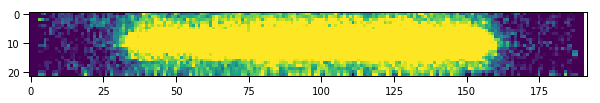

In [54]:
ID = 199
d = fits.open("./DRIZZLE/aXeWFC3_G141_2.STP.fits")["BEAM_%dA" % (ID)].data
im = plt.imshow(d)
im.set_clim(0,0.1)

We plot the extracted 1D spectra of our source and the estimate of the contamination:

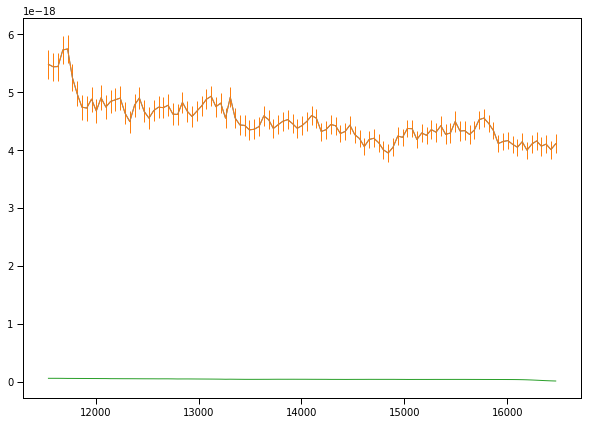

In [55]:
fin = fits.open("./DRIZZLE/aXeWFC3_G141_2.SPC.fits")
tdata = fin["BEAM_%dA" % (ID)].data
x = tdata["LAMBDA"]
f = tdata["FLUX"]
e = tdata["FERROR"]

c = tdata["CONTAM"]
vg = (x>11500) & (x<16500)
plt.plot(x[vg],f[vg])
plt.errorbar(x[vg],f[vg],e[vg])

plt.plot(x[vg],c[vg])

The MEF files in the DRIZZLE directory contain the 2D version of the spectrum of a source as well as estimte of the contamination:

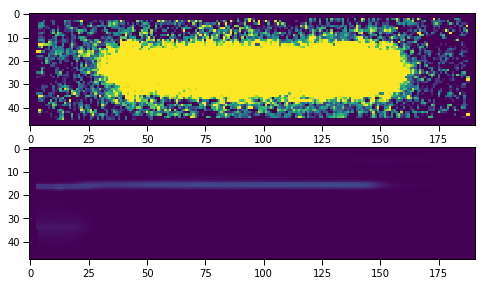

In [56]:
plt.subplot(3,1,1)
d = fits.open("./DRIZZLE/aXeWFC3_G141_mef_ID%d.fits" % (ID))["SCI"].data
im = plt.imshow(d)
im.set_clim(0,0.05)

plt.subplot(3,1,2)
d = fits.open("./DRIZZLE/aXeWFC3_G141_mef_ID%d.fits" % (ID))["CON"].data
im = plt.imshow(d)
im.set_clim(0,0.05)


The individually extracted spectra are in the OUTPUT directory and the combined ones in the DRIZZLE directory. We can plot and compare them:

OUTPUT/ib6o23rsq_flt_2.SPC.fits
OUTPUT/ib6o23ruq_flt_2.SPC.fits
OUTPUT/ib6o23ryq_flt_2.SPC.fits
OUTPUT/ib6o23s0q_flt_2.SPC.fits


<Container object of 3 artists>

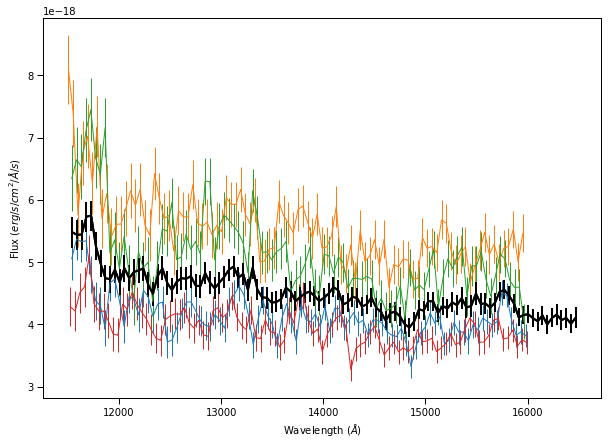

In [57]:
import glob

for s in glob.glob("OUTPUT/ib6o2*2.SPC.fits"):
    print s
    d1 = fits.open(s)["BEAM_%dA" % (ID)].data
    w = d1["LAMBDA"]
    f = d1["FLUX"]
    e = d1["FERROR"]
    vg = (w>11500) & (w<16000)
    plt.errorbar(w[vg],f[vg],e[vg])
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel(r'Flux ($erg/s/cm^2/\AA/s$)');


fin = fits.open("./DRIZZLE/aXeWFC3_G141_2.SPC.fits")
tdata = fin["BEAM_%dA" % (ID)].data
x = tdata["LAMBDA"]
f = tdata["FLUX"]
e = tdata["FERROR"]

c = tdata["CONTAM"]
vg = (x>11500) & (x<16500)
#plt.errorbar(x[vg],y[vg],e[vg])
plt.plot(x[vg],f[vg],color='k',lw=2)
plt.errorbar(x[vg],f[vg],e[vg],color='k',lw=2)
